In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import random 
import copy
from itertools import compress
from itertools import groupby
import scipy.optimize as opt
import time

In [2]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
def bounded_self_assembly_opposite_sep_of_timescales_limit(t,z,params):
    n, m, eta, kdk, kdp, ktot, ptot, ptilde = params

#     z[z <0] =0 #impose non-negativity
    k, p = z
    
    dkdt = -eta * k**(n+1) / kdk + (ktot - k - n * k**n / kdk) * (p**m / kdp + ptilde)
    dpdt = -eta * k**n * p / kdk + (ptot - p - m * p**m / kdp) * (p**m / kdp + ptilde)
        
    dzdt = [dkdt, dpdt]    
    return dzdt

In [4]:
def bounded_self_assembly_opposite_sep_of_timescales_limit_sol(tSpan,params,initialConditions,toPlot,plotLog = False):
    odeSol = scipy.integrate.solve_ivp(lambda tSpan, z: bounded_self_assembly_opposite_sep_of_timescales_limit(tSpan, z, params),
                                        tSpan,initialConditions,method = 'Radau', vectorized=False,
#                                        jac = lambda tSpan,z: lockRatorsInhibitingKinase_DirectFromClosed_Jac(tSpan,z,params)
                                      )
    z = np.transpose(odeSol.y)
    t = odeSol.t
    
    bounded_self_assembly_opposite_sep_of_timescales_limit_plotFxn(z,t,toPlot,plotLog,params)
    return z,t

In [5]:
def bounded_self_assembly_opposite_sep_of_timescales_limit_plotFxn(z,t,toPlot,plotLog,params):
    if toPlot or plotLog:
        k = z[:,0]
        p = z[:,1]
                
        n, m, eta, kdk, kdp, ktot, ptot, ptilde = params
        
        # plot results
        plt.plot(t,k,'b',label='k')
        plt.plot(t,p,'r',label='p')

        plt.ylabel('values')
        plt.xlabel('time')
        if plotLog:
            plt.yscale('log')
 
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0),fontsize = 12)
        #plt.ylim(top=AaTot)
        plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


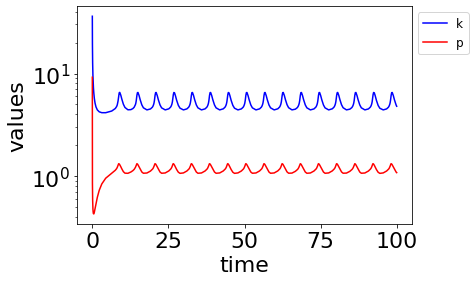

max(abs(dzdt)) = 0.6396811052102951
period = 6.012027812419944


In [6]:
#kbkio > kbkic
#kukic >= kukio
n = 2 
m = 5 
eta = (3.1/14) / (2e3 / 1e4)
kdk = 1 
kdp = 1 
ktot = 10 
ptot = 10 
ptilde = 1e-4

params = [n, m, eta, kdk, kdp, ktot, ptot, ptilde]

# params = [2, 12, 1.11, 60, 0.02, 40, 4.8, 0.03]
params = [2, 14, 1.1, 42, 200, 36, 9.2, 0.059]
n, m, eta, kdk, kdp, ktot, ptot, ptilde = params


initialConditions = [ktot, ptot]
tmax = 100 #maximum time we'll integrate to
tSpan = [0,tmax] #np.linspace(0,tmax,numTimePoints)

toPlot = True

z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(tSpan,params,initialConditions,toPlot,True)
k = z[:,0]
p = z[:,1]

dzdt = bounded_self_assembly_opposite_sep_of_timescales_limit(t[-1],z[-1,:],params)
print('max(abs(dzdt)) = ' + str(max(np.abs(dzdt))))

dpdt = (p[1:] - p[0:-1])/(t[1:]-t[0:-1])

groups = []
uniquekeys = []
counter = 0
prevCounter = 0
prevPrevCounter = 0
prevCounterArray = []
xChange = [] #how much does the value of Ao change in between each inflection point?
for k, g in groupby(np.sign(dpdt)):
    groups.append(list(g))
    c = len(uniquekeys) #counter that just increases by one in each for loop
    xChange.append(np.sum(dpdt[counter:counter+len(groups[c])]*
                          (t[counter+1:counter+len(groups[c])+1]-t[counter:counter+len(groups[c])])))
    prevPrevPrevCounter = prevPrevCounter
    prevPrevCounter = prevCounter
    prevCounter = counter
    counter += len(groups[c])
    uniquekeys.append(k)
    
    prevCounterArray += [t[counter]]
nIP = len(uniquekeys)

period = prevCounterArray[-4] - prevCounterArray[-6]
print('period = ' + str(period))
# print('kMKo = ' + str((kuko + kcko)/kbko) + '; kMKc = ' + str((kukc + kckc)/kbkc))
# print('kMPo = ' + str((kupo + kcpo)/kbpo) + '; kMPc = ' + str((kupc + kcpc)/kbpc))
# print('kcK = ' + str(kcko) + '; kcP = ' + str(kcpo))
# print('kDKo = ' + str(kukio/kbkio) + '; kDKc = ' + str(kukic/kbkic))

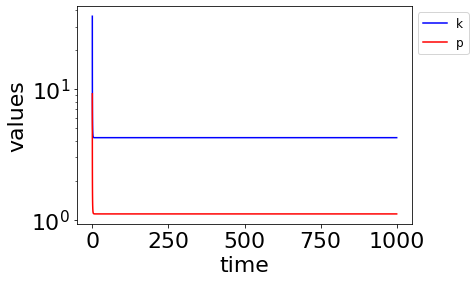

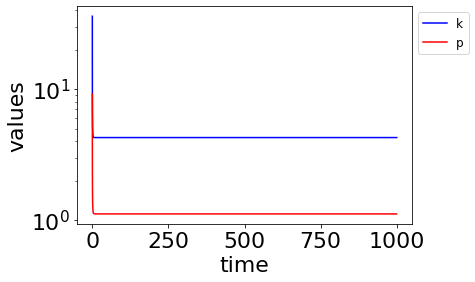

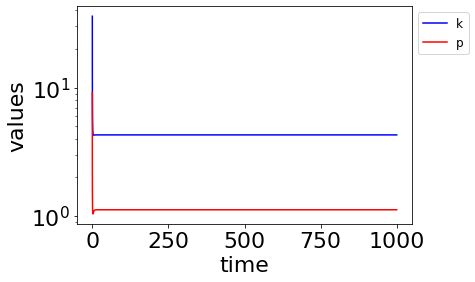

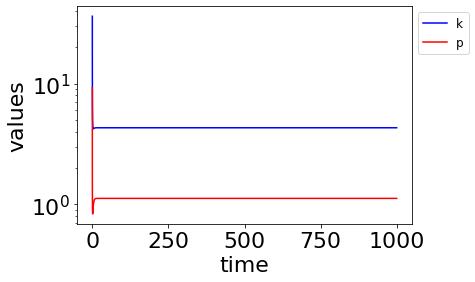

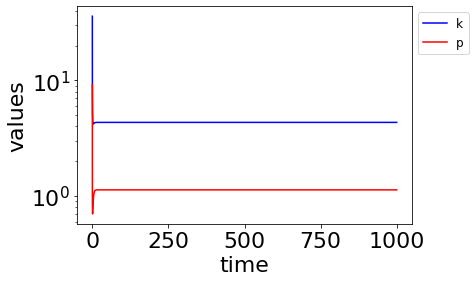

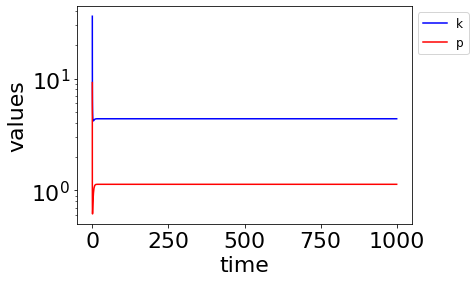

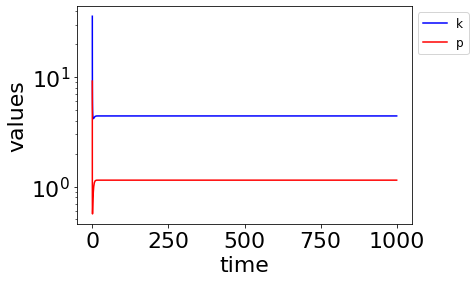

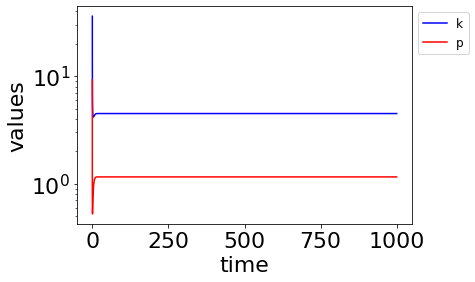

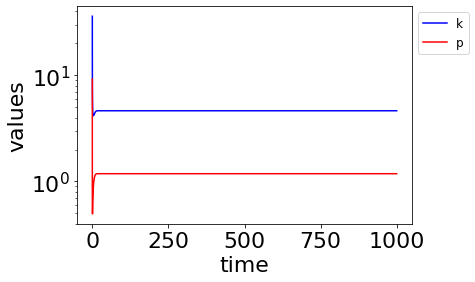

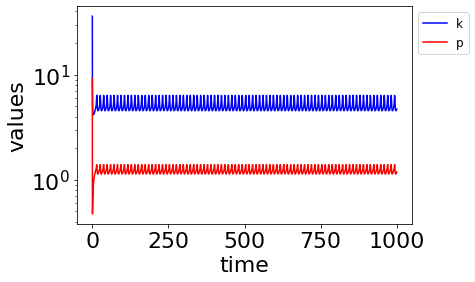

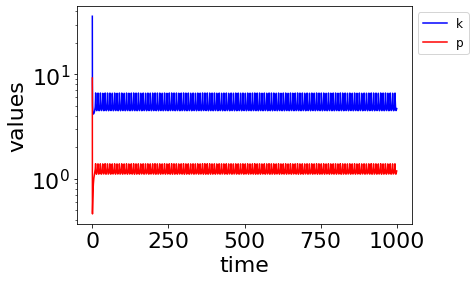

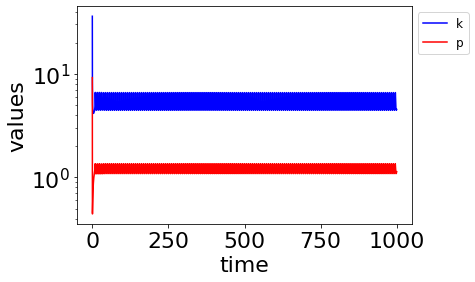

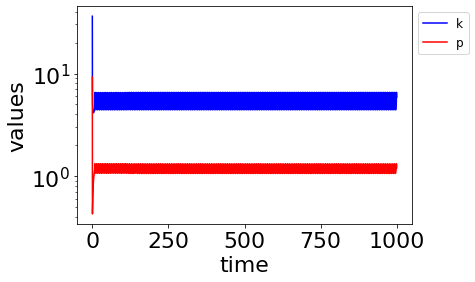

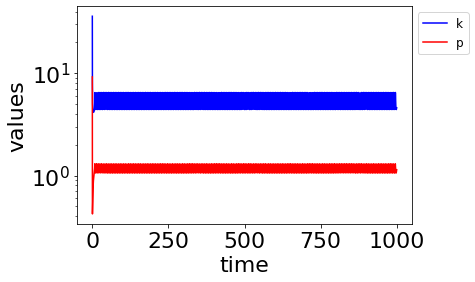

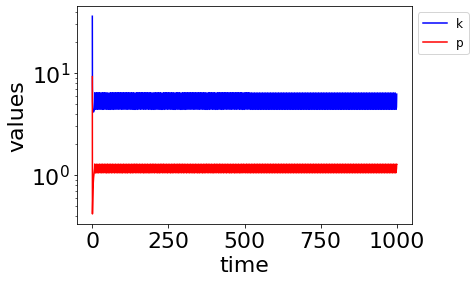

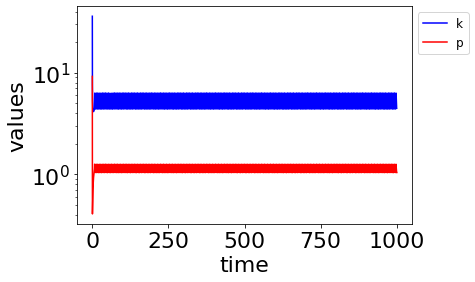

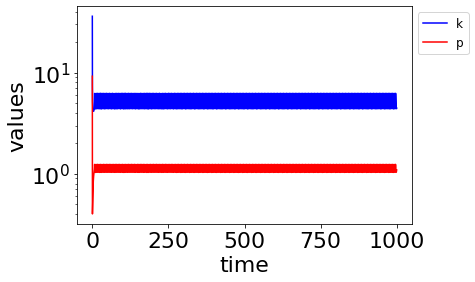

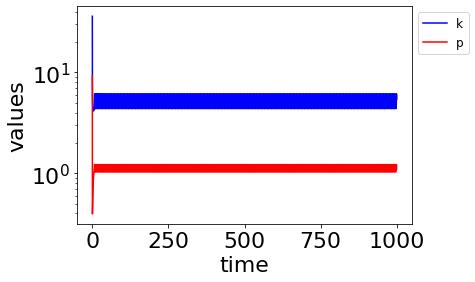

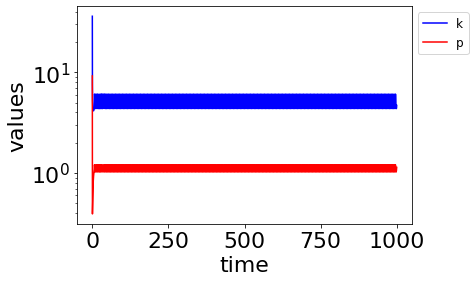

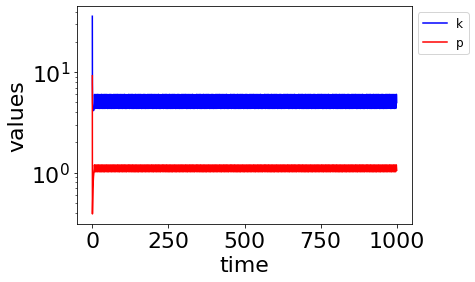

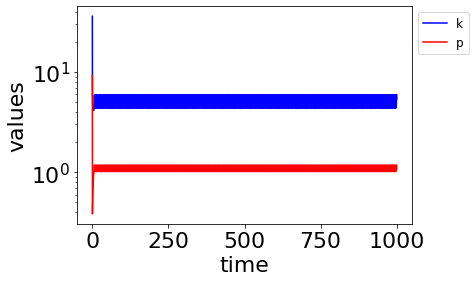

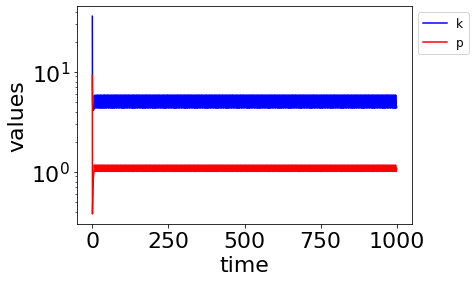

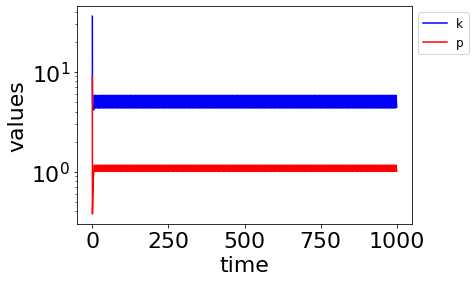

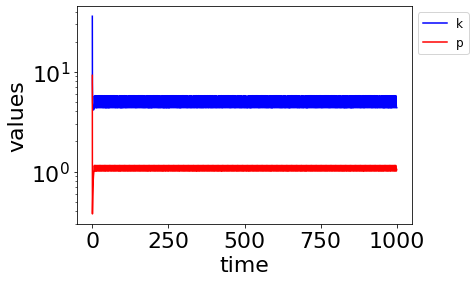

KeyboardInterrupt: 

In [7]:
ms = range(2, 50)
period_fxn_m = np.zeros(len(ms))

for e, m in enumerate(ms):
    params = [2, m, 1.1, 42, 200, 36, 9.2, 0.059]
    n, m, eta, kdk, kdp, ktot, ptot, ptilde = params

    initialConditions = [ktot, ptot]
    tmax = 1000 #maximum time we'll integrate to
    tSpan = [0,tmax] #np.linspace(0,tmax,numTimePoints)

    toPlot = True

    z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(tSpan,params,initialConditions,toPlot,True)
    k = z[:,0]
    p = z[:,1]

    dpdt = (p[1:] - p[0:-1])/(t[1:]-t[0:-1])

    groups = []
    uniquekeys = []
    counter = 0
    prevCounter = 0
    prevPrevCounter = 0
    prevCounterArray = []
    xChange = [] #how much does the value of Ao change in between each inflection point?
    for k, g in groupby(np.sign(dpdt)):
        groups.append(list(g))
        c = len(uniquekeys) #counter that just increases by one in each for loop
        xChange.append(np.sum(dpdt[counter:counter+len(groups[c])]*
                              (t[counter+1:counter+len(groups[c])+1]-t[counter:counter+len(groups[c])])))
        prevPrevPrevCounter = prevPrevCounter
        prevPrevCounter = prevCounter
        prevCounter = counter
        counter += len(groups[c])
        uniquekeys.append(k)

        prevCounterArray += [t[counter]]
    nIP = len(uniquekeys)
    
    if (nIP > 10 and min(np.abs(xChange[:-1] / xChange[5])) > 0.5 and 
        t[-3]/t[-2] > 0.95 and abs((abs(xChange[3*len(xChange)//4]) - abs(xChange[-2]))/xChange[-2]) < 1 and 
        not (z<-10000).any()):
        period = prevCounterArray[-4] - prevCounterArray[-6]
    else:
        period = 0
#     print('period = ' + str(period))
    period_fxn_m[e] = period

In [ ]:
plt.figure()
plt.plot(ms, period_fxn_m, '.')
plt.xlabel('m')
plt.ylabel(r'Period $($s / $\eta_{K\rho}$ $\mu$M$)$')
plt.show()

In [ ]:
kdks = np.linspace(30, 50, 50)
period_fxn_kdks = np.zeros(len(kdks))

period = 0
for e, kdk in enumerate(kdks):
    params = [2, 14, 1.1, kdk, 200, 36, 9.2, 0.059]
    n, m, eta, kdk, kdp, ktot, ptot, ptilde = params

    initialConditions = [ktot, ptot]
    if period == 0:
        tmax = 1000 #maximum time we'll integrate to
    else:
        tmax = period * 50
    tSpan = [0,tmax] #np.linspace(0,tmax,numTimePoints)

    toPlot = True

    z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(tSpan,params,initialConditions,toPlot,True)
    k = z[:,0]
    p = z[:,1]

    dpdt = (p[1:] - p[0:-1])/(t[1:]-t[0:-1])

    groups = []
    uniquekeys = []
    counter = 0
    prevCounter = 0
    prevPrevCounter = 0
    prevCounterArray = []
    xChange = [] #how much does the value of Ao change in between each inflection point?
    for k, g in groupby(np.sign(dpdt)):
        groups.append(list(g))
        c = len(uniquekeys) #counter that just increases by one in each for loop
        xChange.append(np.sum(dpdt[counter:counter+len(groups[c])]*
                              (t[counter+1:counter+len(groups[c])+1]-t[counter:counter+len(groups[c])])))
        prevPrevPrevCounter = prevPrevCounter
        prevPrevCounter = prevCounter
        prevCounter = counter
        counter += len(groups[c])
        uniquekeys.append(k)

        prevCounterArray += [t[counter]]
    nIP = len(uniquekeys)
    
    if (nIP > 10 and min(np.abs(xChange[:-1] / xChange[5])) > 0.5 and 
        t[-3]/t[-2] > 0.95 and abs((abs(xChange[3*len(xChange)//4]) - abs(xChange[-2]))/xChange[-2]) < 1 and 
        not (z<-10000).any()):
        period = prevCounterArray[-4] - prevCounterArray[-6]
    else:
        period = 0
#     print('period = ' + str(period))
    period_fxn_kdks[e] = period

In [ ]:
plt.figure()
plt.plot(kdks, period_fxn_kdks, '.')
plt.xlabel(r'$k_{d\kappa}$')
plt.ylabel(r'Period $($s / $\eta_{K\rho}$ $\mu$M$)$')
plt.show()

In [ ]:
kdps = np.linspace(100, 350, 50)
period_fxn_kdps = np.zeros(len(kdps))

period = 0
for e, kdp in enumerate(kdps):
    params = [2, 14, 1.1, 42, kdp, 36, 9.2, 0.059]
    n, m, eta, kdk, kdp, ktot, ptot, ptilde = params

    initialConditions = [ktot, ptot]
    if period == 0:
        tmax = 1000 #maximum time we'll integrate to
    else:
        tmax = period * 50
    tSpan = [0,tmax] #np.linspace(0,tmax,numTimePoints)

    toPlot = True

    z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(tSpan,params,initialConditions,toPlot,True)
    k = z[:,0]
    p = z[:,1]

    dpdt = (p[1:] - p[0:-1])/(t[1:]-t[0:-1])

    groups = []
    uniquekeys = []
    counter = 0
    prevCounter = 0
    prevPrevCounter = 0
    prevCounterArray = []
    xChange = [] #how much does the value of Ao change in between each inflection point?
    for k, g in groupby(np.sign(dpdt)):
        groups.append(list(g))
        c = len(uniquekeys) #counter that just increases by one in each for loop
        xChange.append(np.sum(dpdt[counter:counter+len(groups[c])]*
                              (t[counter+1:counter+len(groups[c])+1]-t[counter:counter+len(groups[c])])))
        prevPrevPrevCounter = prevPrevCounter
        prevPrevCounter = prevCounter
        prevCounter = counter
        counter += len(groups[c])
        uniquekeys.append(k)

        prevCounterArray += [t[counter]]
    nIP = len(uniquekeys)
    
    if (nIP > 10 and min(np.abs(xChange[:-1] / xChange[5])) > 0.5 and 
        t[-3]/t[-2] > 0.95 and abs((abs(xChange[3*len(xChange)//4]) - abs(xChange[-2]))/xChange[-2]) < 1 and 
        not (z<-10000).any()):
        period = prevCounterArray[-4] - prevCounterArray[-6]
    else:
        period = 0
#     print('period = ' + str(period))
    period_fxn_kdps[e] = period

In [ ]:
plt.figure()
plt.plot(kdps, period_fxn_kdps, '.')
plt.xlabel(r'$k_{d\rho}$')
plt.ylabel(r'Period $($s / $\eta_{K\rho}$ $\mu$M$)$')
plt.show()

In [ ]:
ktots = np.linspace(30, 40, 50)
period_fxn_ktots = np.zeros(len(ktots))

period = 0
for e, ktot in enumerate(ktots):
    params = [2, 14, 1.1, 42, 200, ktot, 9.2, 0.059]
    n, m, eta, kdk, kdp, ktot, ptot, ptilde = params

    initialConditions = [ktot, ptot]
    if period == 0:
        tmax = 1000 #maximum time we'll integrate to
    else:
        tmax = period * 50
    tSpan = [0,tmax] #np.linspace(0,tmax,numTimePoints)

    toPlot = True

    z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(tSpan,params,initialConditions,toPlot,True)
    k = z[:,0]
    p = z[:,1]

    dpdt = (p[1:] - p[0:-1])/(t[1:]-t[0:-1])

    groups = []
    uniquekeys = []
    counter = 0
    prevCounter = 0
    prevPrevCounter = 0
    prevCounterArray = []
    xChange = [] #how much does the value of Ao change in between each inflection point?
    for k, g in groupby(np.sign(dpdt)):
        groups.append(list(g))
        c = len(uniquekeys) #counter that just increases by one in each for loop
        xChange.append(np.sum(dpdt[counter:counter+len(groups[c])]*
                              (t[counter+1:counter+len(groups[c])+1]-t[counter:counter+len(groups[c])])))
        prevPrevPrevCounter = prevPrevCounter
        prevPrevCounter = prevCounter
        prevCounter = counter
        counter += len(groups[c])
        uniquekeys.append(k)

        prevCounterArray += [t[counter]]
    nIP = len(uniquekeys)
    
    if (nIP > 10 and min(np.abs(xChange[:-1] / xChange[5])) > 0.5 and 
        t[-3]/t[-2] > 0.95 and abs((abs(xChange[3*len(xChange)//4]) - abs(xChange[-2]))/xChange[-2]) < 1 and 
        not (z<-10000).any()):
        period = prevCounterArray[-4] - prevCounterArray[-6]
    else:
        period = 0
#     print('period = ' + str(period))
    period_fxn_ktots[e] = period

In [ ]:
plt.figure()
plt.plot(ktots, period_fxn_ktots, '.')
plt.xlabel(r'$\kappa_{tot}$')
plt.ylabel(r'Period $($s / $\eta_{K\rho}$ $\mu$M$)$')
plt.show()

In [ ]:
ptots = np.linspace(8.5, 9.5, 50)
period_fxn_ptots = np.zeros(len(ptots))

period = 0
for e, ptot in enumerate(ptots):
    params = [2, 14, 1.1, 42, 200, 36, ptot, 0.059]
    n, m, eta, kdk, kdp, ktot, ptot, ptilde = params

    initialConditions = [ktot, ptot]
    if period == 0:
        tmax = 1000 #maximum time we'll integrate to
    else:
        tmax = period * 50
    tSpan = [0,tmax] #np.linspace(0,tmax,numTimePoints)

    toPlot = True

    z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(tSpan,params,initialConditions,toPlot,True)
    k = z[:,0]
    p = z[:,1]

    dpdt = (p[1:] - p[0:-1])/(t[1:]-t[0:-1])

    groups = []
    uniquekeys = []
    counter = 0
    prevCounter = 0
    prevPrevCounter = 0
    prevCounterArray = []
    xChange = [] #how much does the value of Ao change in between each inflection point?
    for k, g in groupby(np.sign(dpdt)):
        groups.append(list(g))
        c = len(uniquekeys) #counter that just increases by one in each for loop
        xChange.append(np.sum(dpdt[counter:counter+len(groups[c])]*
                              (t[counter+1:counter+len(groups[c])+1]-t[counter:counter+len(groups[c])])))
        prevPrevPrevCounter = prevPrevCounter
        prevPrevCounter = prevCounter
        prevCounter = counter
        counter += len(groups[c])
        uniquekeys.append(k)

        prevCounterArray += [t[counter]]
    nIP = len(uniquekeys)
    
    if (nIP > 10 and min(np.abs(xChange[:-1] / xChange[5])) > 0.5 and 
        t[-3]/t[-2] > 0.95 and abs((abs(xChange[3*len(xChange)//4]) - abs(xChange[-2]))/xChange[-2]) < 1 and 
        not (z<-10000).any()):
        period = prevCounterArray[-4] - prevCounterArray[-6]
    else:
        period = 0
#     print('period = ' + str(period))
    period_fxn_ptots[e] = period

In [ ]:
plt.figure()
plt.plot(ptots, period_fxn_ptots, '.')
plt.xlabel(r'$\rho{tot}$')
plt.ylabel(r'Period $($s / $\eta_{K\rho}$ $\mu$M$)$')
plt.show()

In [ ]:
ptildes = np.linspace(0.04, 0.08, 50)
period_fxn_ptildes = np.zeros(len(ptildes))

period = 0
for e, ptilde in enumerate(ptildes):
    params = [2, 14, 1.1, 42, 200, 36, 9.2, ptilde]
    n, m, eta, kdk, kdp, ktot, ptot, ptilde = params

    initialConditions = [ktot, ptot]
    if period == 0:
        tmax = 1000 #maximum time we'll integrate to
    else:
        tmax = period * 50
    tSpan = [0,tmax] #np.linspace(0,tmax,numTimePoints)

    toPlot = True

    z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(tSpan,params,initialConditions,toPlot,True)
    k = z[:,0]
    p = z[:,1]

    dpdt = (p[1:] - p[0:-1])/(t[1:]-t[0:-1])

    groups = []
    uniquekeys = []
    counter = 0
    prevCounter = 0
    prevPrevCounter = 0
    prevCounterArray = []
    xChange = [] #how much does the value of Ao change in between each inflection point?
    for k, g in groupby(np.sign(dpdt)):
        groups.append(list(g))
        c = len(uniquekeys) #counter that just increases by one in each for loop
        xChange.append(np.sum(dpdt[counter:counter+len(groups[c])]*
                              (t[counter+1:counter+len(groups[c])+1]-t[counter:counter+len(groups[c])])))
        prevPrevPrevCounter = prevPrevCounter
        prevPrevCounter = prevCounter
        prevCounter = counter
        counter += len(groups[c])
        uniquekeys.append(k)

        prevCounterArray += [t[counter]]
    nIP = len(uniquekeys)
    
    if (nIP > 10 and min(np.abs(xChange[:-1] / xChange[5])) > 0.5 and 
        t[-3]/t[-2] > 0.95 and abs((abs(xChange[3*len(xChange)//4]) - abs(xChange[-2]))/xChange[-2]) < 1 and 
        not (z<-10000).any()):
        period = prevCounterArray[-4] - prevCounterArray[-6]
    else:
        period = 0
#     print('period = ' + str(period))
    period_fxn_ptildes[e] = period

In [ ]:
plt.figure()
plt.plot(ptildes, period_fxn_ptildes, '.')
plt.xlabel(r'$\tilde{P}$')
plt.ylabel(r'Period $($s / $\eta_{K\rho}$ $\mu$M$)$')
plt.show()

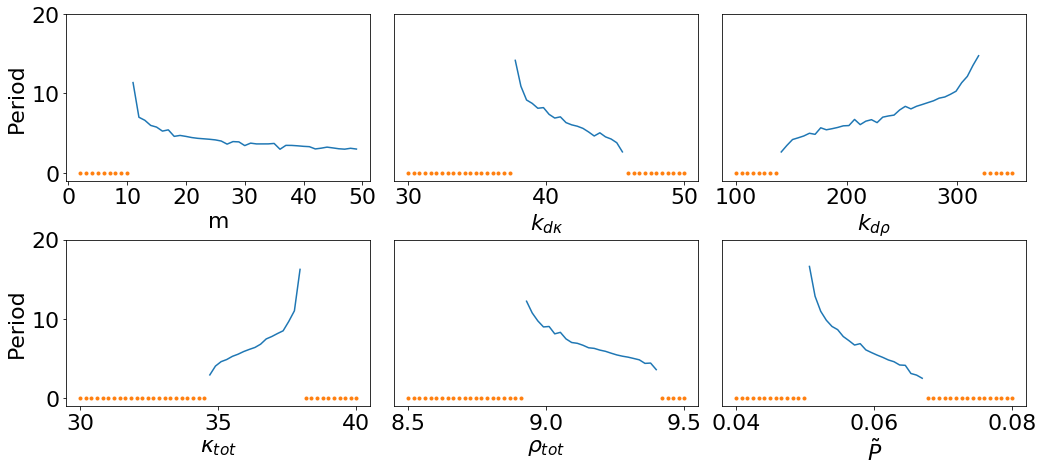

In [124]:
fig, axs = plt.subplots(2,3, figsize=(15,7))

ms = np.array(ms)
axs[0, 0].plot(ms[period_fxn_m > 0], period_fxn_m[period_fxn_m>0])
axs[0, 0].plot(ms[period_fxn_m == 0], period_fxn_m[period_fxn_m == 0], '.')
axs[0, 0].set_xlabel('m')
axs[0, 0].set_ylabel(r'Period')
axs[0, 0].set_xticks([0, 10, 20, 30, 40, 50])
axs[0, 0].set_ylim([-1,20])

axs[0, 1].plot(kdks[period_fxn_kdks>0], period_fxn_kdks[period_fxn_kdks>0])
axs[0, 1].plot(kdks[period_fxn_kdks ==0], period_fxn_kdks[period_fxn_kdks==0], '.')
axs[0, 1].set_xlabel(r'$k_{d\kappa}$')
# axs[0, 2].set_xticks([1e-4, 1e-3, 1e-2])
axs[0, 1].set_ylim([-1,20])
axs[0, 1].set_yticks([])

axs[0, 2].plot(kdps[period_fxn_kdps > 0], period_fxn_kdps[period_fxn_kdps > 0])
axs[0, 2].plot(kdps[period_fxn_kdps == 0], period_fxn_kdps[period_fxn_kdps == 0], '.')
axs[0, 2].set_xlabel(r'$k_{d\rho}$')
axs[0, 2].set_ylim([-1,20])
axs[0, 2].set_yticks([])

axs[1, 0].plot(ktots[period_fxn_ktots>0], period_fxn_ktots[period_fxn_ktots>0])
axs[1, 0].plot(ktots[period_fxn_ktots==0], period_fxn_ktots[period_fxn_ktots==0], '.')
axs[1, 0].set_xlabel(r'$\kappa_{tot}$')
axs[1, 0].set_ylabel('Period')
# axs[1, 0].set_xticks([0, 0.001, 0.002])
# axs[1, 0].set_xticklabels(['0', r'$10^{-3}$', '2e-3'])
# plt.ticklabel_format(style='sci', axis='x', scilimits=(-5,-5))
axs[1, 0].set_ylim([-1,20])

axs[1, 1].plot(ptots[period_fxn_ptots>0], period_fxn_ptots[period_fxn_ptots>0])
axs[1, 1].plot(ptots[period_fxn_ptots==0], period_fxn_ptots[period_fxn_ptots==0], '.')
axs[1, 1].set_xlabel(r'$\rho_{tot}$')
# axs[1, 1].set_xticks([0, 0.005, 0.01, 0.015])
# axs[1, 1].set_xticklabels(['0', '5e-3', '1e-2', '1.5e-2'])
axs[1, 1].set_ylim([-1,20])
axs[1, 1].set_yticks([])

axs[1, 2].plot(ptildes[period_fxn_ptildes>0], period_fxn_ptildes[period_fxn_ptildes>0])
axs[1, 2].plot(ptildes[period_fxn_ptildes==0], period_fxn_ptildes[period_fxn_ptildes==0], '.')
axs[1, 2].set_xlabel(r'$\tilde{P}$')
# axs[1, 2].set_xticks([1e-12, 1e-9, 1e-6])
axs[1, 2].set_ylim([-1,20])
axs[1, 2].set_yticks([])

# axs[1, 3].plot(etas[period_fxn_eta>0], period_fxn_eta[period_fxn_eta>0])
# axs[1, 3].plot(etas[period_fxn_eta==0], period_fxn_eta[period_fxn_eta==0],'.')
# axs[1, 3].set_xlabel(var_list[6])
# axs[1, 3].set_xscale('log')
# axs[1, 3].set_xticks([1e-1, 1e0, 1e1])
# axs[1, 3].set_ylim([-100, 5000])
# axs[1, 3].set_yticks([])

plt.tight_layout(h_pad=0, w_pad=0.2)

plt.show()

In [8]:
var_list = [r'$n$', r'$m$', r'$\eta_\kappa = \eta_\rho$', 
            r'$k_{d\kappa}$ $(\mu$M$)$', r'$k_{d\rho}$ $(\mu$M$^{13})$', 
            r'$\kappa_{tot}$ $(\mu$M$)$', r'$\rho_{tot}$ $(\mu$M$)$', r'$\tilde{P}$ $(\mu$M$)$']

def robustness(var_index, var_arr, logscale=False):    
    period_arr = np.zeros(len(var_arr))
    period = 0  # to initialize
    
    for e, var in enumerate(var_arr):
        params = [2, 14, 1.1, 42, 200, 36, 9.2, 0.059]
#         params = [2, 10, 1.11, 21.6, 3.89e-5, 50.5, 3.75, 0.0292]
        params[var_index] = var            
        n, m, eta, kdk, kdp, ktot, ptot, ptilde = params
        
        print(var_list[var_index] + ' = ' + str(var))
        
        initialConditions = [ktot, ptot]        
        if period == 0:
            tmax = 1000 #maximum time we'll integrate to
        else:
            tmax = period * 50
        tSpan = [0,tmax] #np.linspace(0,tmax,numTimePoints)

        toPlot = True

        z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(
            tSpan, params, initialConditions, toPlot, True)
        k = z[:,0]
        p = z[:,1]

        dpdt = (p[1:] - p[0:-1])/(t[1:]-t[0:-1])

        groups = []
        uniquekeys = []
        counter = 0
        prevCounter = 0
        prevPrevCounter = 0
        prevCounterArray = []
        xChange = [] #how much does the value of Ao change in between each inflection point?
        for k, g in groupby(np.sign(dpdt)):
            groups.append(list(g))
            c = len(uniquekeys) #counter that just increases by one in each for loop
            xChange.append(np.sum(dpdt[counter:counter+len(groups[c])]*
                                  (t[counter+1:counter+len(groups[c])+1]-t[counter:counter+len(groups[c])])))
            prevPrevPrevCounter = prevPrevCounter
            prevPrevCounter = prevCounter
            prevCounter = counter
            counter += len(groups[c])
            uniquekeys.append(k)

            prevCounterArray += [t[counter]]
        nIP = len(uniquekeys)

        if (nIP > 10 and min(np.abs(xChange[:-1] / xChange[5])) > 0.5 and 
            t[-3]/t[-2] > 0.95 and abs((abs(xChange[3*len(xChange)//4]) - abs(xChange[-2]))/xChange[-2]) < 1 and 
            not (z<-10000).any()):
            period = prevCounterArray[-4] - prevCounterArray[-6]
        else:
            period = 0
    #     print('period = ' + str(period))
        period_arr[e] = period
        
    plt.figure()
    plt.plot(var_arr, period_arr, '.')
    plt.xlabel(var_list[var_index])
    plt.ylabel(r'Period $(s)$')
    if logscale:
        plt.xscale('log')
    plt.show()
    
    return(period_arr)

$m$ = 2


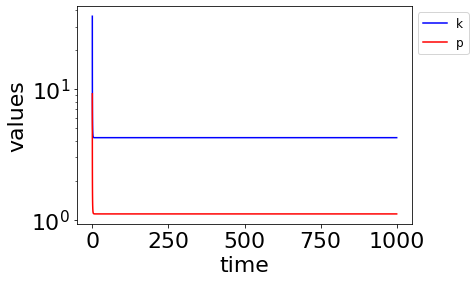

$m$ = 3


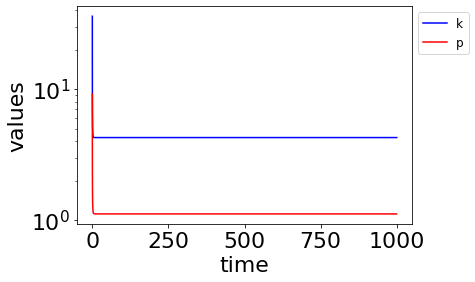

$m$ = 4


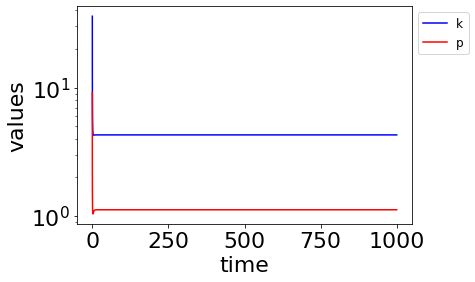

$m$ = 5


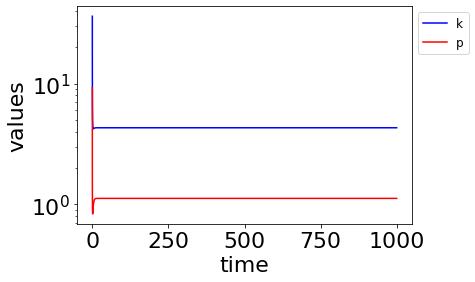

$m$ = 6


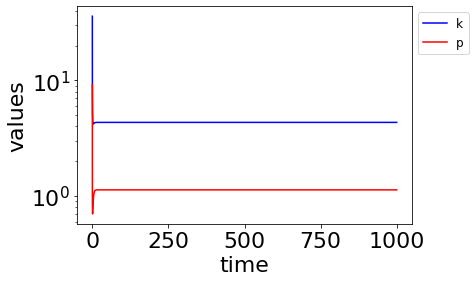

$m$ = 7


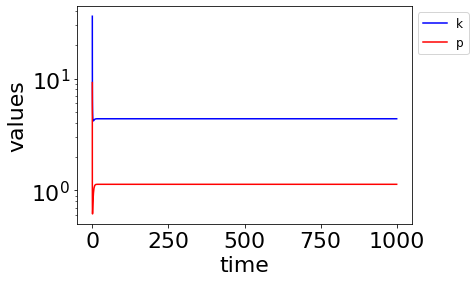

$m$ = 8


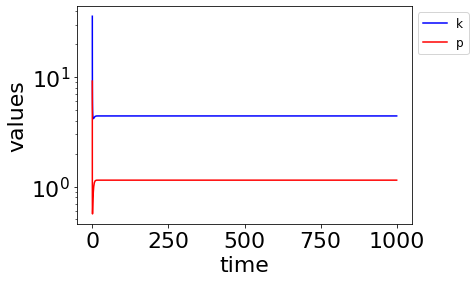

$m$ = 9


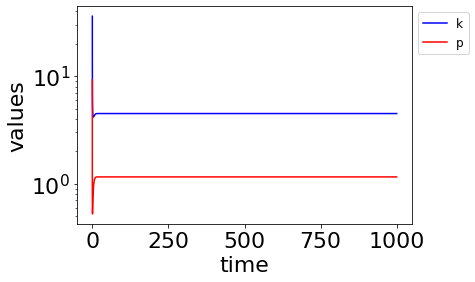

$m$ = 10


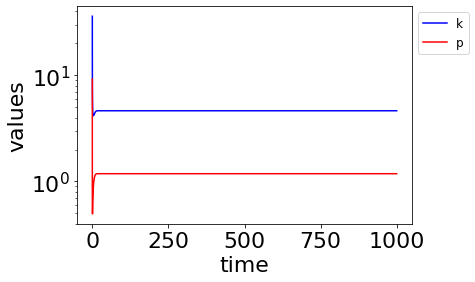

$m$ = 11


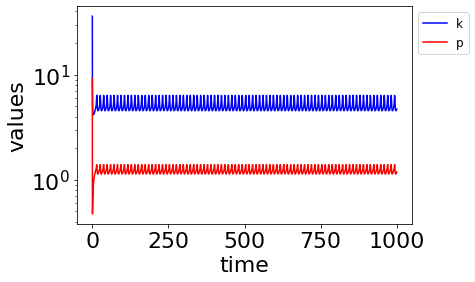

$m$ = 12


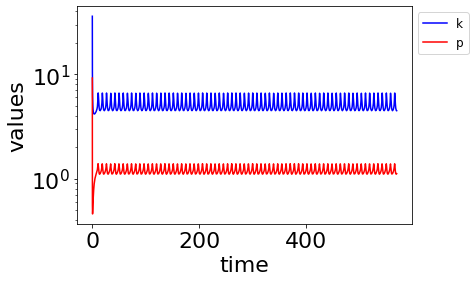

$m$ = 13


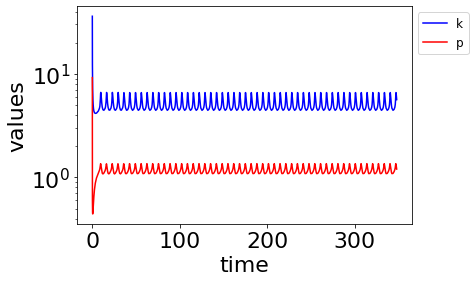

$m$ = 14


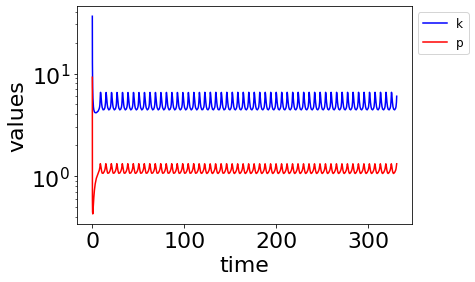

$m$ = 15


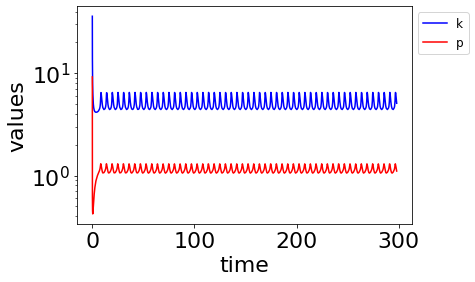

$m$ = 16


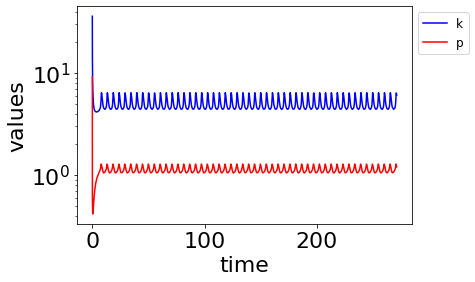

$m$ = 17


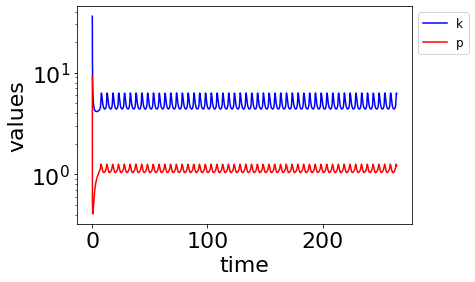

$m$ = 18


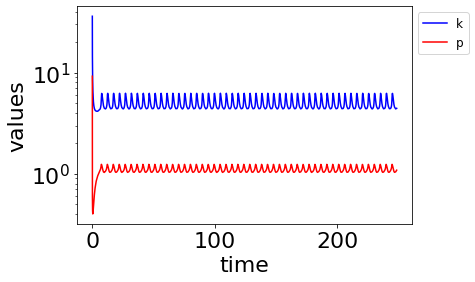

$m$ = 19


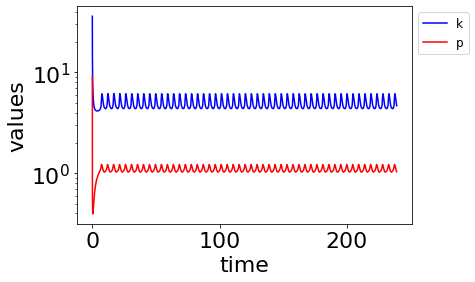

$m$ = 20


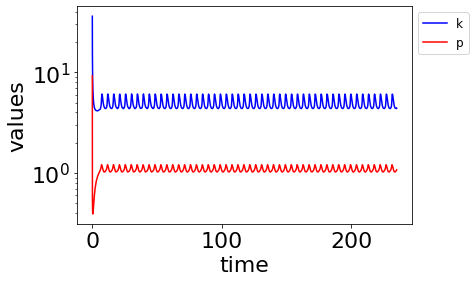

$m$ = 21


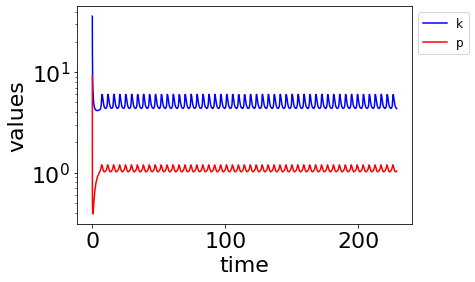

$m$ = 22


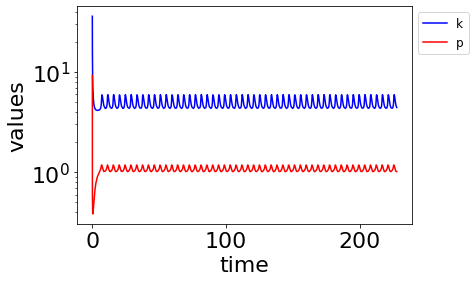

$m$ = 23


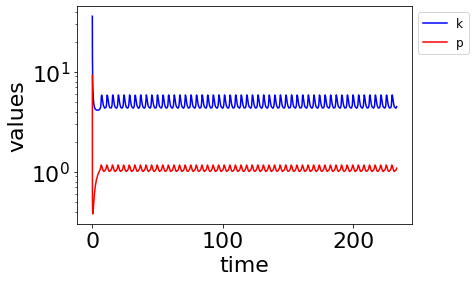

$m$ = 24


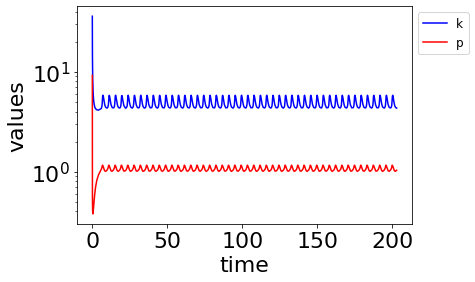

$m$ = 25


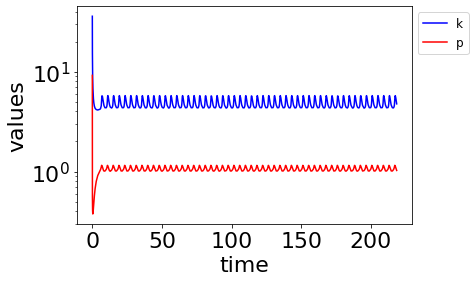

$m$ = 26


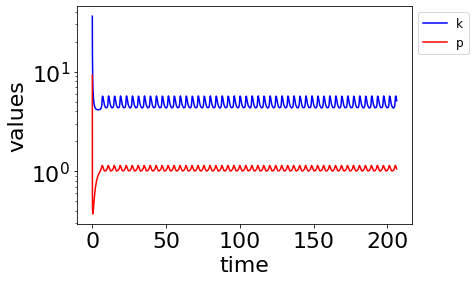

$m$ = 27


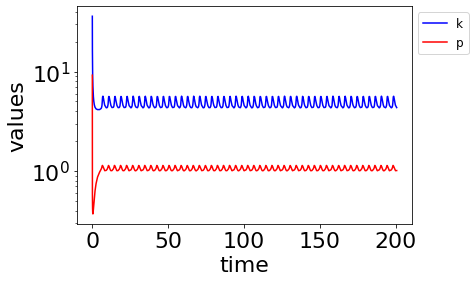

$m$ = 28


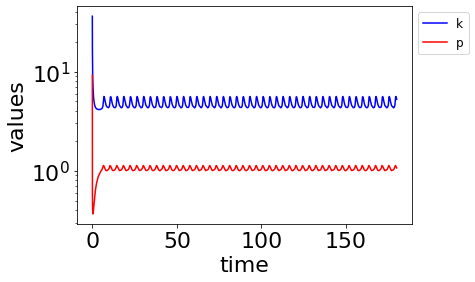

$m$ = 29


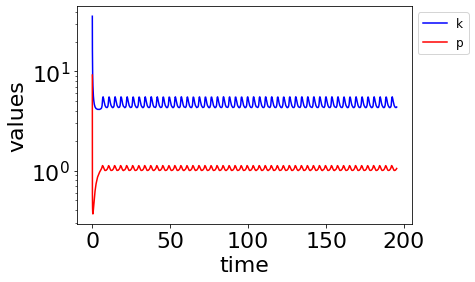

$m$ = 30


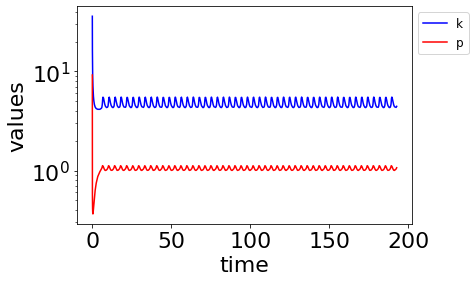

$m$ = 31


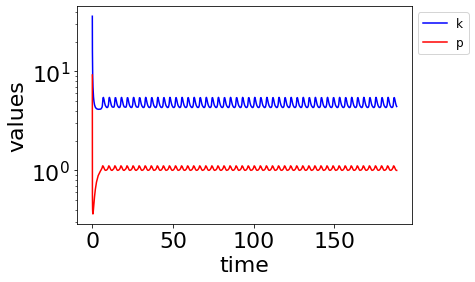

$m$ = 32


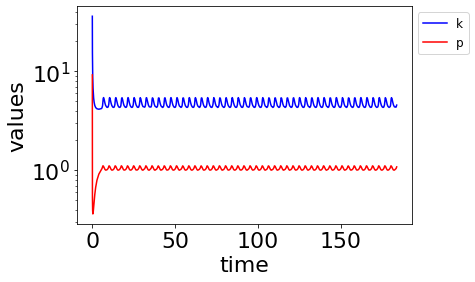

$m$ = 33


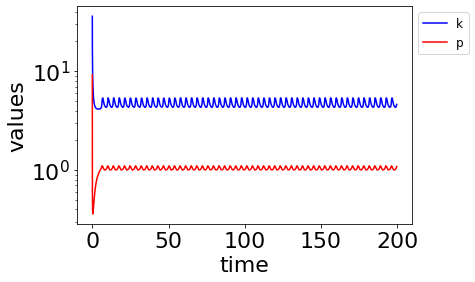

$m$ = 34


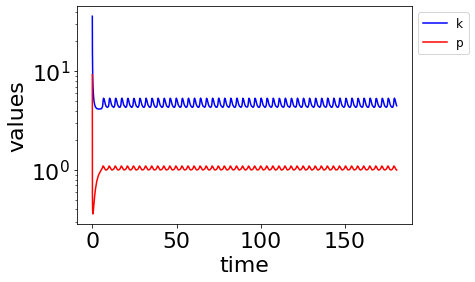

$m$ = 35


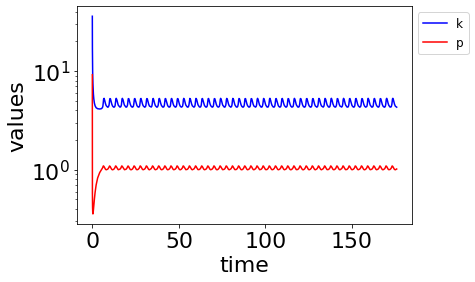

$m$ = 36


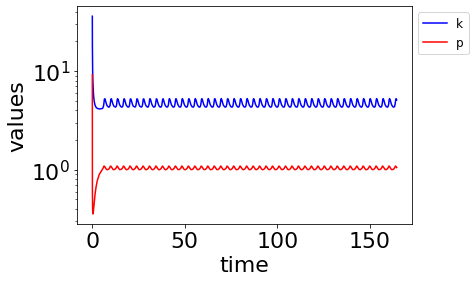

$m$ = 37


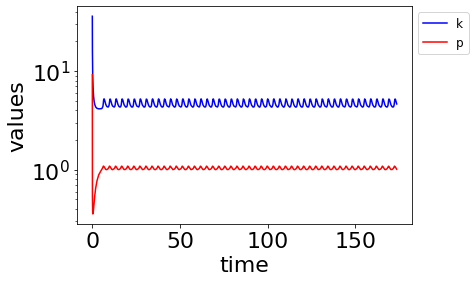

$m$ = 38


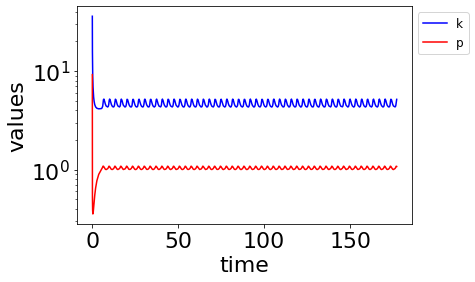

$m$ = 39


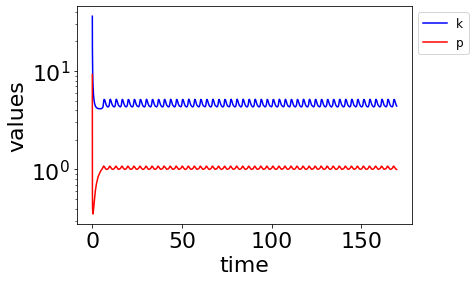

$m$ = 40


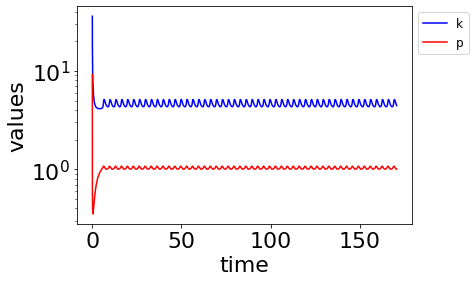

$m$ = 41


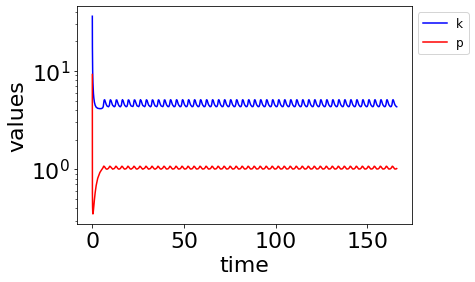

$m$ = 42


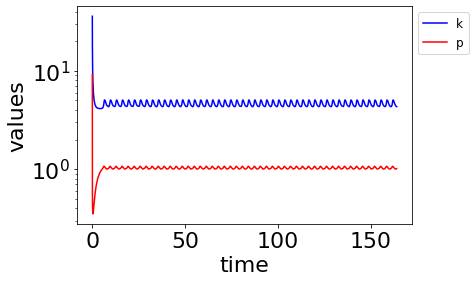

$m$ = 43


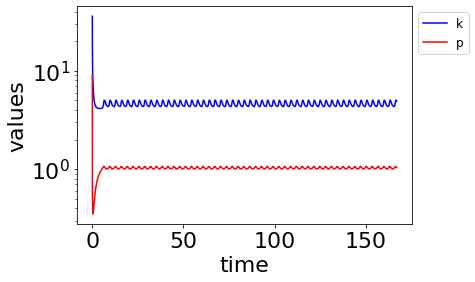

$m$ = 44


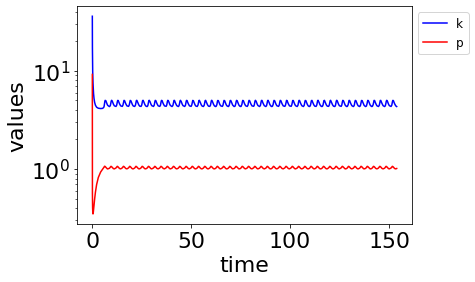

$m$ = 45


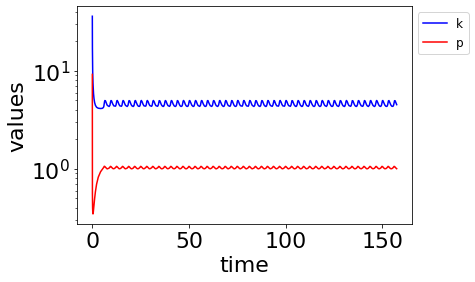

$m$ = 46


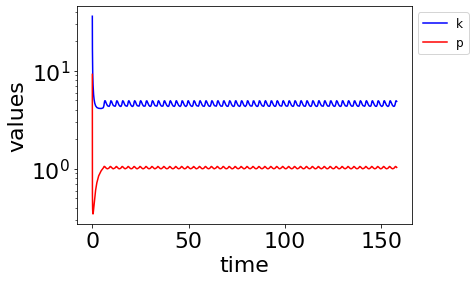

$m$ = 47


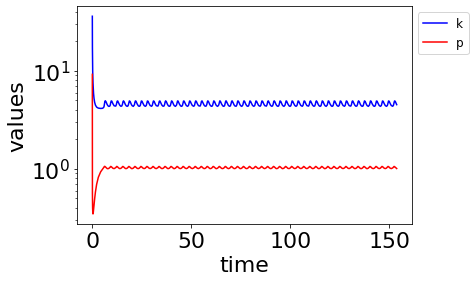

$m$ = 48


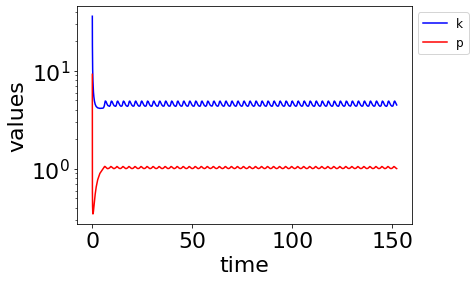

$m$ = 49


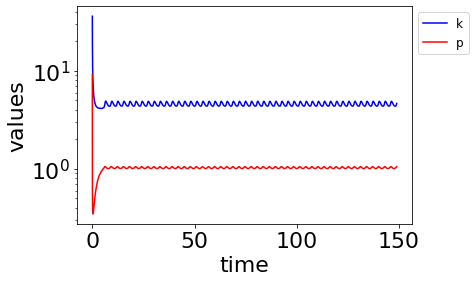

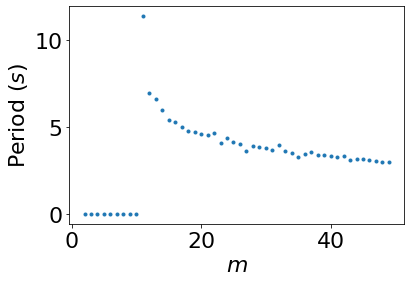

In [9]:
ms = range(2, 50)
period_fxn_m = robustness(1, ms, False)

$k_{d\kappa}$ $(\mu$M$)$ = 30.0


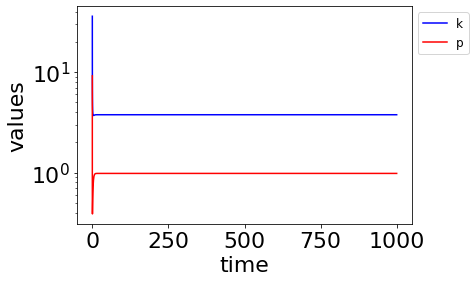

$k_{d\kappa}$ $(\mu$M$)$ = 30.408163265306122


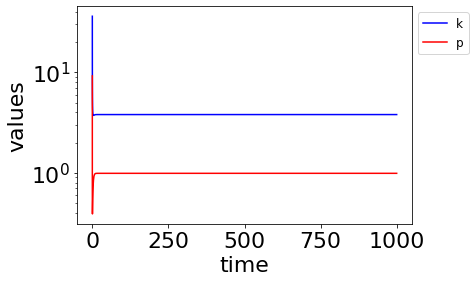

$k_{d\kappa}$ $(\mu$M$)$ = 30.816326530612244


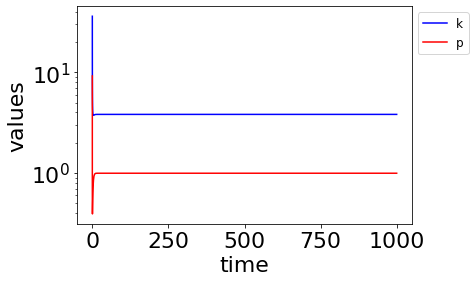

$k_{d\kappa}$ $(\mu$M$)$ = 31.224489795918366


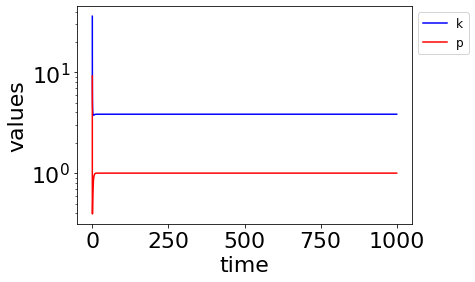

$k_{d\kappa}$ $(\mu$M$)$ = 31.632653061224488


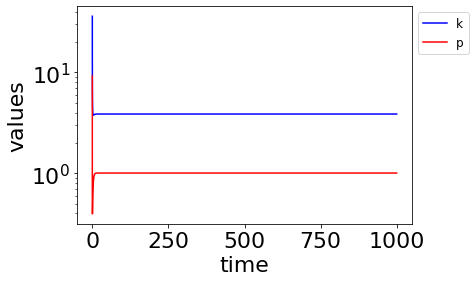

$k_{d\kappa}$ $(\mu$M$)$ = 32.04081632653061


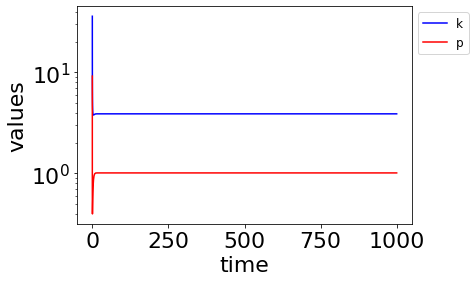

$k_{d\kappa}$ $(\mu$M$)$ = 32.44897959183673


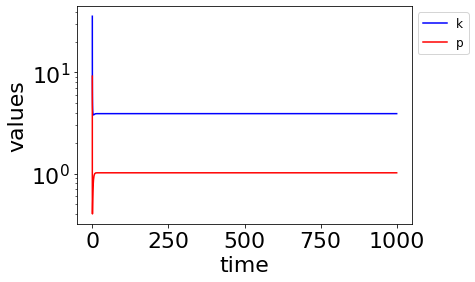

$k_{d\kappa}$ $(\mu$M$)$ = 32.857142857142854


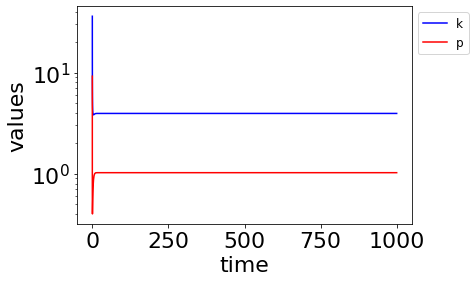

$k_{d\kappa}$ $(\mu$M$)$ = 33.265306122448976


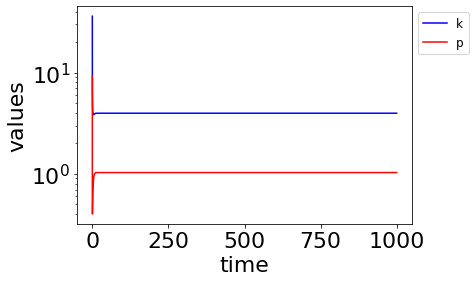

$k_{d\kappa}$ $(\mu$M$)$ = 33.673469387755105


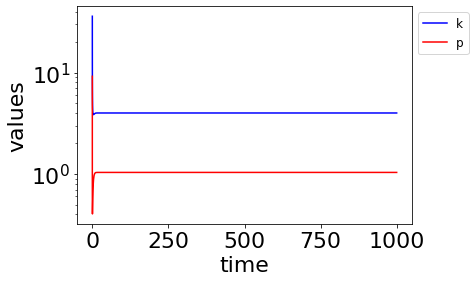

$k_{d\kappa}$ $(\mu$M$)$ = 34.08163265306123


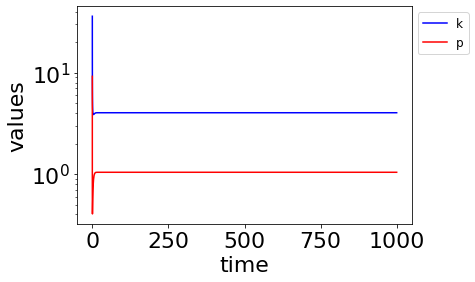

$k_{d\kappa}$ $(\mu$M$)$ = 34.48979591836735


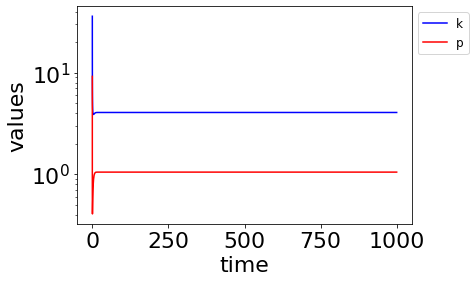

$k_{d\kappa}$ $(\mu$M$)$ = 34.89795918367347


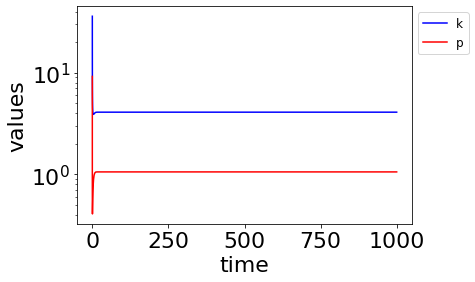

$k_{d\kappa}$ $(\mu$M$)$ = 35.30612244897959


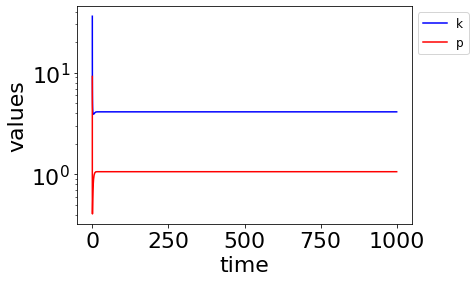

$k_{d\kappa}$ $(\mu$M$)$ = 35.714285714285715


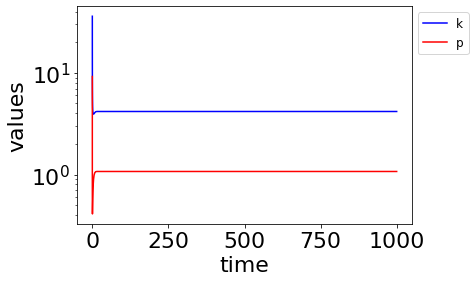

$k_{d\kappa}$ $(\mu$M$)$ = 36.12244897959184


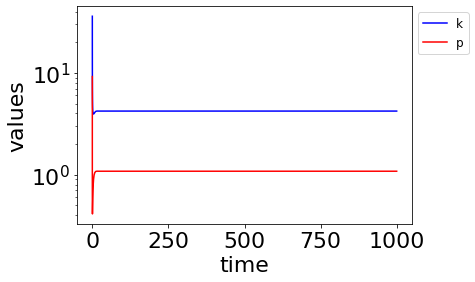

$k_{d\kappa}$ $(\mu$M$)$ = 36.53061224489796


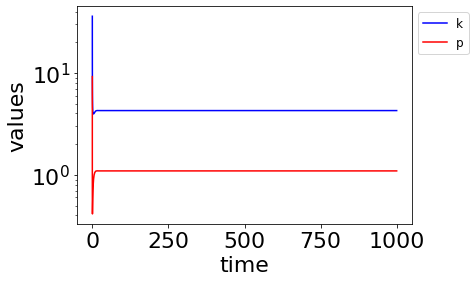

$k_{d\kappa}$ $(\mu$M$)$ = 36.93877551020408


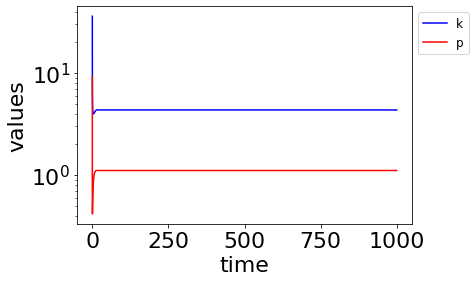

$k_{d\kappa}$ $(\mu$M$)$ = 37.3469387755102


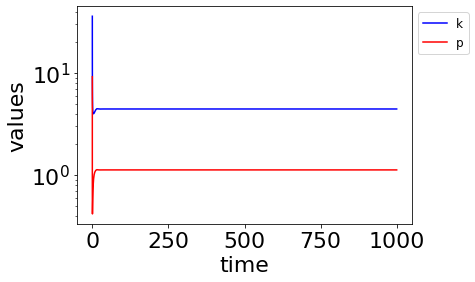

$k_{d\kappa}$ $(\mu$M$)$ = 37.755102040816325


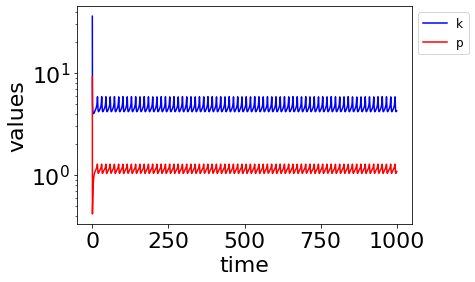

$k_{d\kappa}$ $(\mu$M$)$ = 38.16326530612245


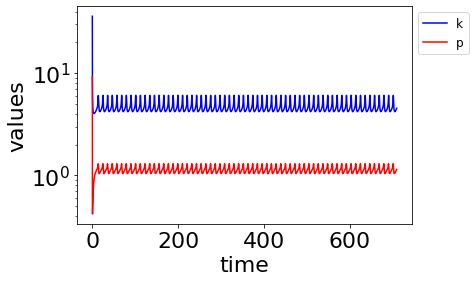

$k_{d\kappa}$ $(\mu$M$)$ = 38.57142857142857


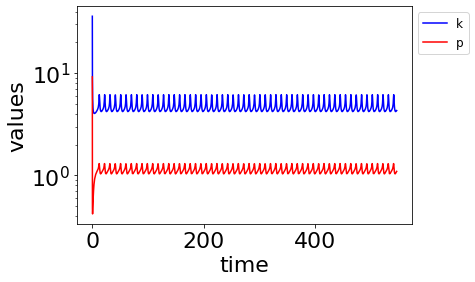

$k_{d\kappa}$ $(\mu$M$)$ = 38.9795918367347


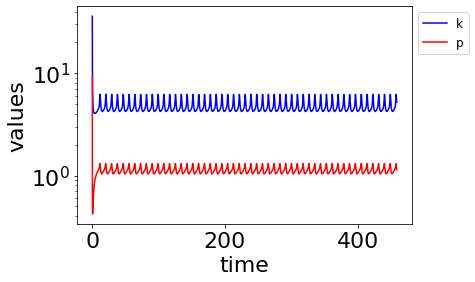

$k_{d\kappa}$ $(\mu$M$)$ = 39.38775510204081


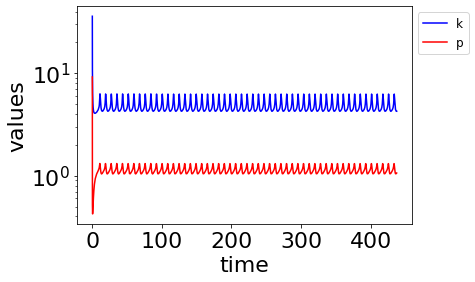

$k_{d\kappa}$ $(\mu$M$)$ = 39.79591836734694


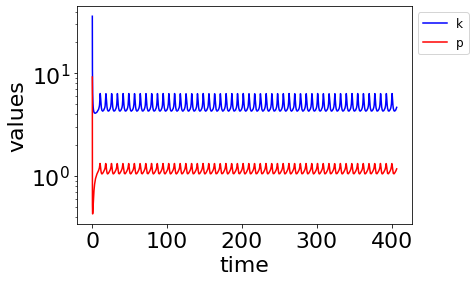

$k_{d\kappa}$ $(\mu$M$)$ = 40.20408163265306


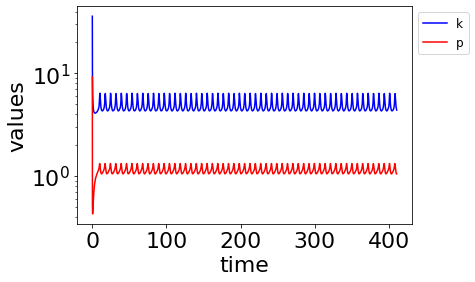

$k_{d\kappa}$ $(\mu$M$)$ = 40.61224489795919


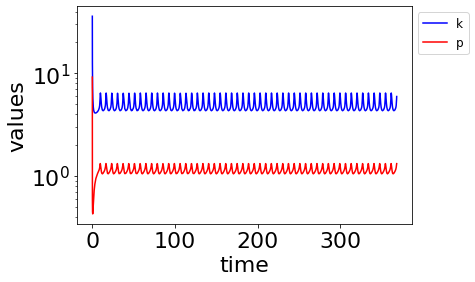

$k_{d\kappa}$ $(\mu$M$)$ = 41.02040816326531


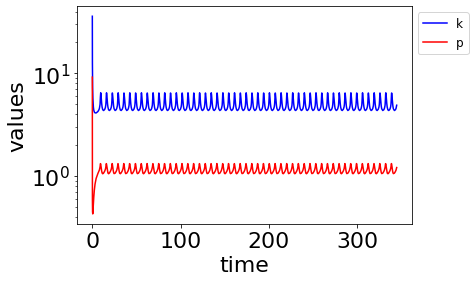

$k_{d\kappa}$ $(\mu$M$)$ = 41.42857142857143


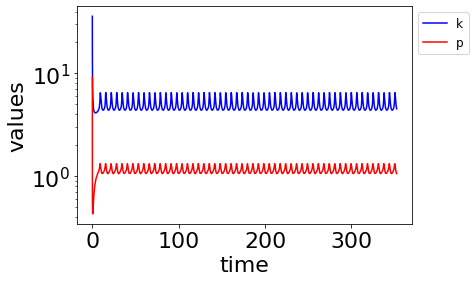

$k_{d\kappa}$ $(\mu$M$)$ = 41.83673469387755


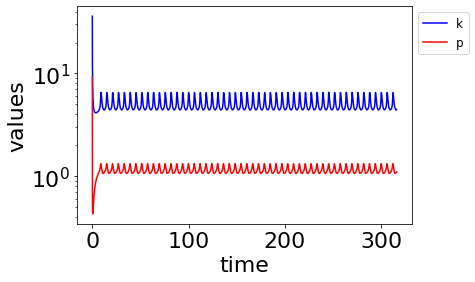

$k_{d\kappa}$ $(\mu$M$)$ = 42.244897959183675


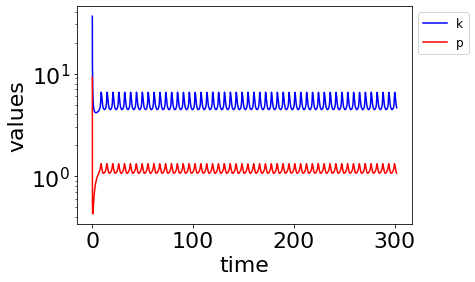

$k_{d\kappa}$ $(\mu$M$)$ = 42.6530612244898


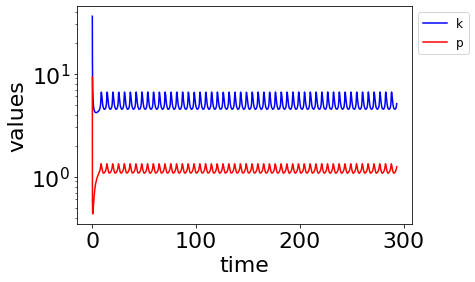

$k_{d\kappa}$ $(\mu$M$)$ = 43.06122448979592


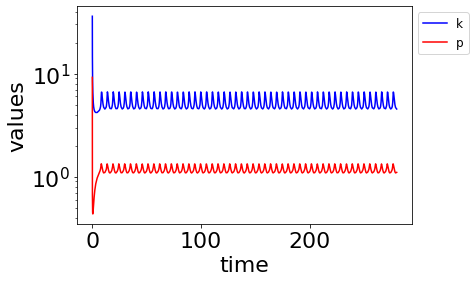

$k_{d\kappa}$ $(\mu$M$)$ = 43.46938775510204


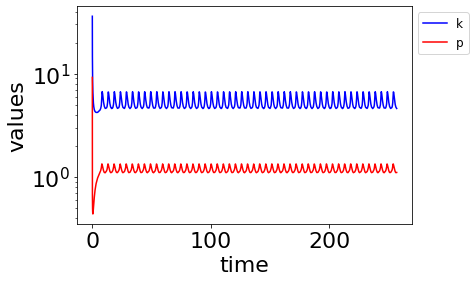

$k_{d\kappa}$ $(\mu$M$)$ = 43.87755102040816


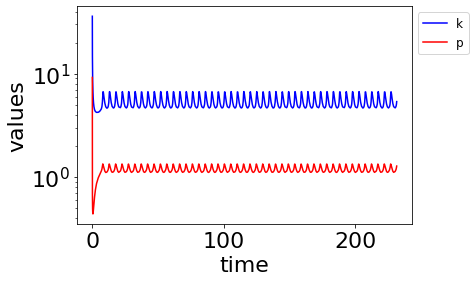

$k_{d\kappa}$ $(\mu$M$)$ = 44.285714285714285


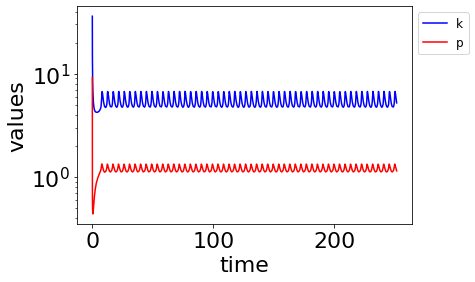

$k_{d\kappa}$ $(\mu$M$)$ = 44.69387755102041


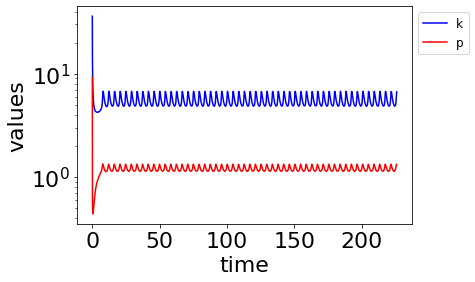

$k_{d\kappa}$ $(\mu$M$)$ = 45.10204081632653


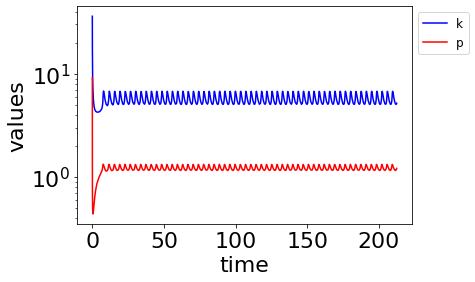

$k_{d\kappa}$ $(\mu$M$)$ = 45.51020408163265


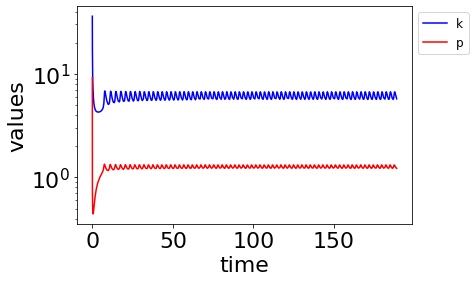

$k_{d\kappa}$ $(\mu$M$)$ = 45.91836734693878


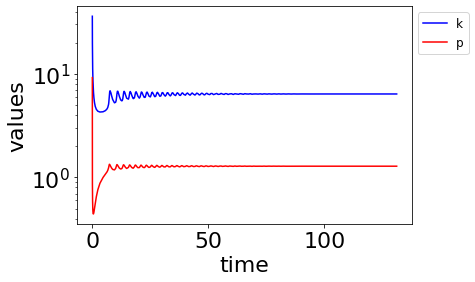

$k_{d\kappa}$ $(\mu$M$)$ = 46.326530612244895


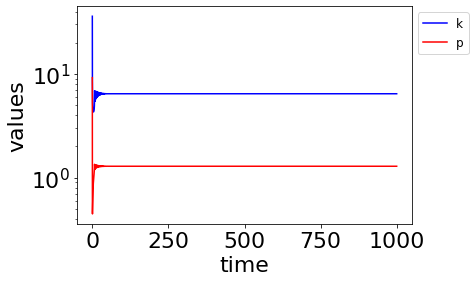

$k_{d\kappa}$ $(\mu$M$)$ = 46.734693877551024


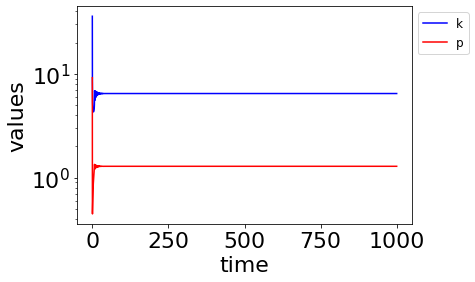

$k_{d\kappa}$ $(\mu$M$)$ = 47.14285714285714


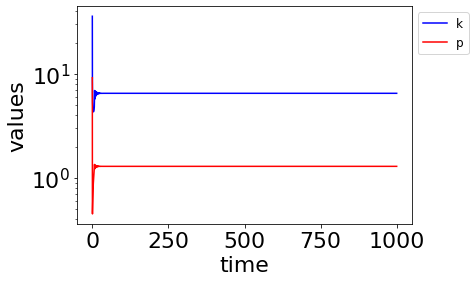

$k_{d\kappa}$ $(\mu$M$)$ = 47.55102040816327


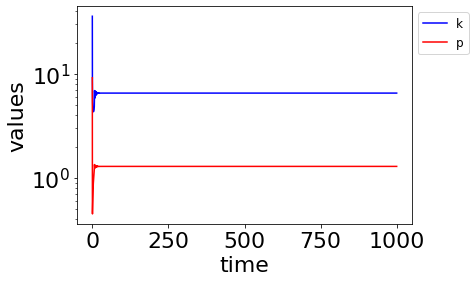

$k_{d\kappa}$ $(\mu$M$)$ = 47.95918367346939


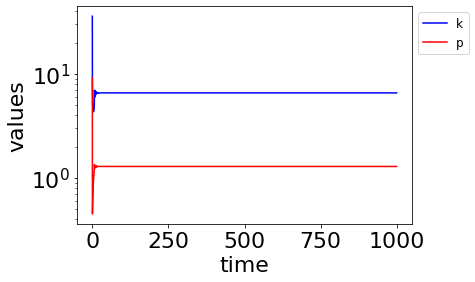

$k_{d\kappa}$ $(\mu$M$)$ = 48.36734693877551


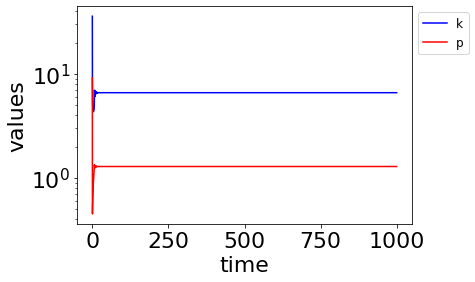

$k_{d\kappa}$ $(\mu$M$)$ = 48.775510204081634


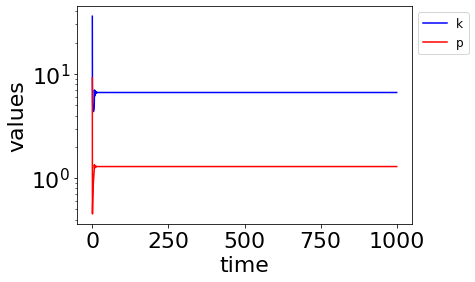

$k_{d\kappa}$ $(\mu$M$)$ = 49.183673469387756


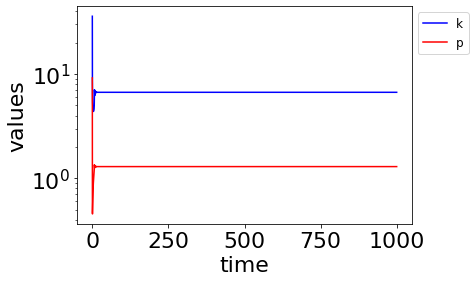

$k_{d\kappa}$ $(\mu$M$)$ = 49.59183673469388


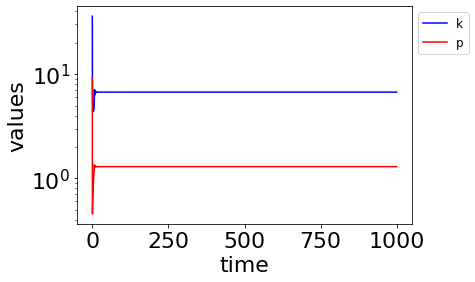

$k_{d\kappa}$ $(\mu$M$)$ = 50.0


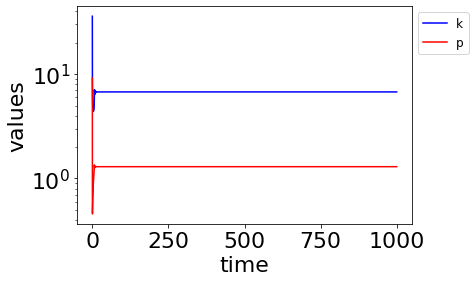

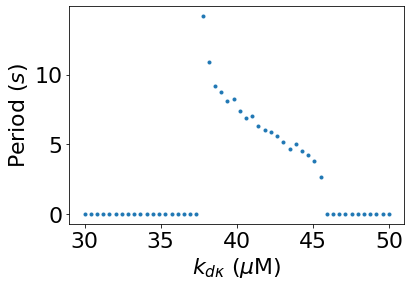

In [10]:
kdks = np.linspace(30, 50, 50)
period_fxn_kdks = robustness(3, kdks, False)

$k_{d\rho}$ $(\mu$M$^{13})$ = 100.0


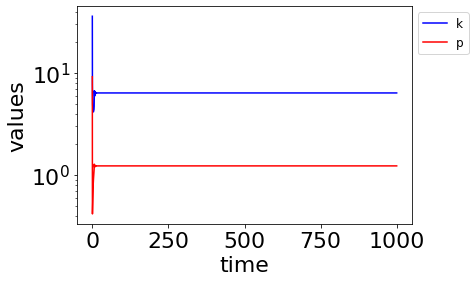

$k_{d\rho}$ $(\mu$M$^{13})$ = 105.10204081632654


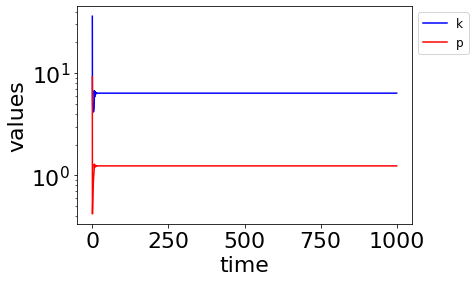

$k_{d\rho}$ $(\mu$M$^{13})$ = 110.20408163265306


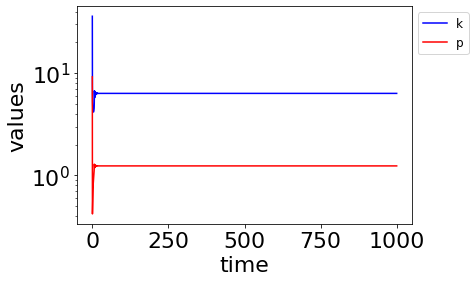

$k_{d\rho}$ $(\mu$M$^{13})$ = 115.3061224489796


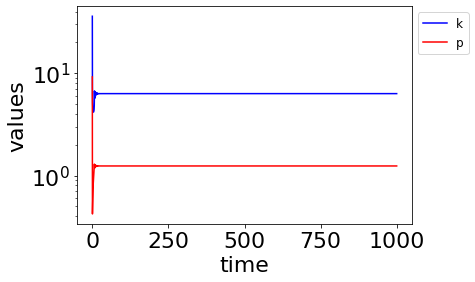

$k_{d\rho}$ $(\mu$M$^{13})$ = 120.40816326530611


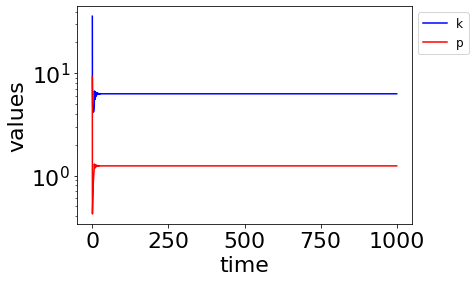

$k_{d\rho}$ $(\mu$M$^{13})$ = 125.51020408163265


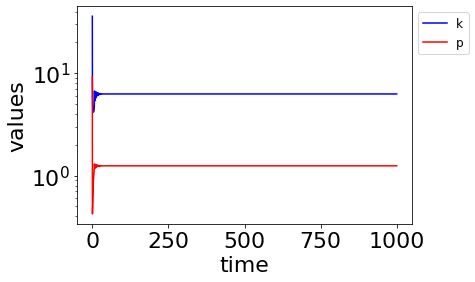

$k_{d\rho}$ $(\mu$M$^{13})$ = 130.6122448979592


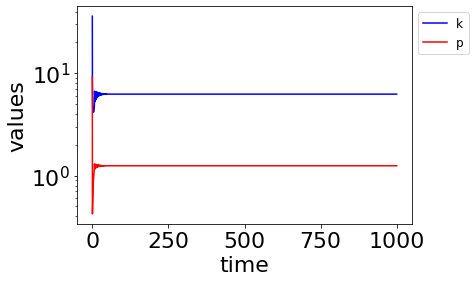

$k_{d\rho}$ $(\mu$M$^{13})$ = 135.71428571428572


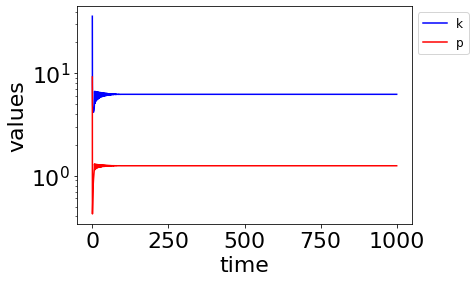

$k_{d\rho}$ $(\mu$M$^{13})$ = 140.81632653061223


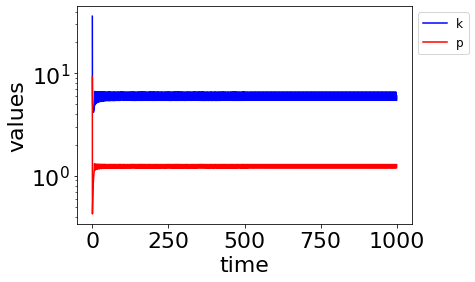

$k_{d\rho}$ $(\mu$M$^{13})$ = 145.91836734693877


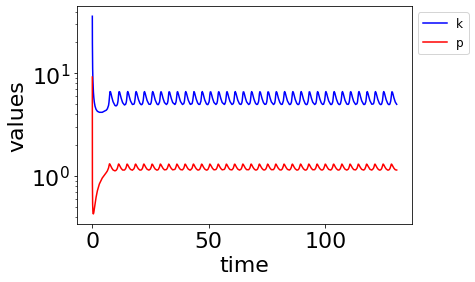

$k_{d\rho}$ $(\mu$M$^{13})$ = 151.0204081632653


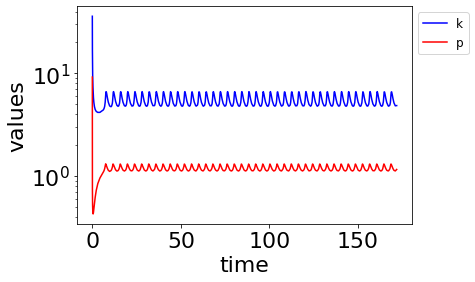

$k_{d\rho}$ $(\mu$M$^{13})$ = 156.12244897959184


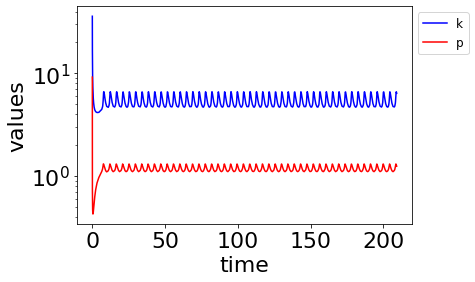

$k_{d\rho}$ $(\mu$M$^{13})$ = 161.22448979591837


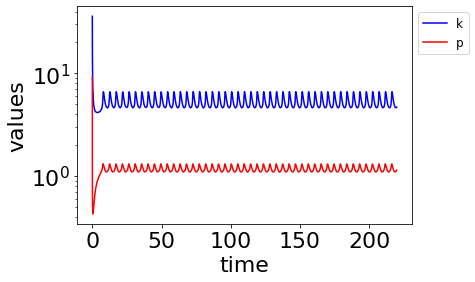

$k_{d\rho}$ $(\mu$M$^{13})$ = 166.32653061224488


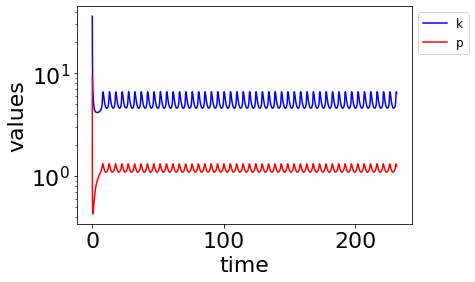

$k_{d\rho}$ $(\mu$M$^{13})$ = 171.42857142857144


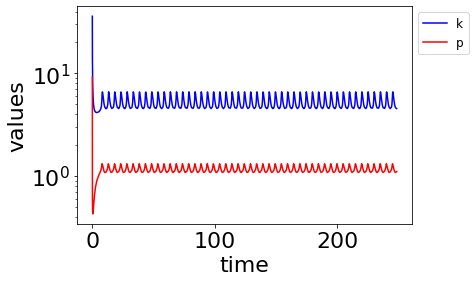

$k_{d\rho}$ $(\mu$M$^{13})$ = 176.53061224489795


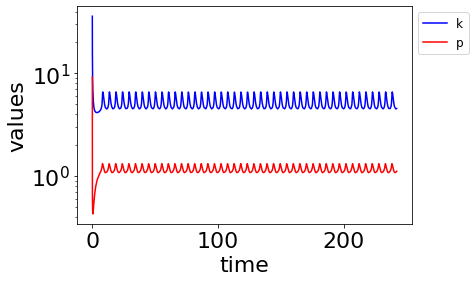

$k_{d\rho}$ $(\mu$M$^{13})$ = 181.6326530612245


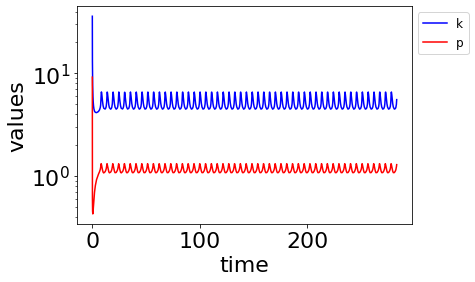

$k_{d\rho}$ $(\mu$M$^{13})$ = 186.73469387755102


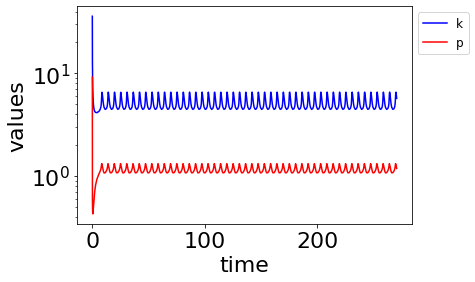

$k_{d\rho}$ $(\mu$M$^{13})$ = 191.83673469387753


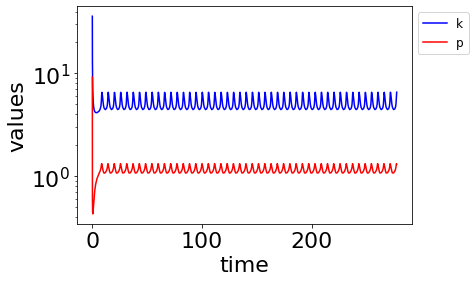

$k_{d\rho}$ $(\mu$M$^{13})$ = 196.9387755102041


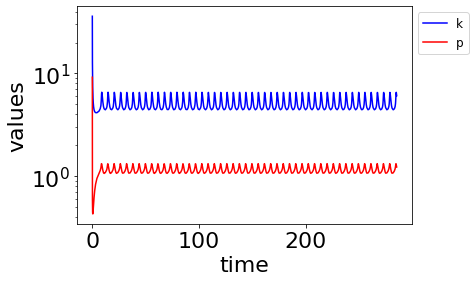

$k_{d\rho}$ $(\mu$M$^{13})$ = 202.0408163265306


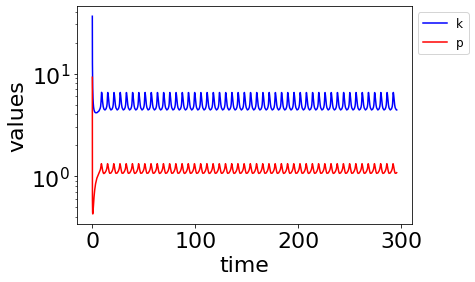

$k_{d\rho}$ $(\mu$M$^{13})$ = 207.14285714285714


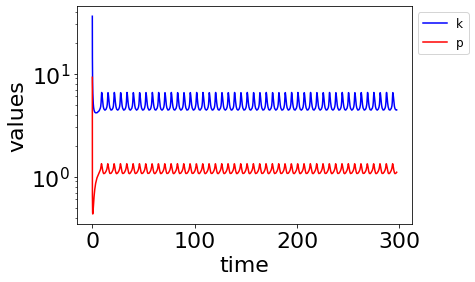

$k_{d\rho}$ $(\mu$M$^{13})$ = 212.24489795918367


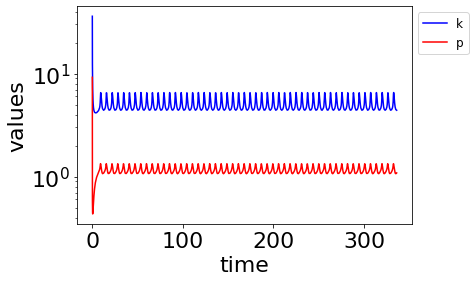

$k_{d\rho}$ $(\mu$M$^{13})$ = 217.34693877551018


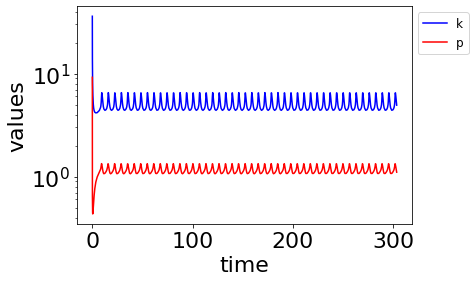

$k_{d\rho}$ $(\mu$M$^{13})$ = 222.44897959183675


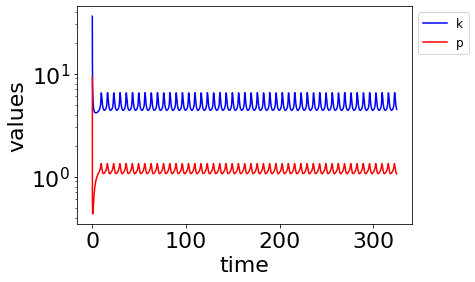

$k_{d\rho}$ $(\mu$M$^{13})$ = 227.55102040816325


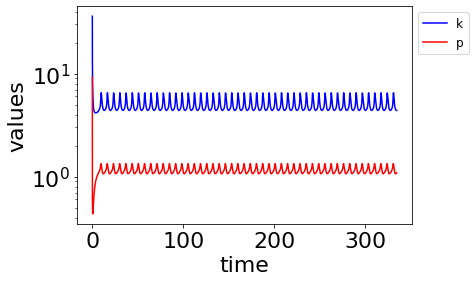

$k_{d\rho}$ $(\mu$M$^{13})$ = 232.6530612244898


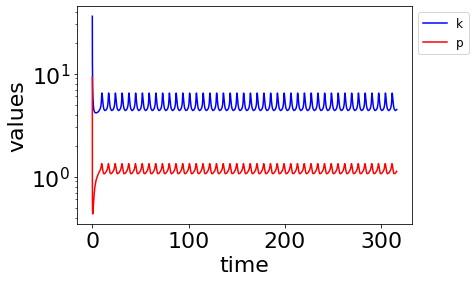

$k_{d\rho}$ $(\mu$M$^{13})$ = 237.75510204081633


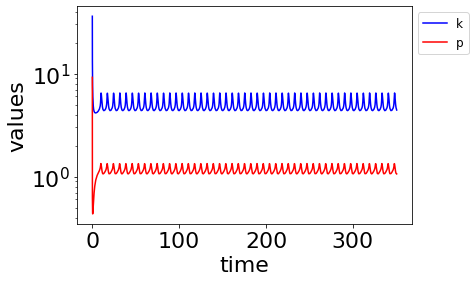

$k_{d\rho}$ $(\mu$M$^{13})$ = 242.85714285714286


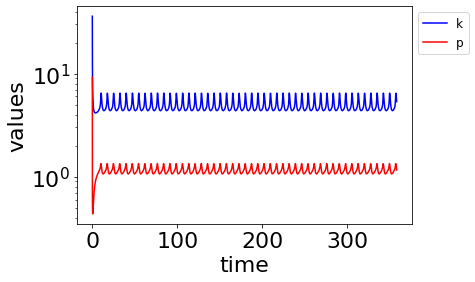

$k_{d\rho}$ $(\mu$M$^{13})$ = 247.9591836734694


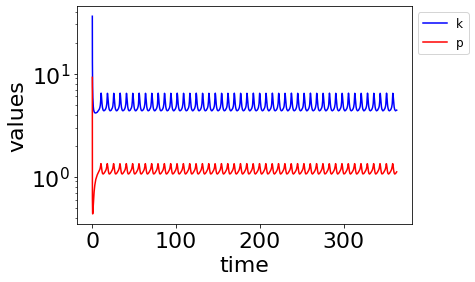

$k_{d\rho}$ $(\mu$M$^{13})$ = 253.0612244897959


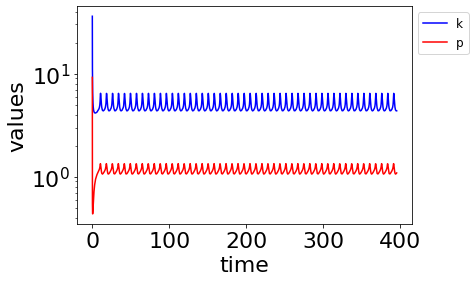

$k_{d\rho}$ $(\mu$M$^{13})$ = 258.1632653061224


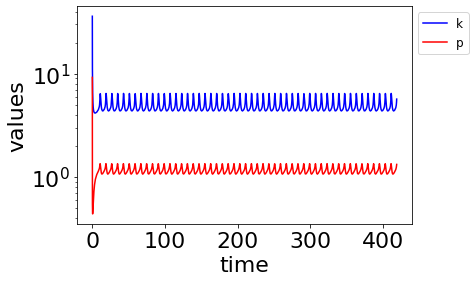

$k_{d\rho}$ $(\mu$M$^{13})$ = 263.265306122449


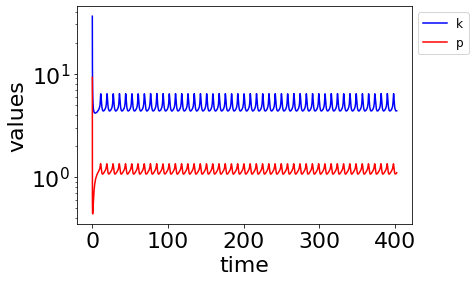

$k_{d\rho}$ $(\mu$M$^{13})$ = 268.36734693877554


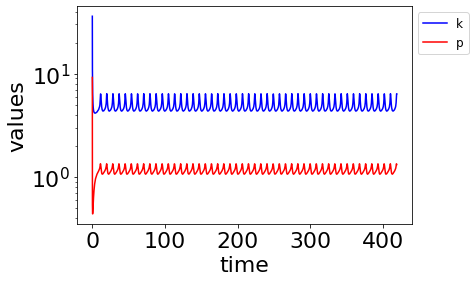

$k_{d\rho}$ $(\mu$M$^{13})$ = 273.46938775510205


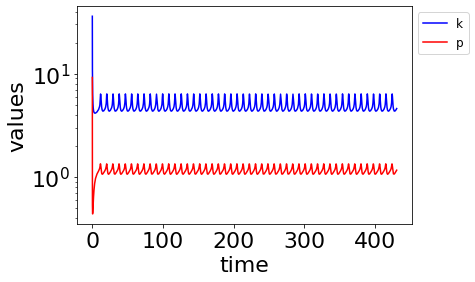

$k_{d\rho}$ $(\mu$M$^{13})$ = 278.57142857142856


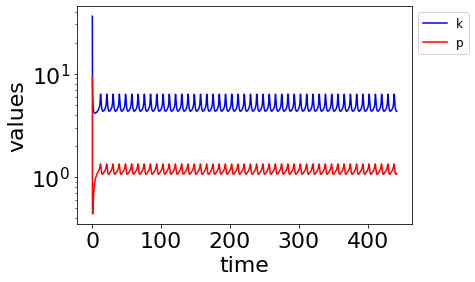

$k_{d\rho}$ $(\mu$M$^{13})$ = 283.67346938775506


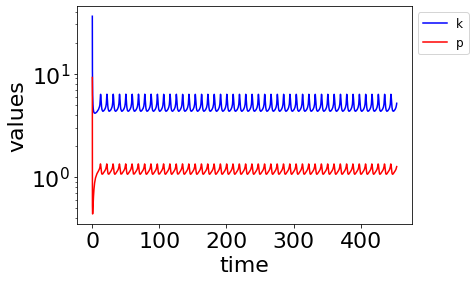

$k_{d\rho}$ $(\mu$M$^{13})$ = 288.7755102040816


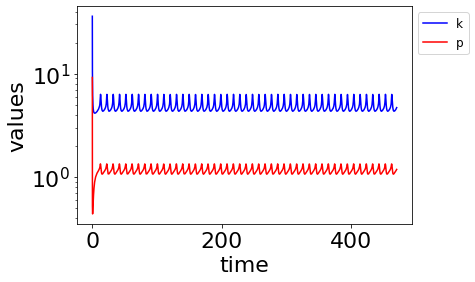

$k_{d\rho}$ $(\mu$M$^{13})$ = 293.8775510204082


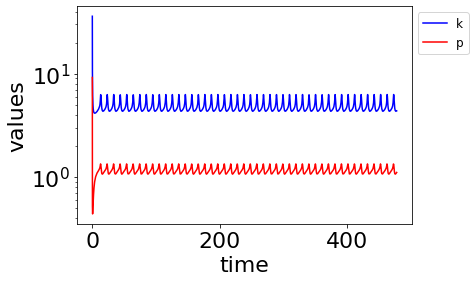

$k_{d\rho}$ $(\mu$M$^{13})$ = 298.9795918367347


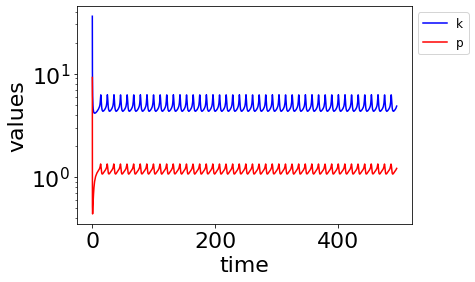

$k_{d\rho}$ $(\mu$M$^{13})$ = 304.0816326530612


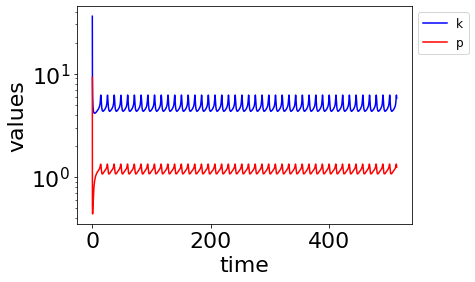

$k_{d\rho}$ $(\mu$M$^{13})$ = 309.1836734693877


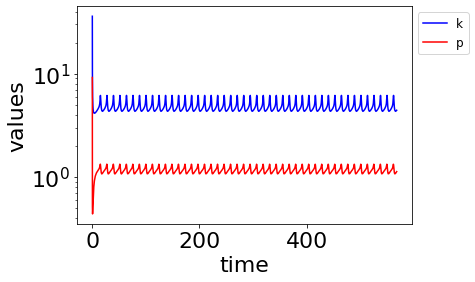

$k_{d\rho}$ $(\mu$M$^{13})$ = 314.2857142857143


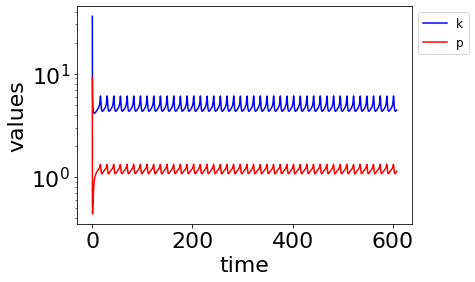

$k_{d\rho}$ $(\mu$M$^{13})$ = 319.38775510204084


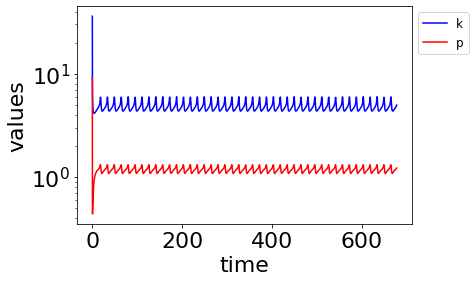

$k_{d\rho}$ $(\mu$M$^{13})$ = 324.48979591836735


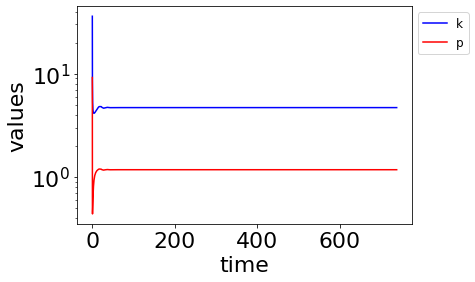

$k_{d\rho}$ $(\mu$M$^{13})$ = 329.59183673469386


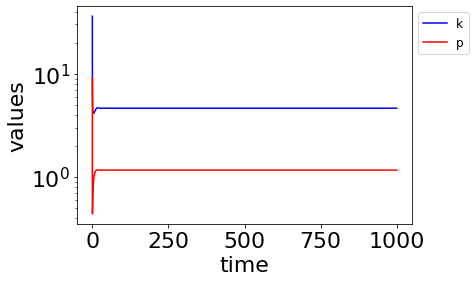

$k_{d\rho}$ $(\mu$M$^{13})$ = 334.69387755102036


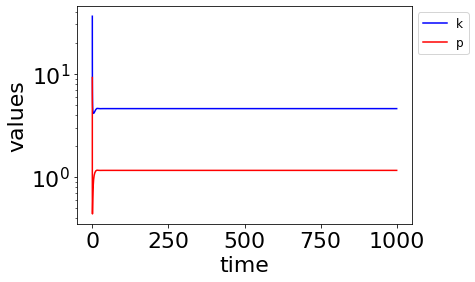

$k_{d\rho}$ $(\mu$M$^{13})$ = 339.7959183673469


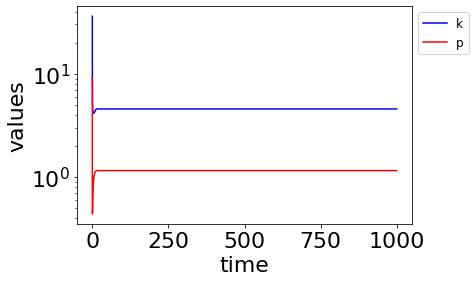

$k_{d\rho}$ $(\mu$M$^{13})$ = 344.8979591836735


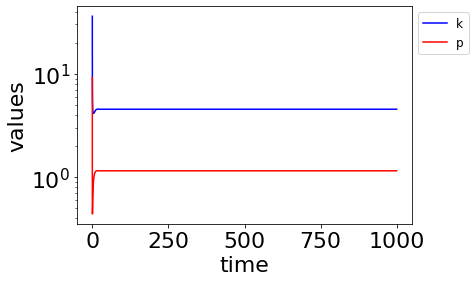

$k_{d\rho}$ $(\mu$M$^{13})$ = 350.0


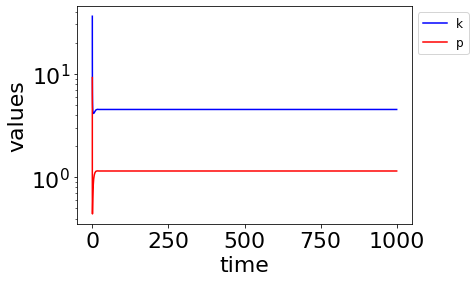

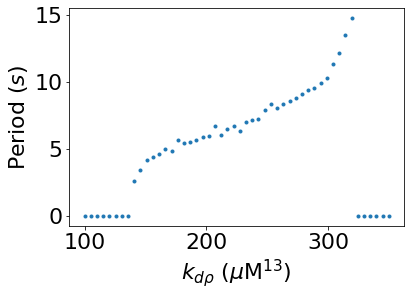

In [11]:
kdps = np.linspace(100, 350, 50)
period_fxn_kdps = robustness(4, kdps, False)

$\kappa_{tot}$ $(\mu$M$)$ = 30.0


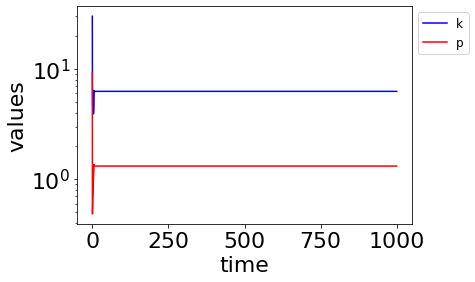

$\kappa_{tot}$ $(\mu$M$)$ = 30.20408163265306


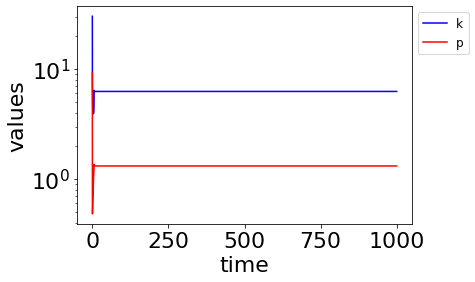

$\kappa_{tot}$ $(\mu$M$)$ = 30.408163265306122


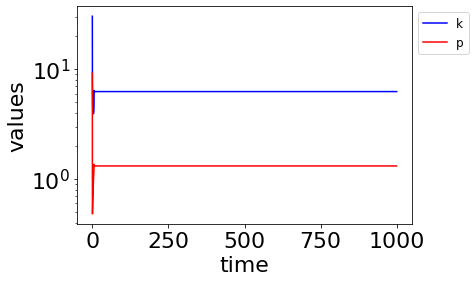

$\kappa_{tot}$ $(\mu$M$)$ = 30.612244897959183


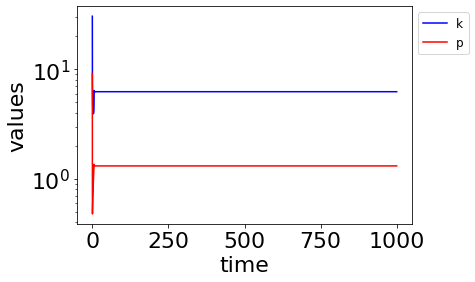

$\kappa_{tot}$ $(\mu$M$)$ = 30.816326530612244


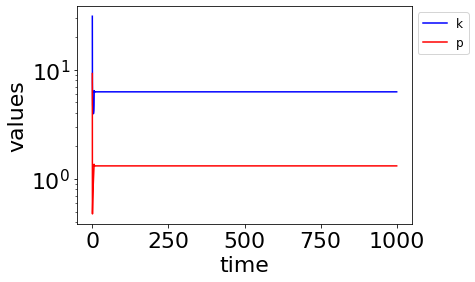

$\kappa_{tot}$ $(\mu$M$)$ = 31.020408163265305


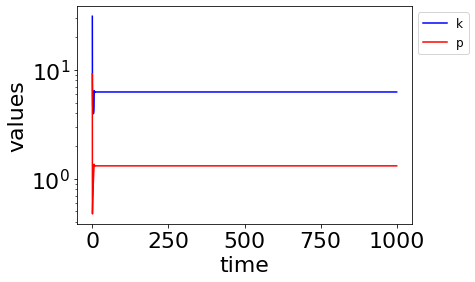

$\kappa_{tot}$ $(\mu$M$)$ = 31.224489795918366


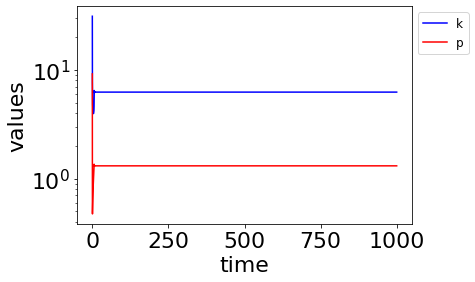

$\kappa_{tot}$ $(\mu$M$)$ = 31.428571428571427


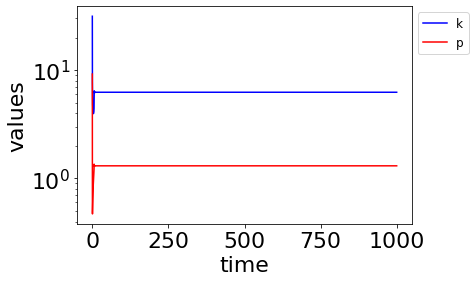

$\kappa_{tot}$ $(\mu$M$)$ = 31.632653061224488


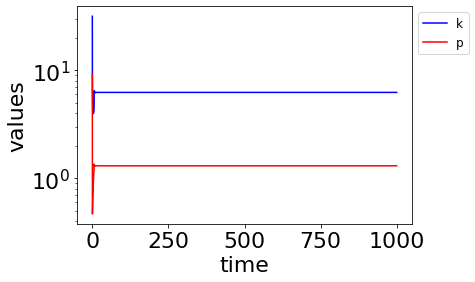

$\kappa_{tot}$ $(\mu$M$)$ = 31.836734693877553


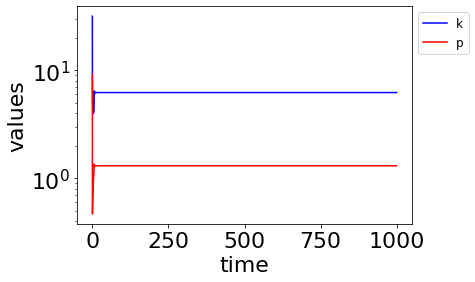

$\kappa_{tot}$ $(\mu$M$)$ = 32.04081632653061


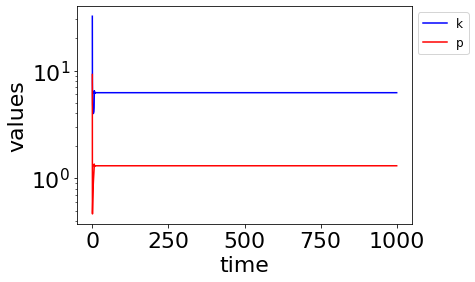

$\kappa_{tot}$ $(\mu$M$)$ = 32.244897959183675


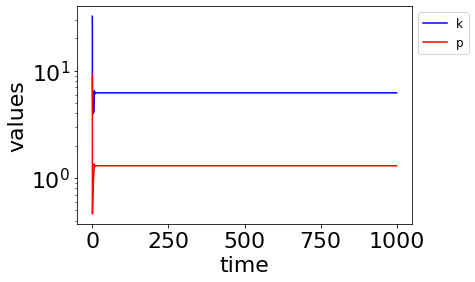

$\kappa_{tot}$ $(\mu$M$)$ = 32.44897959183673


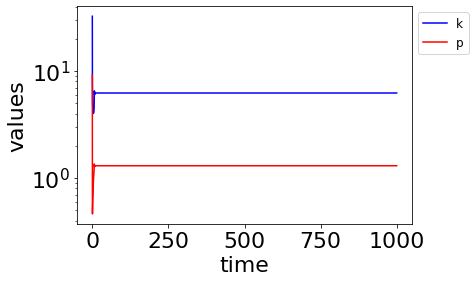

$\kappa_{tot}$ $(\mu$M$)$ = 32.6530612244898


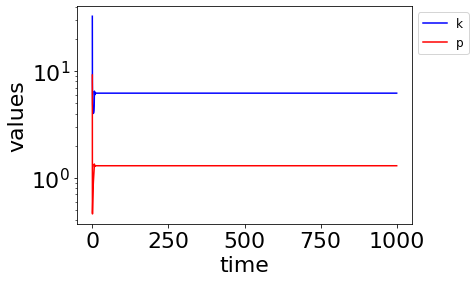

$\kappa_{tot}$ $(\mu$M$)$ = 32.857142857142854


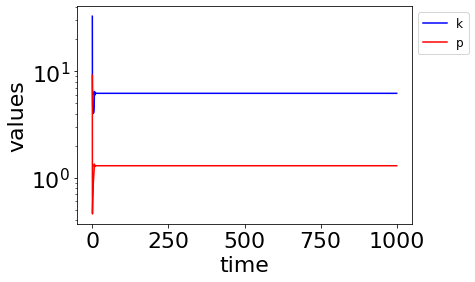

$\kappa_{tot}$ $(\mu$M$)$ = 33.06122448979592


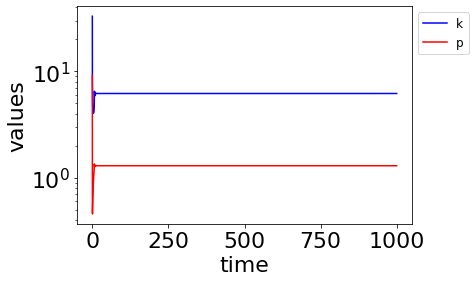

$\kappa_{tot}$ $(\mu$M$)$ = 33.265306122448976


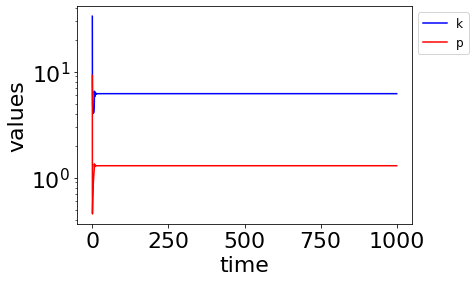

$\kappa_{tot}$ $(\mu$M$)$ = 33.46938775510204


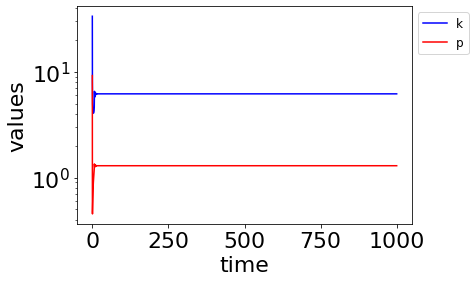

$\kappa_{tot}$ $(\mu$M$)$ = 33.673469387755105


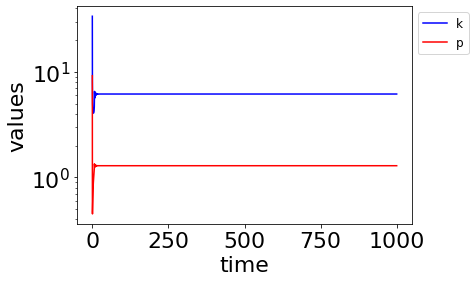

$\kappa_{tot}$ $(\mu$M$)$ = 33.87755102040816


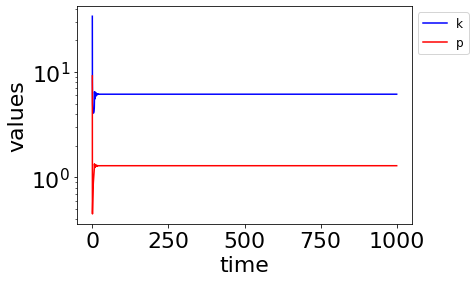

$\kappa_{tot}$ $(\mu$M$)$ = 34.08163265306123


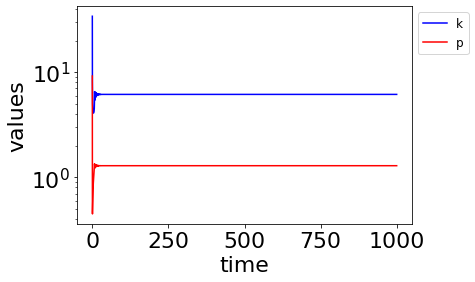

$\kappa_{tot}$ $(\mu$M$)$ = 34.285714285714285


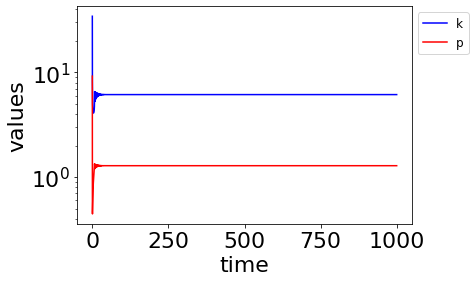

$\kappa_{tot}$ $(\mu$M$)$ = 34.48979591836735


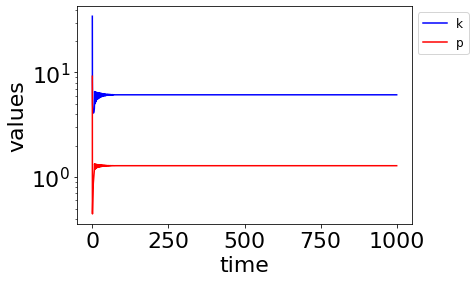

$\kappa_{tot}$ $(\mu$M$)$ = 34.69387755102041


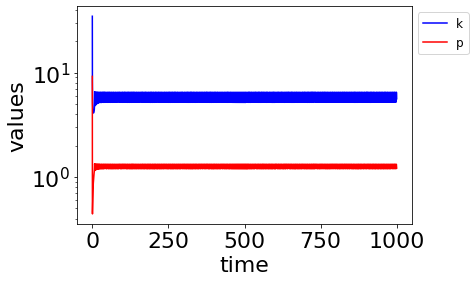

$\kappa_{tot}$ $(\mu$M$)$ = 34.89795918367347


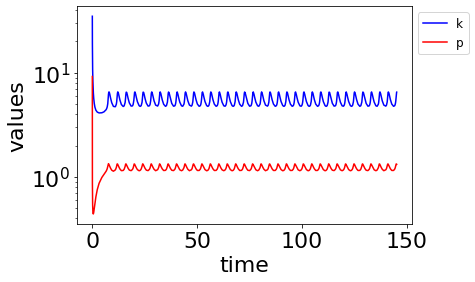

$\kappa_{tot}$ $(\mu$M$)$ = 35.10204081632653


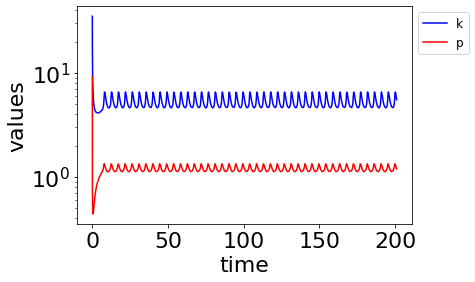

$\kappa_{tot}$ $(\mu$M$)$ = 35.30612244897959


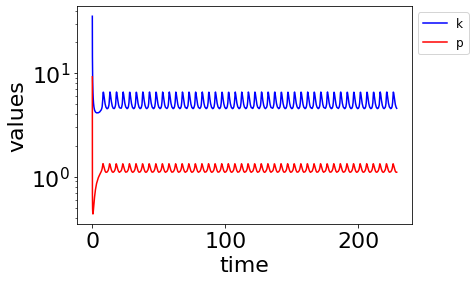

$\kappa_{tot}$ $(\mu$M$)$ = 35.51020408163265


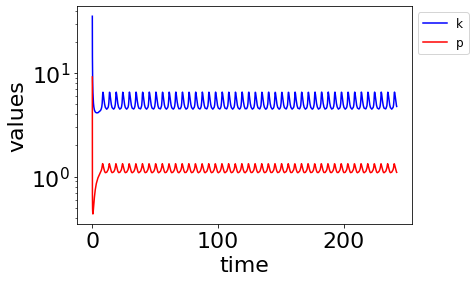

$\kappa_{tot}$ $(\mu$M$)$ = 35.714285714285715


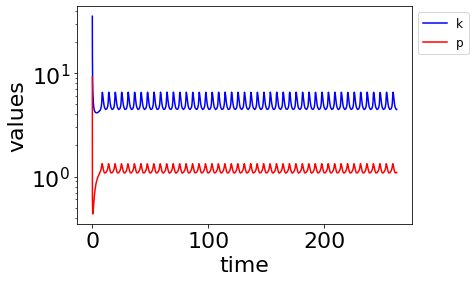

$\kappa_{tot}$ $(\mu$M$)$ = 35.91836734693877


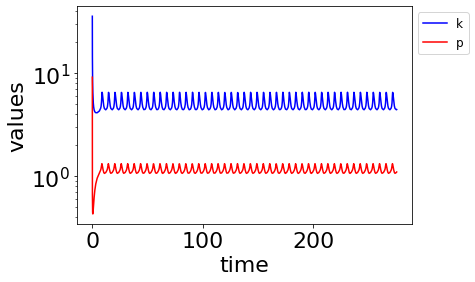

$\kappa_{tot}$ $(\mu$M$)$ = 36.12244897959184


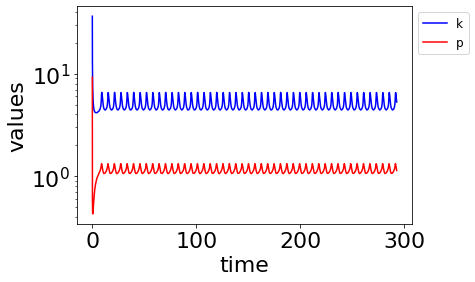

$\kappa_{tot}$ $(\mu$M$)$ = 36.326530612244895


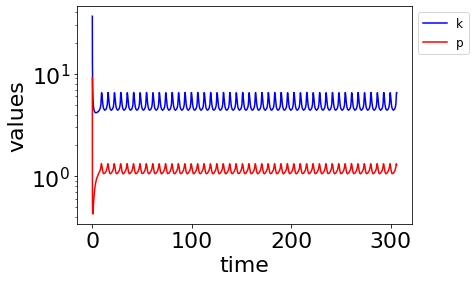

$\kappa_{tot}$ $(\mu$M$)$ = 36.53061224489796


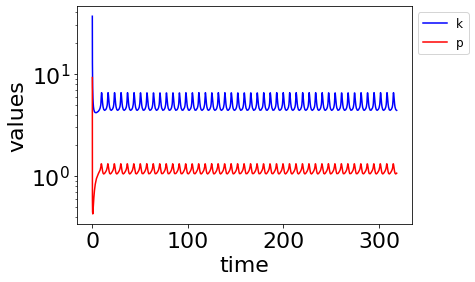

$\kappa_{tot}$ $(\mu$M$)$ = 36.734693877551024


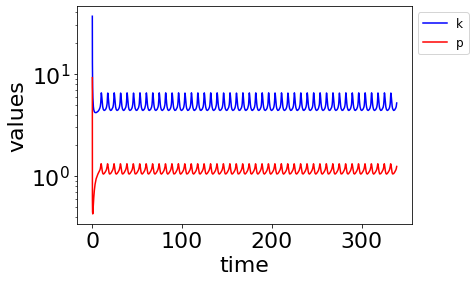

$\kappa_{tot}$ $(\mu$M$)$ = 36.93877551020408


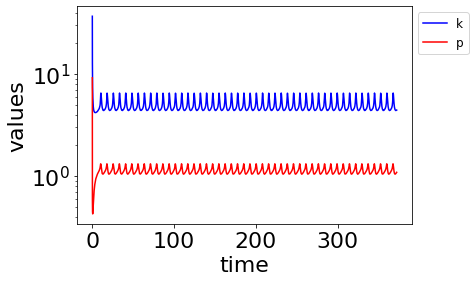

$\kappa_{tot}$ $(\mu$M$)$ = 37.142857142857146


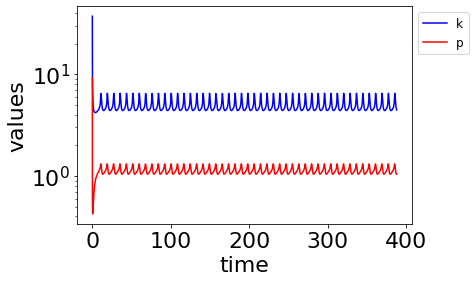

$\kappa_{tot}$ $(\mu$M$)$ = 37.3469387755102


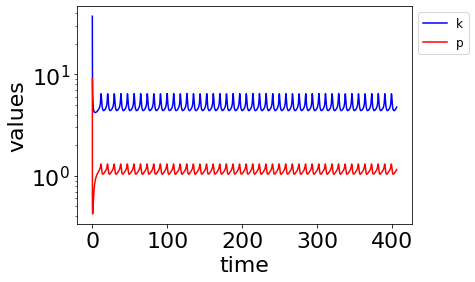

$\kappa_{tot}$ $(\mu$M$)$ = 37.55102040816327


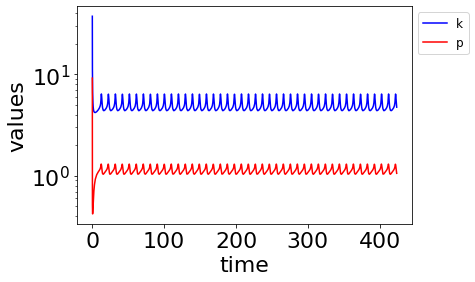

$\kappa_{tot}$ $(\mu$M$)$ = 37.755102040816325


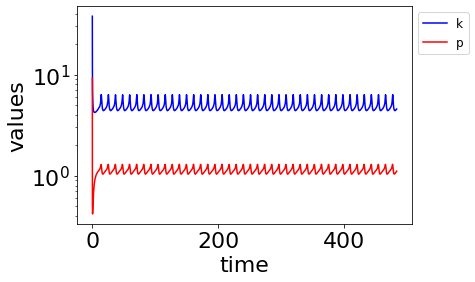

$\kappa_{tot}$ $(\mu$M$)$ = 37.95918367346939


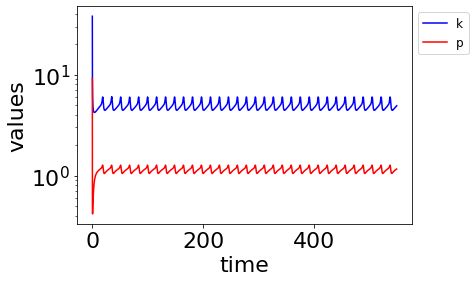

$\kappa_{tot}$ $(\mu$M$)$ = 38.16326530612245


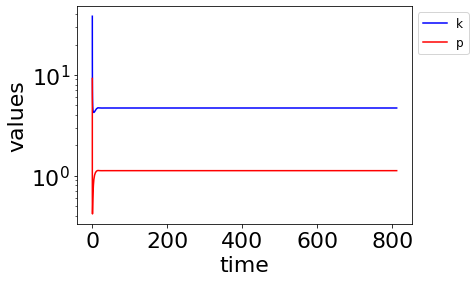

$\kappa_{tot}$ $(\mu$M$)$ = 38.36734693877551


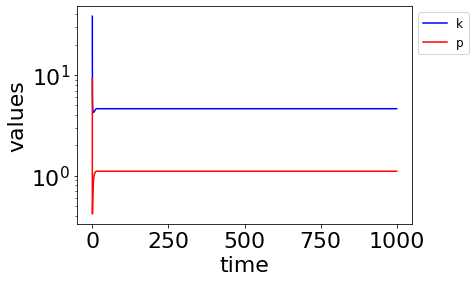

$\kappa_{tot}$ $(\mu$M$)$ = 38.57142857142857


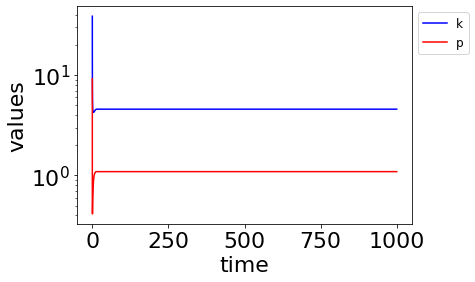

$\kappa_{tot}$ $(\mu$M$)$ = 38.775510204081634


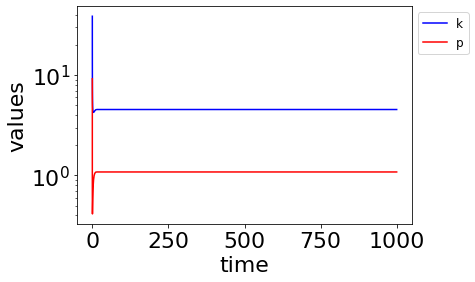

$\kappa_{tot}$ $(\mu$M$)$ = 38.9795918367347


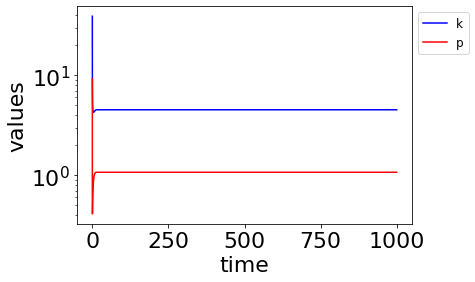

$\kappa_{tot}$ $(\mu$M$)$ = 39.183673469387756


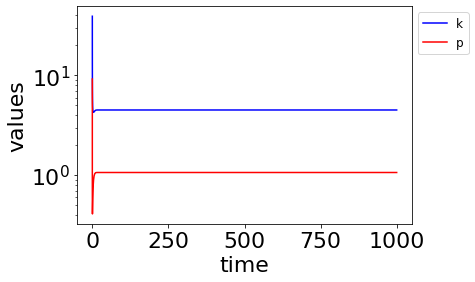

$\kappa_{tot}$ $(\mu$M$)$ = 39.38775510204081


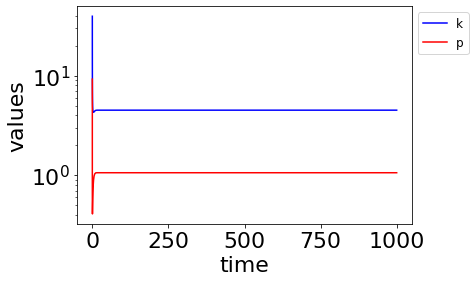

$\kappa_{tot}$ $(\mu$M$)$ = 39.59183673469388


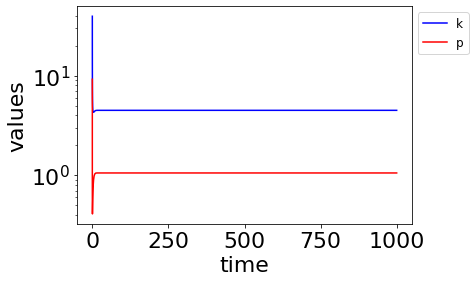

$\kappa_{tot}$ $(\mu$M$)$ = 39.79591836734694


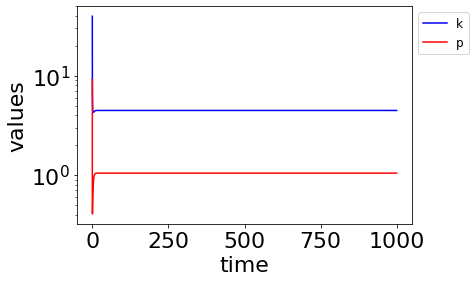

$\kappa_{tot}$ $(\mu$M$)$ = 40.0


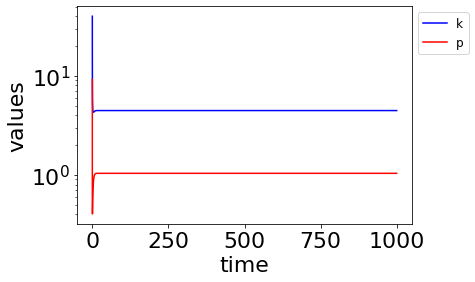

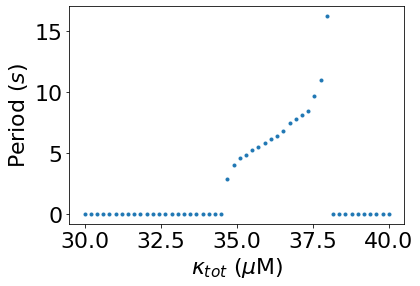

In [12]:
ktots = np.linspace(30, 40, 50)
period_fxn_ktots = robustness(5, ktots, False)

$\rho_{tot}$ $(\mu$M$)$ = 8.5


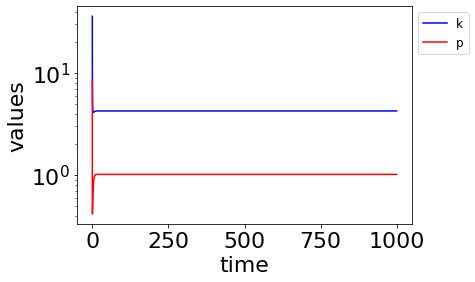

$\rho_{tot}$ $(\mu$M$)$ = 8.520408163265307


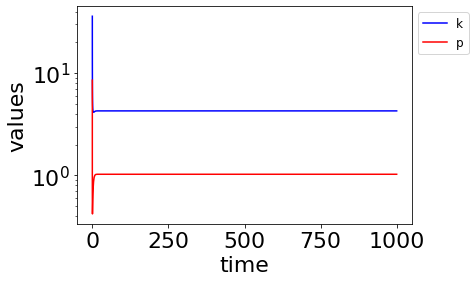

$\rho_{tot}$ $(\mu$M$)$ = 8.540816326530612


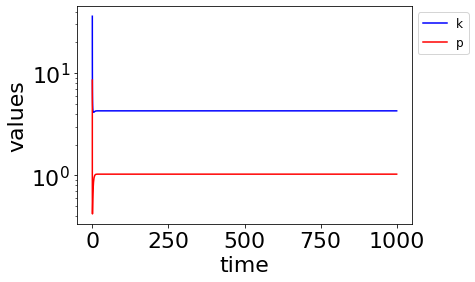

$\rho_{tot}$ $(\mu$M$)$ = 8.561224489795919


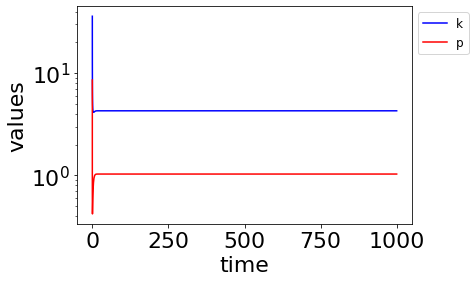

$\rho_{tot}$ $(\mu$M$)$ = 8.581632653061224


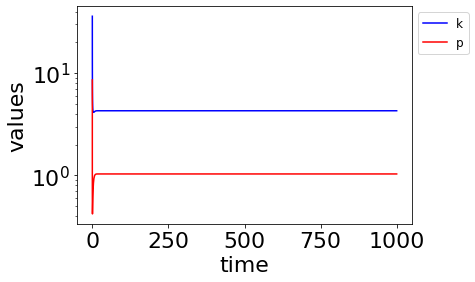

$\rho_{tot}$ $(\mu$M$)$ = 8.60204081632653


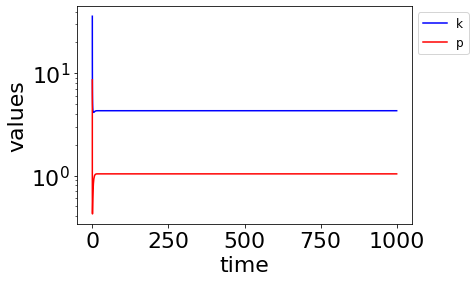

$\rho_{tot}$ $(\mu$M$)$ = 8.622448979591837


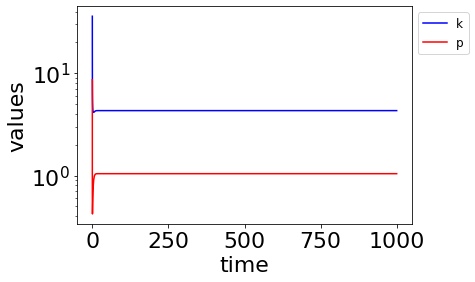

$\rho_{tot}$ $(\mu$M$)$ = 8.642857142857142


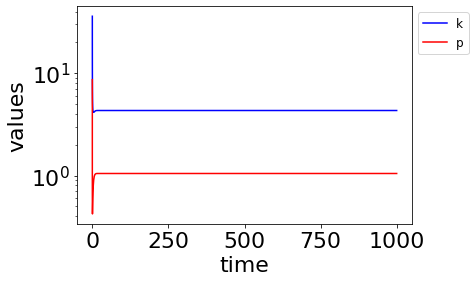

$\rho_{tot}$ $(\mu$M$)$ = 8.66326530612245


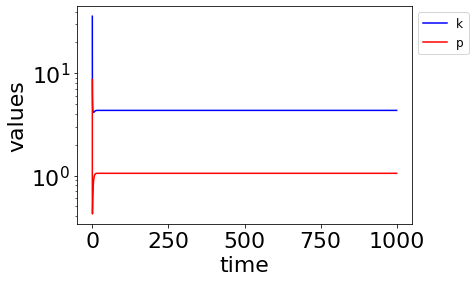

$\rho_{tot}$ $(\mu$M$)$ = 8.683673469387756


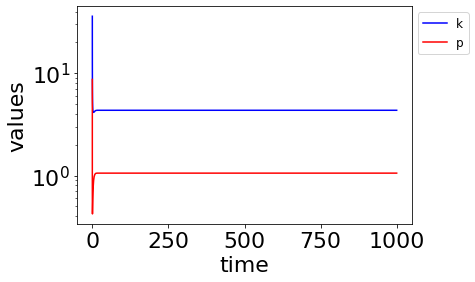

$\rho_{tot}$ $(\mu$M$)$ = 8.704081632653061


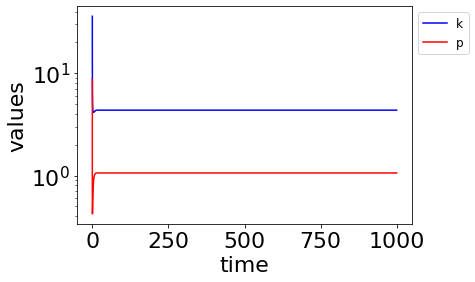

$\rho_{tot}$ $(\mu$M$)$ = 8.724489795918368


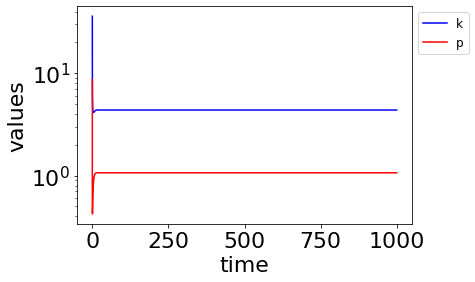

$\rho_{tot}$ $(\mu$M$)$ = 8.744897959183673


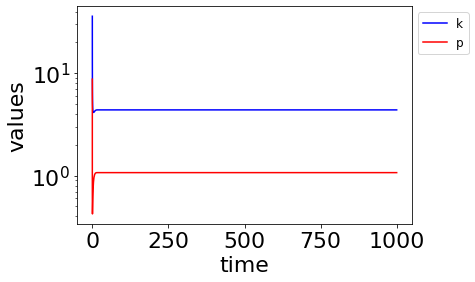

$\rho_{tot}$ $(\mu$M$)$ = 8.76530612244898


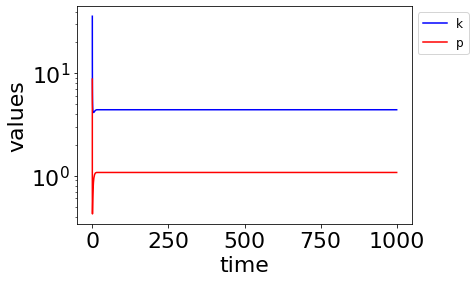

$\rho_{tot}$ $(\mu$M$)$ = 8.785714285714286


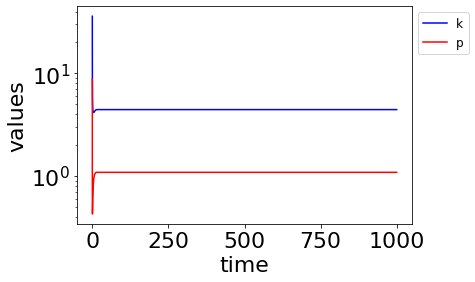

$\rho_{tot}$ $(\mu$M$)$ = 8.806122448979592


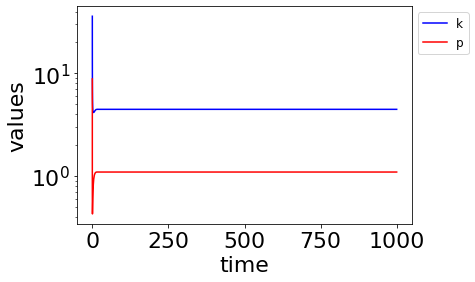

$\rho_{tot}$ $(\mu$M$)$ = 8.826530612244898


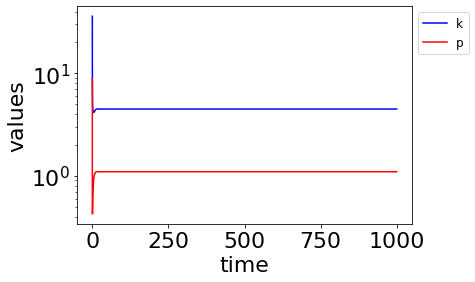

$\rho_{tot}$ $(\mu$M$)$ = 8.846938775510203


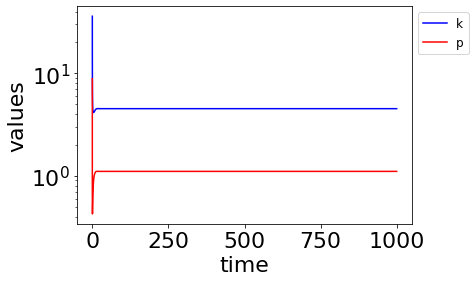

$\rho_{tot}$ $(\mu$M$)$ = 8.86734693877551


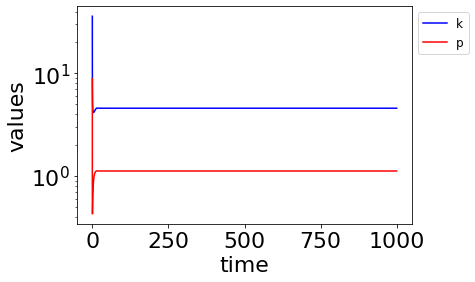

$\rho_{tot}$ $(\mu$M$)$ = 8.887755102040817


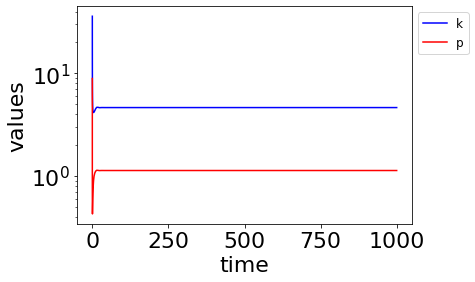

$\rho_{tot}$ $(\mu$M$)$ = 8.908163265306122


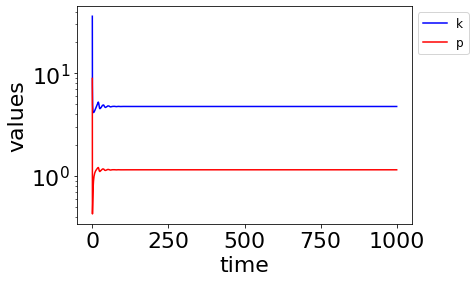

$\rho_{tot}$ $(\mu$M$)$ = 8.928571428571429


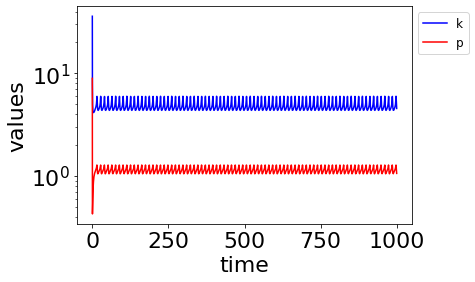

$\rho_{tot}$ $(\mu$M$)$ = 8.948979591836734


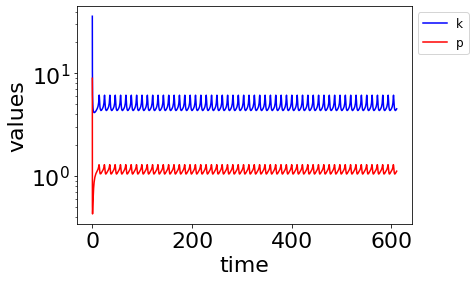

$\rho_{tot}$ $(\mu$M$)$ = 8.96938775510204


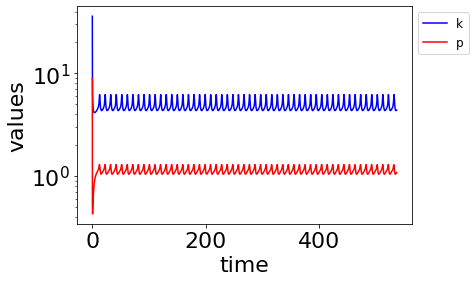

$\rho_{tot}$ $(\mu$M$)$ = 8.989795918367347


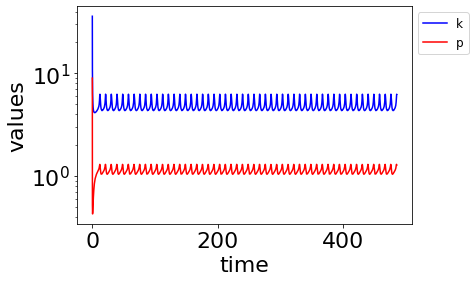

$\rho_{tot}$ $(\mu$M$)$ = 9.010204081632653


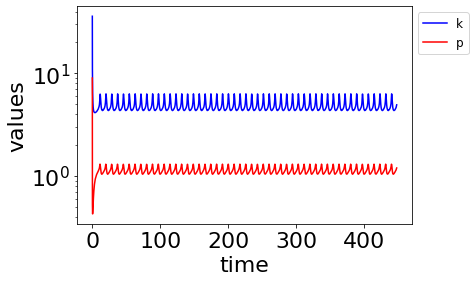

$\rho_{tot}$ $(\mu$M$)$ = 9.03061224489796


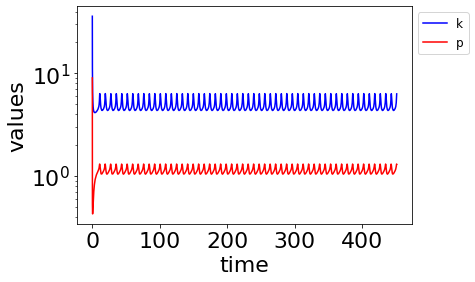

$\rho_{tot}$ $(\mu$M$)$ = 9.051020408163264


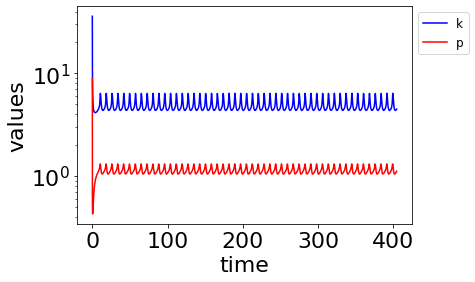

$\rho_{tot}$ $(\mu$M$)$ = 9.071428571428571


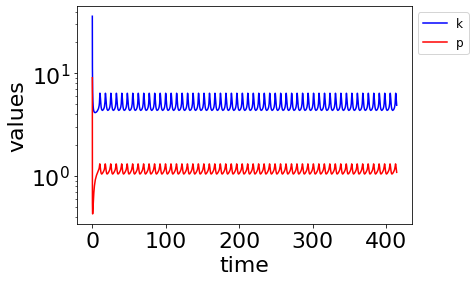

$\rho_{tot}$ $(\mu$M$)$ = 9.091836734693878


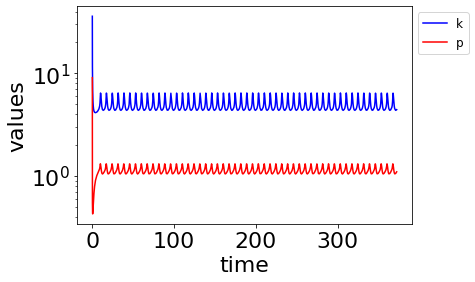

$\rho_{tot}$ $(\mu$M$)$ = 9.112244897959183


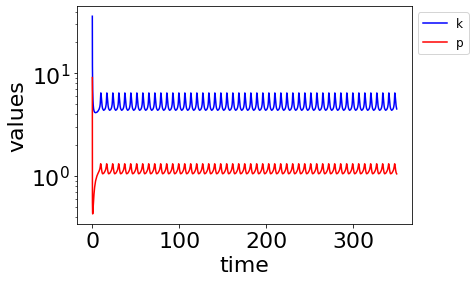

$\rho_{tot}$ $(\mu$M$)$ = 9.13265306122449


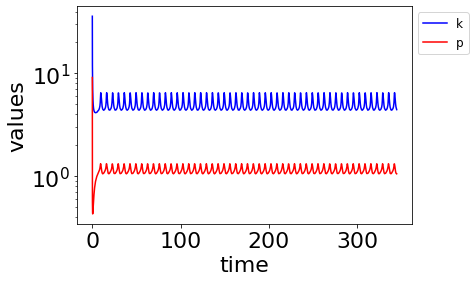

$\rho_{tot}$ $(\mu$M$)$ = 9.153061224489797


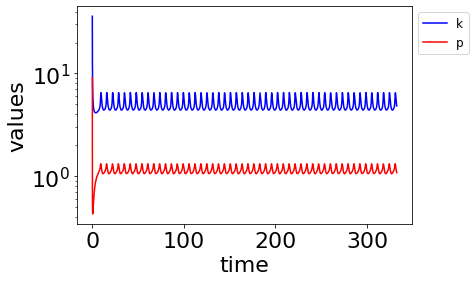

$\rho_{tot}$ $(\mu$M$)$ = 9.173469387755102


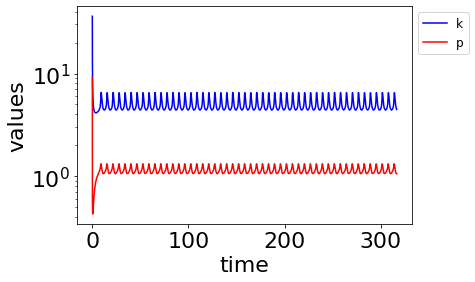

$\rho_{tot}$ $(\mu$M$)$ = 9.193877551020408


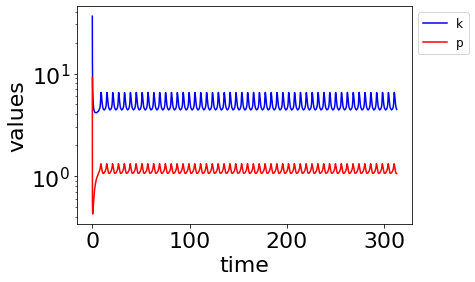

$\rho_{tot}$ $(\mu$M$)$ = 9.214285714285714


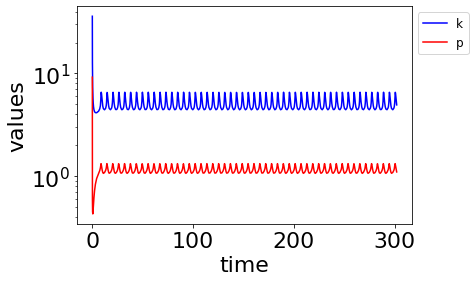

$\rho_{tot}$ $(\mu$M$)$ = 9.23469387755102


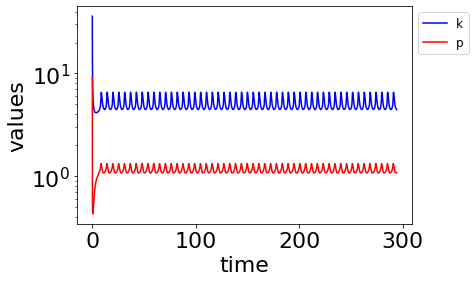

$\rho_{tot}$ $(\mu$M$)$ = 9.255102040816327


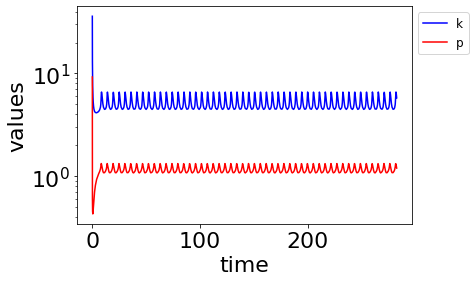

$\rho_{tot}$ $(\mu$M$)$ = 9.275510204081632


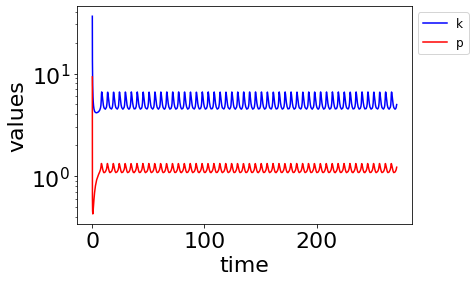

$\rho_{tot}$ $(\mu$M$)$ = 9.295918367346939


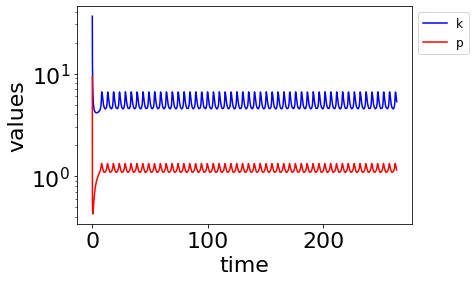

$\rho_{tot}$ $(\mu$M$)$ = 9.316326530612244


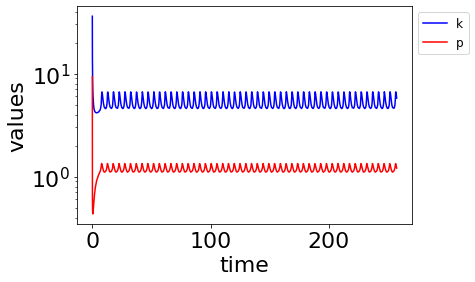

$\rho_{tot}$ $(\mu$M$)$ = 9.33673469387755


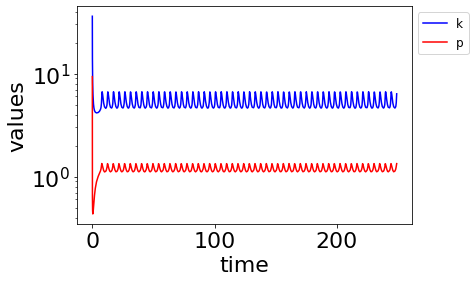

$\rho_{tot}$ $(\mu$M$)$ = 9.357142857142858


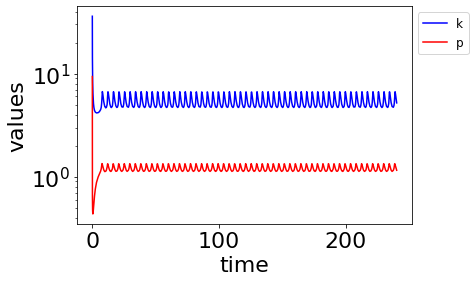

$\rho_{tot}$ $(\mu$M$)$ = 9.377551020408163


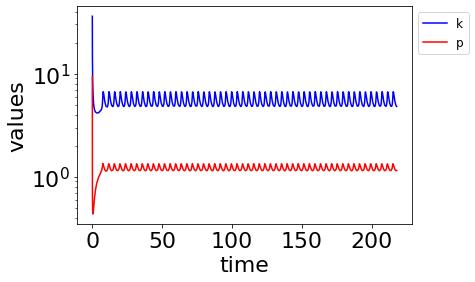

$\rho_{tot}$ $(\mu$M$)$ = 9.39795918367347


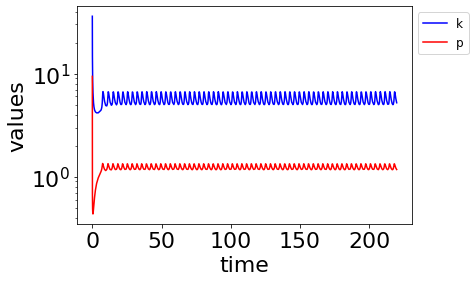

$\rho_{tot}$ $(\mu$M$)$ = 9.418367346938776


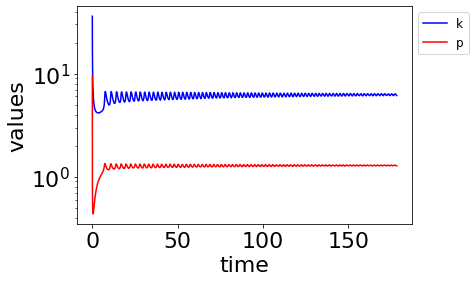

$\rho_{tot}$ $(\mu$M$)$ = 9.438775510204081


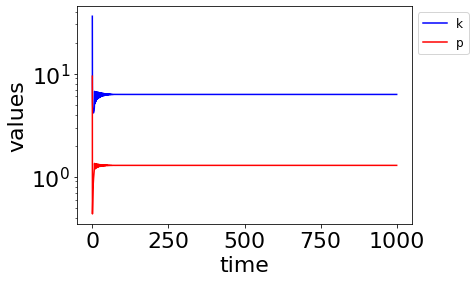

$\rho_{tot}$ $(\mu$M$)$ = 9.459183673469388


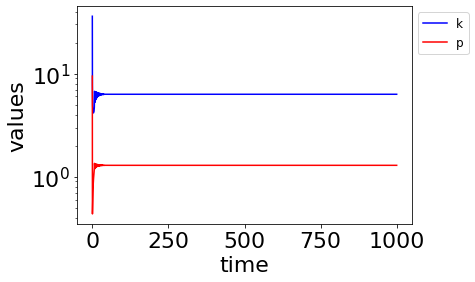

$\rho_{tot}$ $(\mu$M$)$ = 9.479591836734693


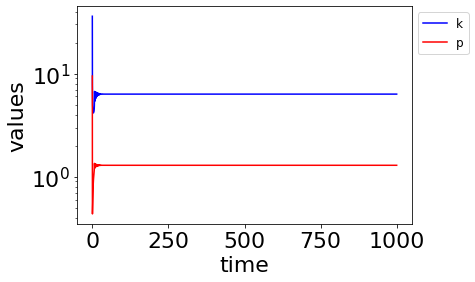

$\rho_{tot}$ $(\mu$M$)$ = 9.5


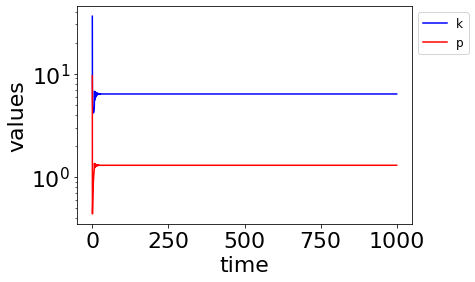

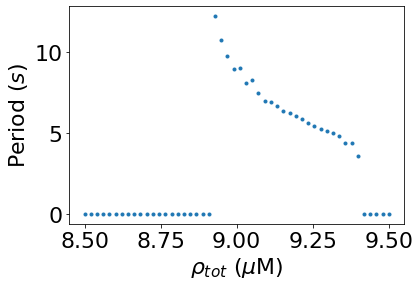

In [13]:
ptots = np.linspace(8.5, 9.5, 50)
period_fxn_ptots = robustness(6, ptots, False)

$\tilde{P}$ $(\mu$M$)$ = 0.04


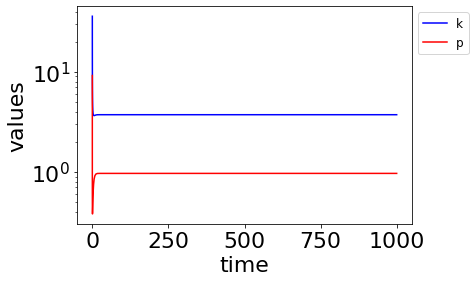

$\tilde{P}$ $(\mu$M$)$ = 0.04081632653061225


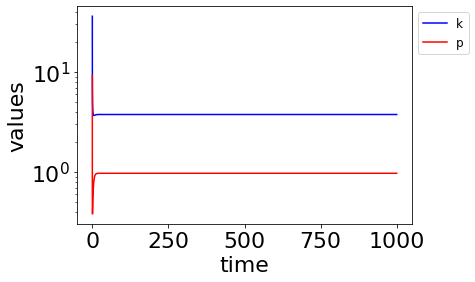

$\tilde{P}$ $(\mu$M$)$ = 0.04163265306122449


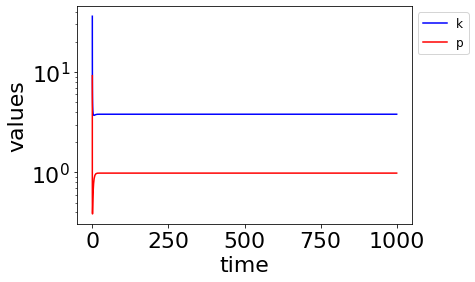

$\tilde{P}$ $(\mu$M$)$ = 0.04244897959183674


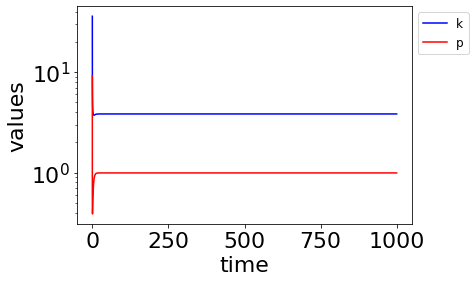

$\tilde{P}$ $(\mu$M$)$ = 0.04326530612244898


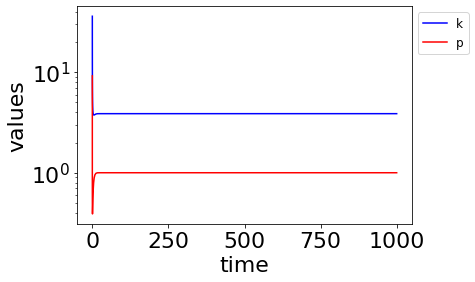

$\tilde{P}$ $(\mu$M$)$ = 0.044081632653061226


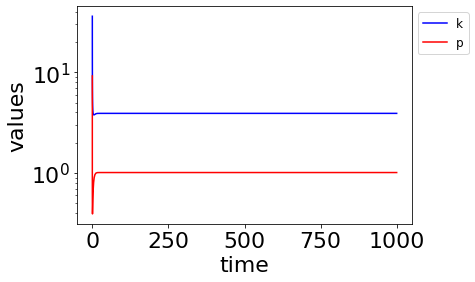

$\tilde{P}$ $(\mu$M$)$ = 0.044897959183673466


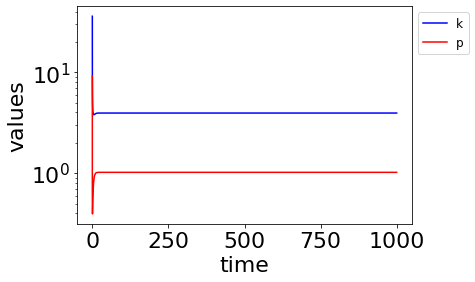

$\tilde{P}$ $(\mu$M$)$ = 0.045714285714285714


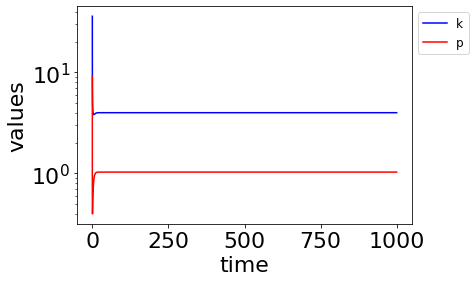

$\tilde{P}$ $(\mu$M$)$ = 0.04653061224489796


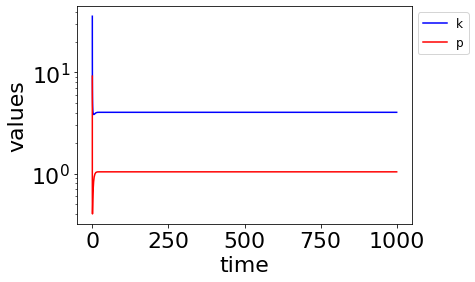

$\tilde{P}$ $(\mu$M$)$ = 0.0473469387755102


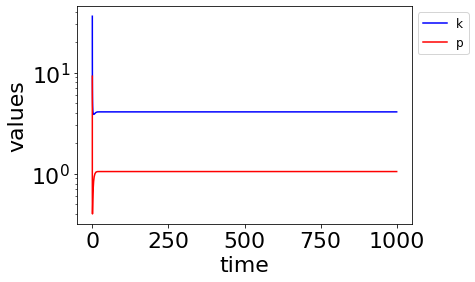

$\tilde{P}$ $(\mu$M$)$ = 0.04816326530612245


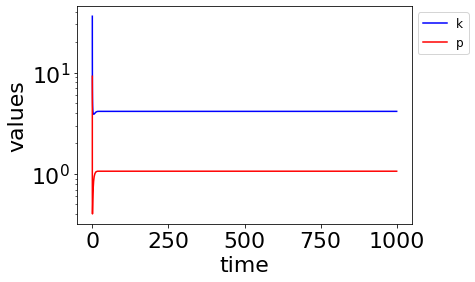

$\tilde{P}$ $(\mu$M$)$ = 0.0489795918367347


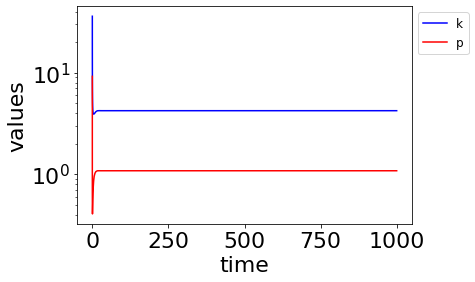

$\tilde{P}$ $(\mu$M$)$ = 0.04979591836734694


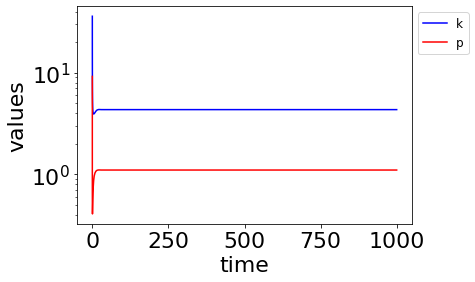

$\tilde{P}$ $(\mu$M$)$ = 0.05061224489795919


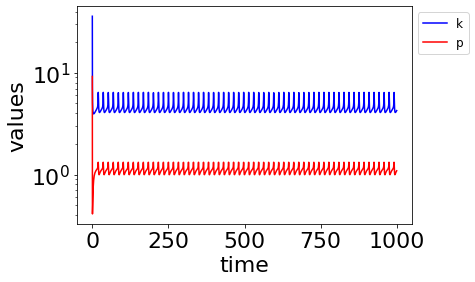

$\tilde{P}$ $(\mu$M$)$ = 0.05142857142857143


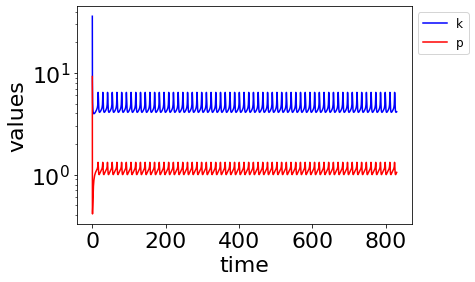

$\tilde{P}$ $(\mu$M$)$ = 0.052244897959183675


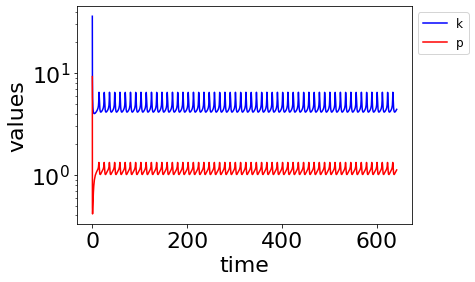

$\tilde{P}$ $(\mu$M$)$ = 0.053061224489795916


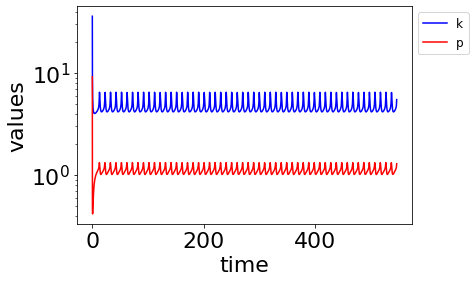

$\tilde{P}$ $(\mu$M$)$ = 0.053877551020408164


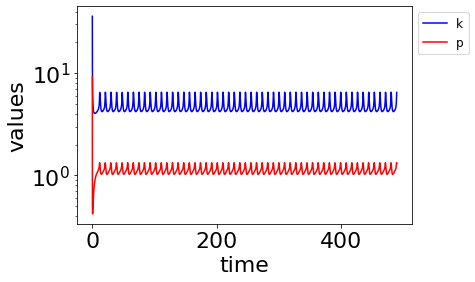

$\tilde{P}$ $(\mu$M$)$ = 0.05469387755102041


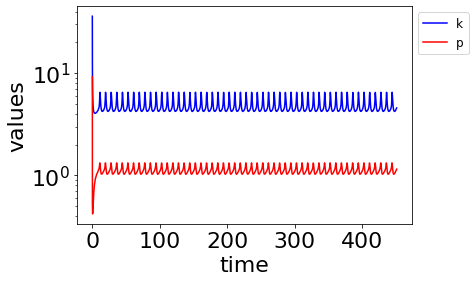

$\tilde{P}$ $(\mu$M$)$ = 0.05551020408163265


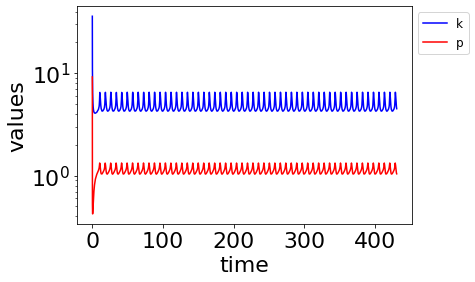

$\tilde{P}$ $(\mu$M$)$ = 0.0563265306122449


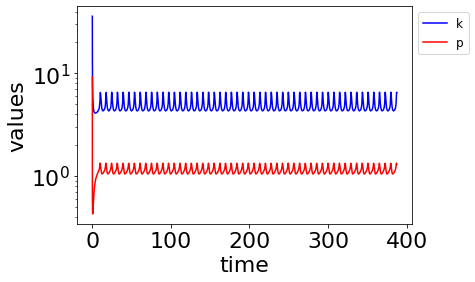

$\tilde{P}$ $(\mu$M$)$ = 0.05714285714285715


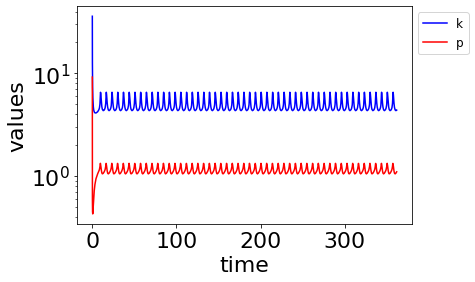

$\tilde{P}$ $(\mu$M$)$ = 0.05795918367346939


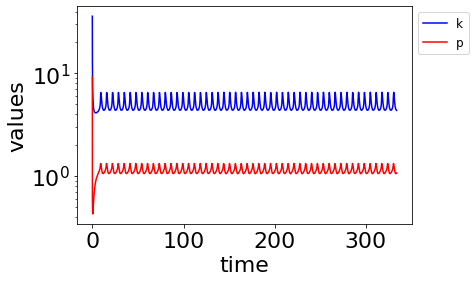

$\tilde{P}$ $(\mu$M$)$ = 0.05877551020408163


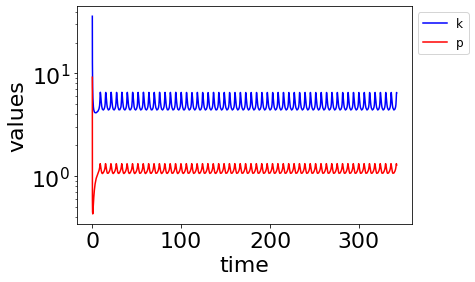

$\tilde{P}$ $(\mu$M$)$ = 0.05959183673469388


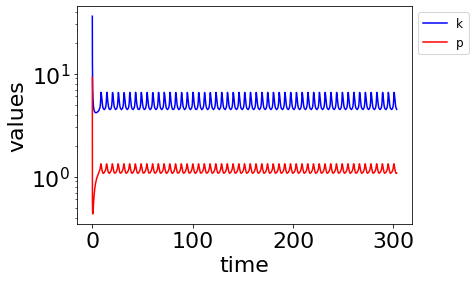

$\tilde{P}$ $(\mu$M$)$ = 0.060408163265306125


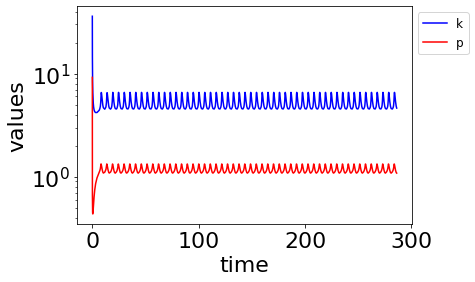

$\tilde{P}$ $(\mu$M$)$ = 0.061224489795918366


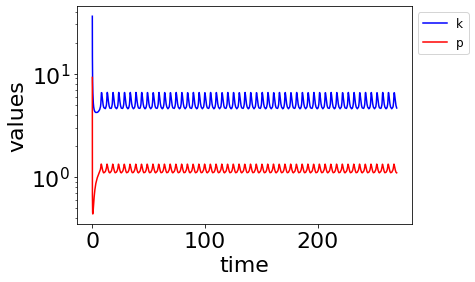

$\tilde{P}$ $(\mu$M$)$ = 0.062040816326530614


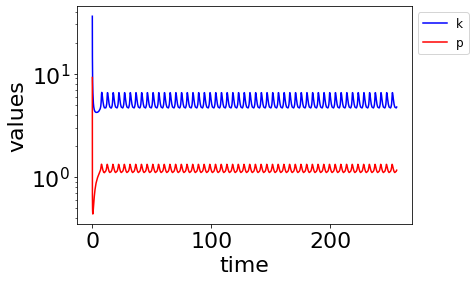

$\tilde{P}$ $(\mu$M$)$ = 0.06285714285714286


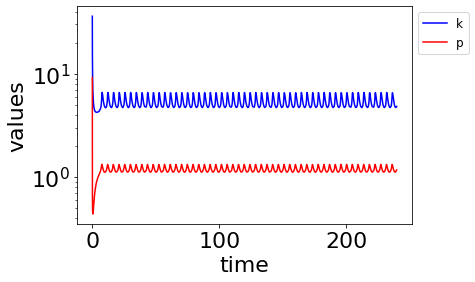

$\tilde{P}$ $(\mu$M$)$ = 0.0636734693877551


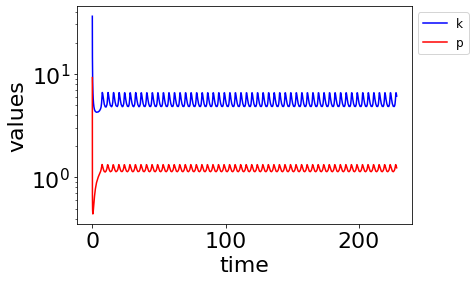

$\tilde{P}$ $(\mu$M$)$ = 0.06448979591836734


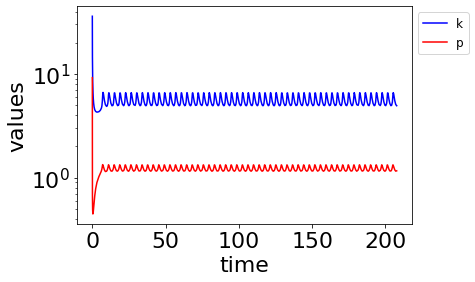

$\tilde{P}$ $(\mu$M$)$ = 0.0653061224489796


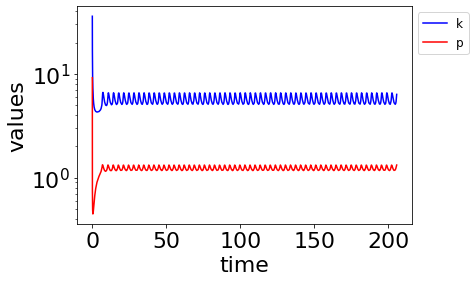

$\tilde{P}$ $(\mu$M$)$ = 0.06612244897959184


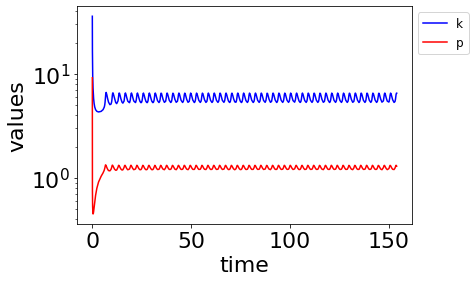

$\tilde{P}$ $(\mu$M$)$ = 0.06693877551020408


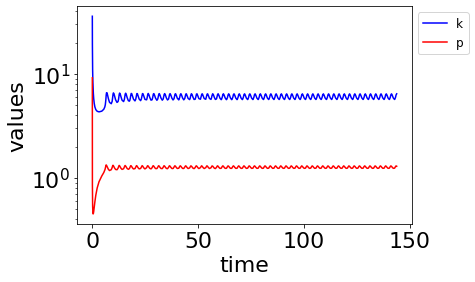

$\tilde{P}$ $(\mu$M$)$ = 0.06775510204081633


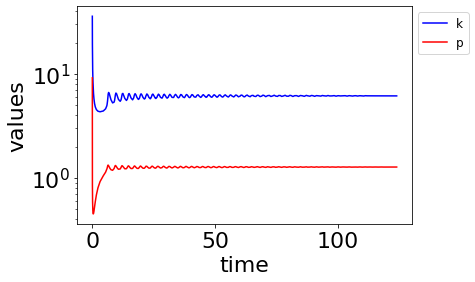

$\tilde{P}$ $(\mu$M$)$ = 0.06857142857142857


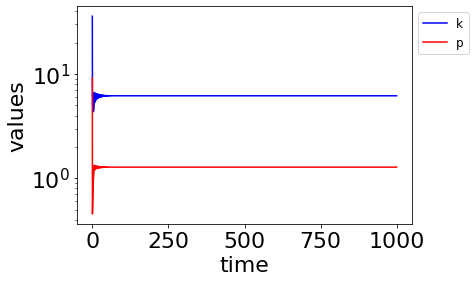

$\tilde{P}$ $(\mu$M$)$ = 0.06938775510204082


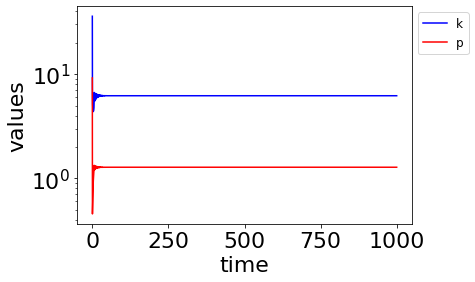

$\tilde{P}$ $(\mu$M$)$ = 0.07020408163265307


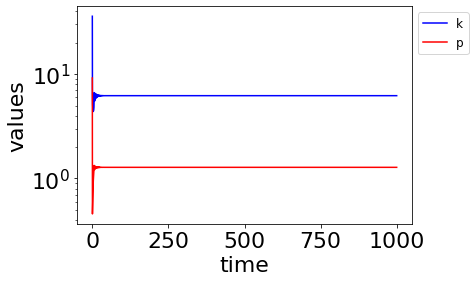

$\tilde{P}$ $(\mu$M$)$ = 0.07102040816326531


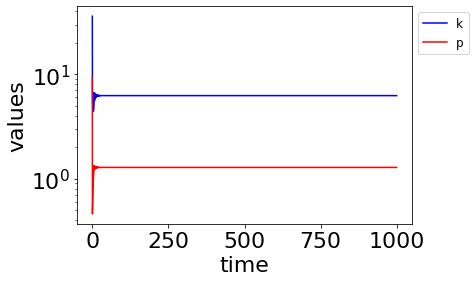

$\tilde{P}$ $(\mu$M$)$ = 0.07183673469387755


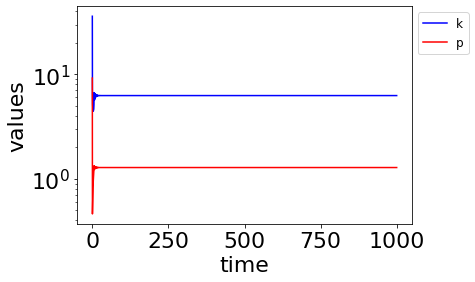

$\tilde{P}$ $(\mu$M$)$ = 0.0726530612244898


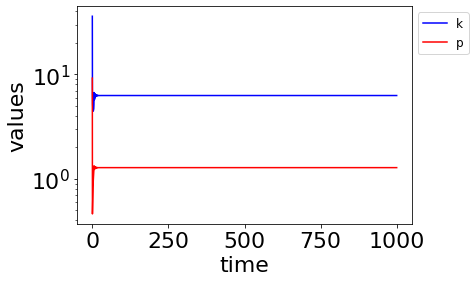

$\tilde{P}$ $(\mu$M$)$ = 0.07346938775510203


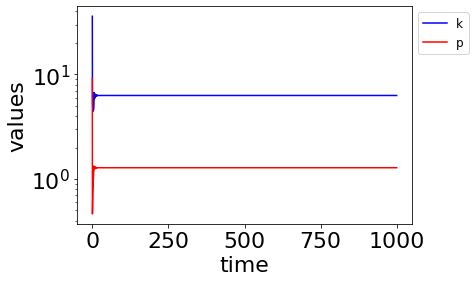

$\tilde{P}$ $(\mu$M$)$ = 0.07428571428571429


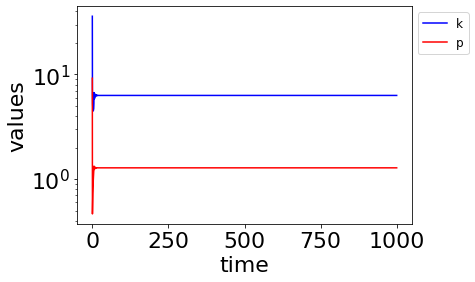

$\tilde{P}$ $(\mu$M$)$ = 0.07510204081632654


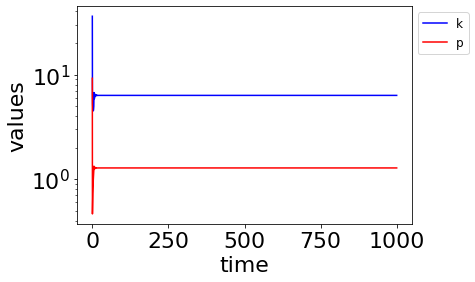

$\tilde{P}$ $(\mu$M$)$ = 0.07591836734693877


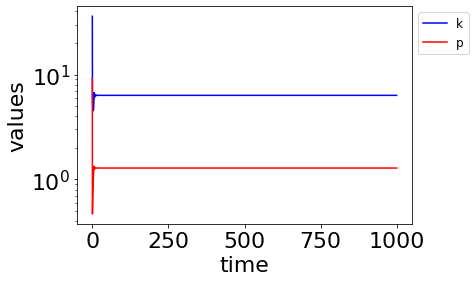

$\tilde{P}$ $(\mu$M$)$ = 0.07673469387755102


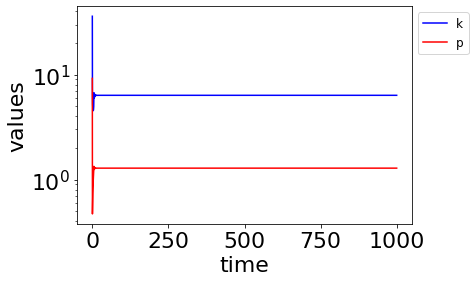

$\tilde{P}$ $(\mu$M$)$ = 0.07755102040816327


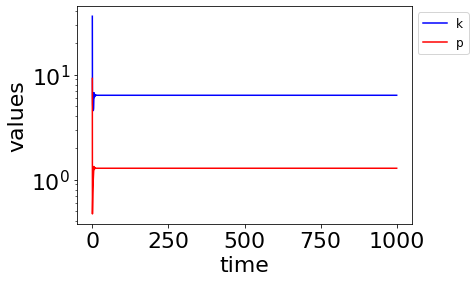

$\tilde{P}$ $(\mu$M$)$ = 0.0783673469387755


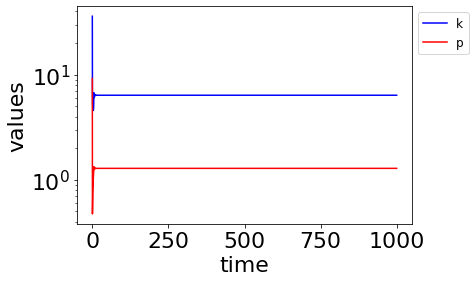

$\tilde{P}$ $(\mu$M$)$ = 0.07918367346938776


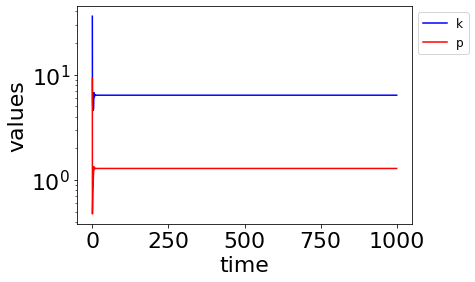

$\tilde{P}$ $(\mu$M$)$ = 0.08


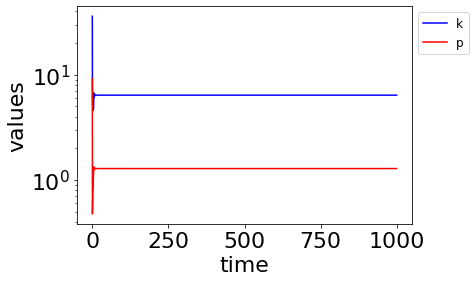

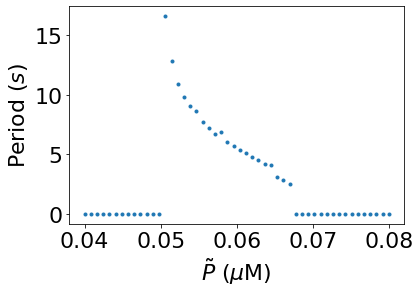

In [14]:
ptildes = np.linspace(0.04, 0.08, 50)
period_fxn_ptildes = robustness(7, ptildes, False)

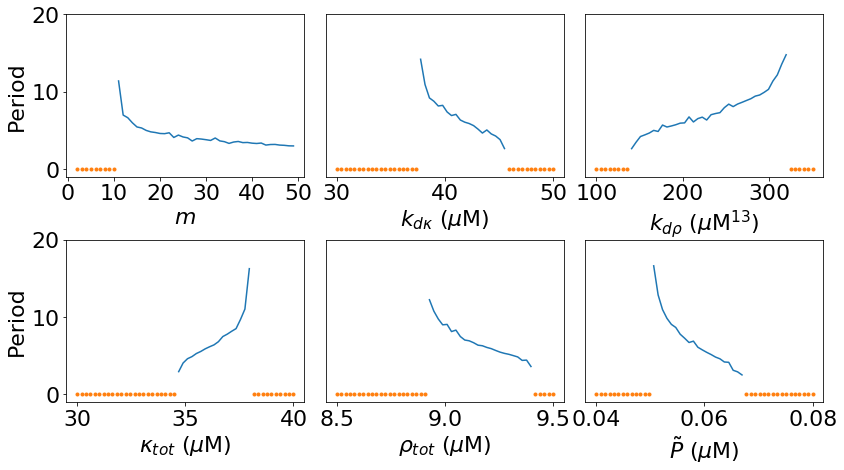

In [15]:
fig, axs = plt.subplots(2,3, figsize=(12,7))

ms = np.array(ms)
axs[0, 0].plot(ms[period_fxn_m > 0], period_fxn_m[period_fxn_m>0])
axs[0, 0].plot(ms[period_fxn_m == 0], period_fxn_m[period_fxn_m == 0], '.')
axs[0, 0].set_xlabel(r'$m$')
axs[0, 0].set_ylabel(r'Period')
axs[0, 0].set_xticks([0, 10, 20, 30, 40, 50])
axs[0, 0].set_ylim([-1,20])

axs[0, 1].plot(kdks[period_fxn_kdks>0], period_fxn_kdks[period_fxn_kdks>0])
axs[0, 1].plot(kdks[period_fxn_kdks ==0], period_fxn_kdks[period_fxn_kdks==0], '.')
axs[0, 1].set_xlabel(var_list[3])
# axs[0, 2].set_xticks([1e-4, 1e-3, 1e-2])
axs[0, 1].set_ylim([-1,20])
axs[0, 1].set_yticks([])

axs[0, 2].plot(kdps[period_fxn_kdps > 0], period_fxn_kdps[period_fxn_kdps > 0])
axs[0, 2].plot(kdps[period_fxn_kdps == 0], period_fxn_kdps[period_fxn_kdps == 0], '.')
axs[0, 2].set_xlabel(var_list[4])
axs[0, 2].set_ylim([-1,20])
axs[0, 2].set_yticks([])

axs[1, 0].plot(ktots[period_fxn_ktots>0], period_fxn_ktots[period_fxn_ktots>0])
axs[1, 0].plot(ktots[period_fxn_ktots==0], period_fxn_ktots[period_fxn_ktots==0], '.')
axs[1, 0].set_xlabel(var_list[5])
axs[1, 0].set_ylabel('Period')
# axs[1, 0].set_xticks([0, 0.001, 0.002])
# axs[1, 0].set_xticklabels(['0', r'$10^{-3}$', '2e-3'])
# plt.ticklabel_format(style='sci', axis='x', scilimits=(-5,-5))
axs[1, 0].set_ylim([-1,20])

axs[1, 1].plot(ptots[period_fxn_ptots>0], period_fxn_ptots[period_fxn_ptots>0])
axs[1, 1].plot(ptots[period_fxn_ptots==0], period_fxn_ptots[period_fxn_ptots==0], '.')
axs[1, 1].set_xlabel(var_list[6])
# axs[1, 1].set_xticks([0, 0.005, 0.01, 0.015])
# axs[1, 1].set_xticklabels(['0', '5e-3', '1e-2', '1.5e-2'])
axs[1, 1].set_ylim([-1,20])
axs[1, 1].set_yticks([])

axs[1, 2].plot(ptildes[period_fxn_ptildes>0], period_fxn_ptildes[period_fxn_ptildes>0])
axs[1, 2].plot(ptildes[period_fxn_ptildes==0], period_fxn_ptildes[period_fxn_ptildes==0], '.')
axs[1, 2].set_xlabel(var_list[7])
# axs[1, 2].set_xticks([1e-12, 1e-9, 1e-6])
axs[1, 2].set_ylim([-1,20])
axs[1, 2].set_yticks([])

# axs[1, 3].plot(etas[period_fxn_eta>0], period_fxn_eta[period_fxn_eta>0])
# axs[1, 3].plot(etas[period_fxn_eta==0], period_fxn_eta[period_fxn_eta==0],'.')
# axs[1, 3].set_xlabel(var_list[6])
# axs[1, 3].set_xscale('log')
# axs[1, 3].set_xticks([1e-1, 1e0, 1e1])
# axs[1, 3].set_ylim([-100, 5000])
# axs[1, 3].set_yticks([])

plt.tight_layout(h_pad=0, w_pad=0.2)
# plt.savefig('robustness_bounded_opposite_limit.png', 
#             dpi=800, bbox_inches='tight')
# plt.savefig('robustness_bounded_opposite_limit_small.png', 
#             bbox_inches='tight')
plt.show()

In [25]:
var_list = [r'$n$', r'$m$', r'$\eta_\kappa = \eta_\rho$', 
            r'$k_{d\kappa}$ $(\mu$M$)$', r'$k_{d\rho}$ $(\mu$M$^9)$', 
            r'$\kappa_{tot}$ $(\mu$M$)$', r'$\rho_{tot}$ $(\mu$M$)$', r'$\tilde{P}$ $(\mu$M$)$']

def robustness2(var_index, var_arr, logscale=False):    
    period_arr = np.zeros(len(var_arr))
    period = 0  # to initialize
    
    for e, var in enumerate(var_arr):
#         params = [2, 14, 1.1, 42, 200, 36, 9.2, 0.059]
        params = [2, 10, 1.11, 21.6, 3.89e-5, 50.5, 3.75, 0.0292]
        params[var_index] = var            
        n, m, eta, kdk, kdp, ktot, ptot, ptilde = params
        
        print(var_list[var_index] + ' = ' + str(var))
        
        initialConditions = [ktot, ptot]        
        if period == 0:
            tmax = 1000 #maximum time we'll integrate to
        else:
            tmax = period * 50
        tSpan = [0,tmax] #np.linspace(0,tmax,numTimePoints)

        toPlot = True

        z,t = bounded_self_assembly_opposite_sep_of_timescales_limit_sol(
            tSpan, params, initialConditions, toPlot, True)
        k = z[:,0]
        p = z[:,1]

        dpdt = (p[1:] - p[0:-1])/(t[1:]-t[0:-1])

        groups = []
        uniquekeys = []
        counter = 0
        prevCounter = 0
        prevPrevCounter = 0
        prevCounterArray = []
        xChange = [] #how much does the value of Ao change in between each inflection point?
        for k, g in groupby(np.sign(dpdt)):
            groups.append(list(g))
            c = len(uniquekeys) #counter that just increases by one in each for loop
            xChange.append(np.sum(dpdt[counter:counter+len(groups[c])]*
                                  (t[counter+1:counter+len(groups[c])+1]-t[counter:counter+len(groups[c])])))
            prevPrevPrevCounter = prevPrevCounter
            prevPrevCounter = prevCounter
            prevCounter = counter
            counter += len(groups[c])
            uniquekeys.append(k)

            prevCounterArray += [t[counter]]
        nIP = len(uniquekeys)

        if (nIP > 10 and min(np.abs(xChange[:-1] / xChange[5])) > 0.5 and 
            t[-3]/t[-2] > 0.95 and abs((abs(xChange[3*len(xChange)//4]) - abs(xChange[-2]))/xChange[-2]) < 1 and 
            not (z<-10000).any()):
            period = prevCounterArray[-4] - prevCounterArray[-6]
        else:
            period = 0
    #     print('period = ' + str(period))
        period_arr[e] = period
        
    plt.figure()
    plt.plot(var_arr, period_arr, '.')
    plt.xlabel(var_list[var_index])
    plt.ylabel(r'Period $(s)$')
    if logscale:
        plt.xscale('log')
    plt.show()
    
    return(period_arr)

$m$ = 2


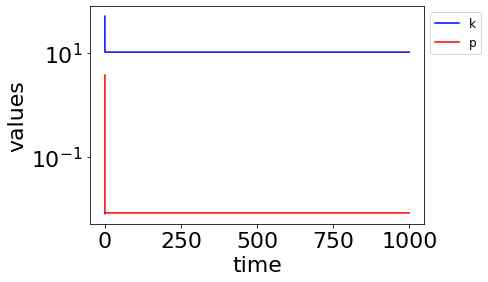

$m$ = 3


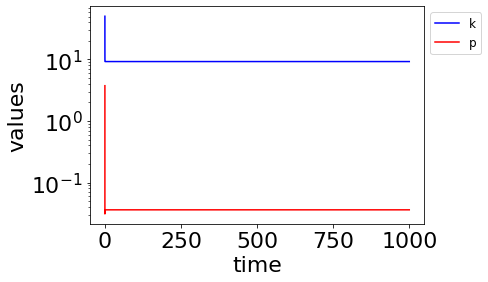

$m$ = 4


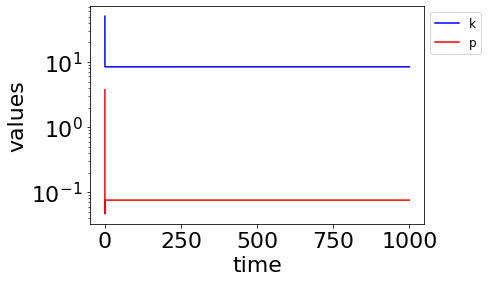

$m$ = 5


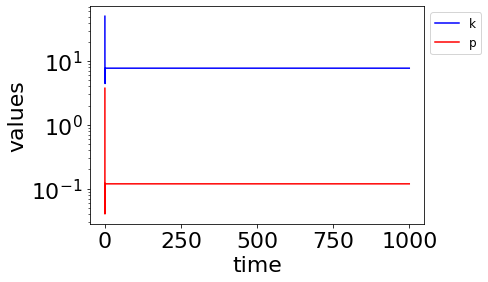

$m$ = 6


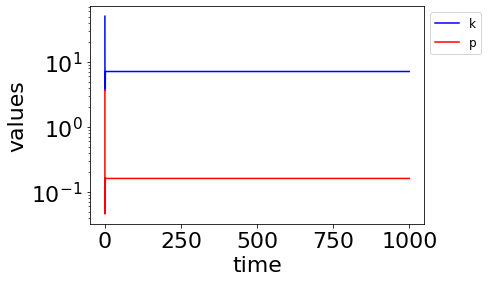

$m$ = 7


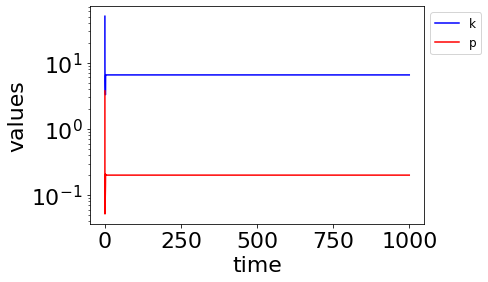

$m$ = 8


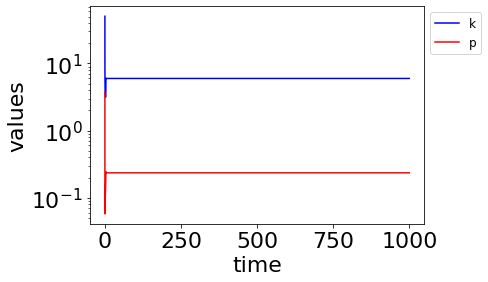

$m$ = 9


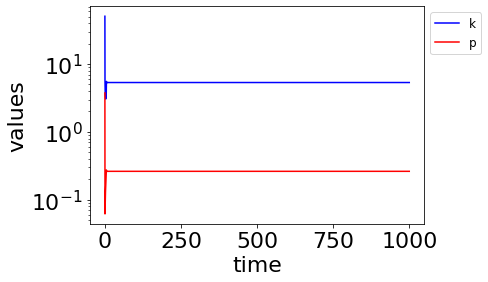

$m$ = 10


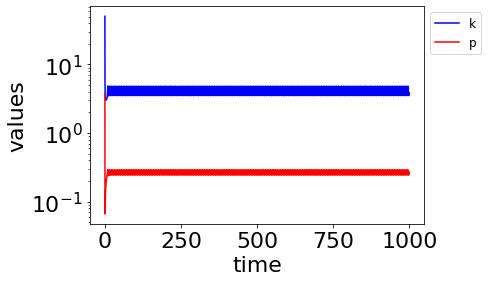

$m$ = 11


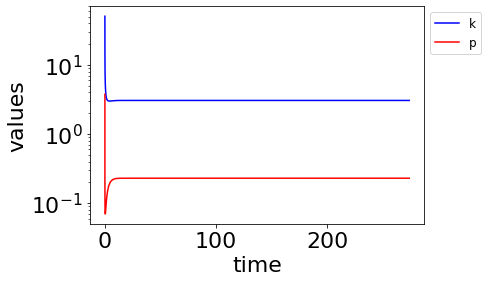

$m$ = 12


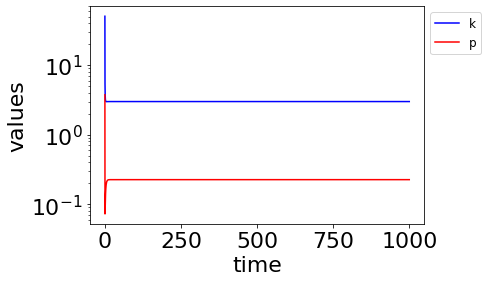

$m$ = 13


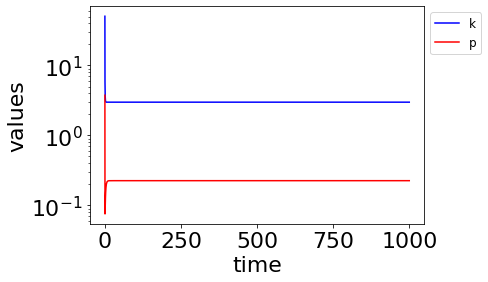

$m$ = 14


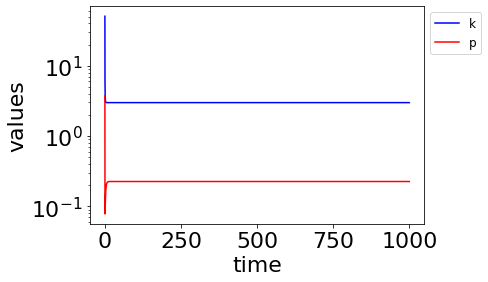

$m$ = 15


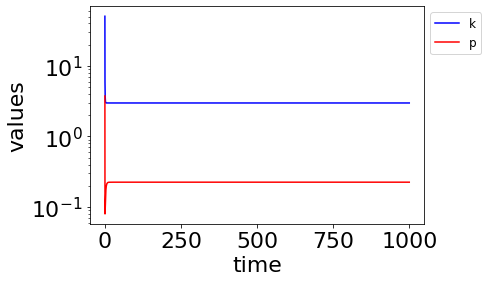

$m$ = 16


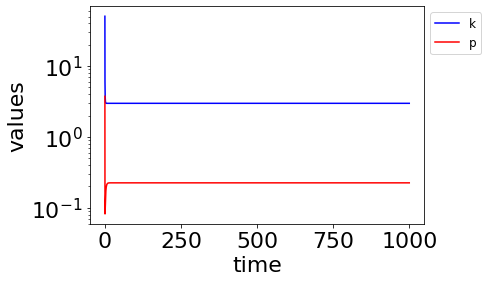

$m$ = 17


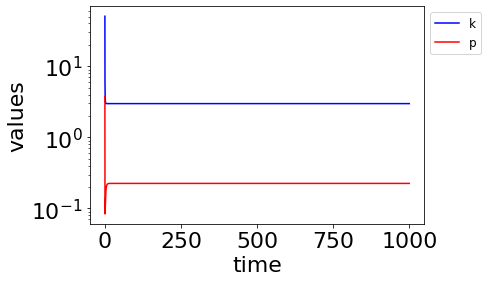

$m$ = 18


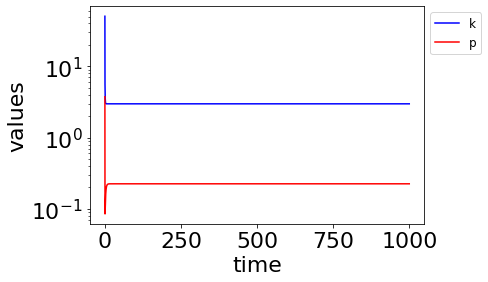

$m$ = 19


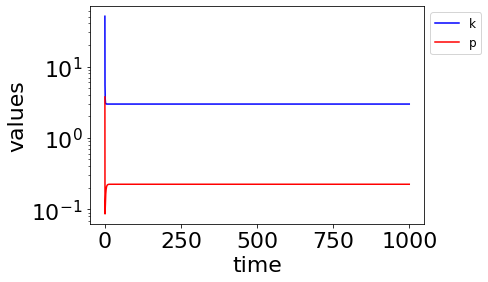

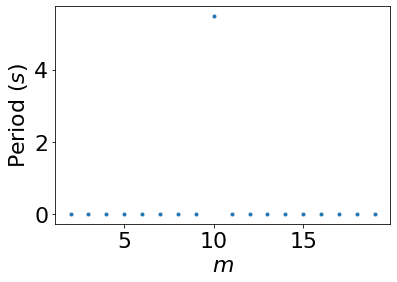

In [26]:
ms2 = range(2, 20)
ms2 = np.array(ms2)
period_fxn_m2 = robustness2(1, ms2, False)

In [27]:
num_points = 20

$k_{d\kappa}$ $(\mu$M$)$ = 18.0


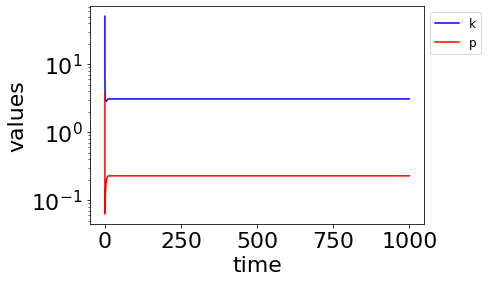

$k_{d\kappa}$ $(\mu$M$)$ = 18.36842105263158


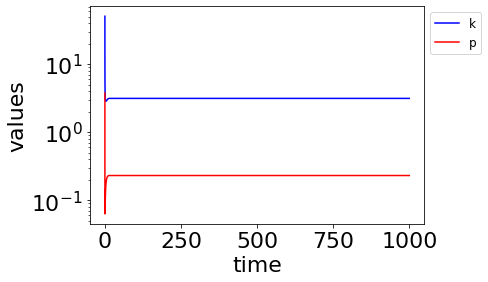

$k_{d\kappa}$ $(\mu$M$)$ = 18.736842105263158


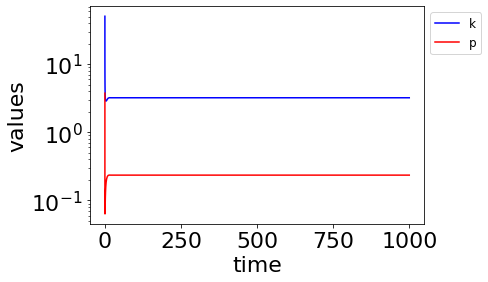

$k_{d\kappa}$ $(\mu$M$)$ = 19.105263157894736


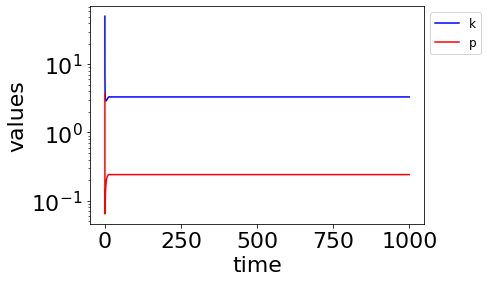

$k_{d\kappa}$ $(\mu$M$)$ = 19.473684210526315


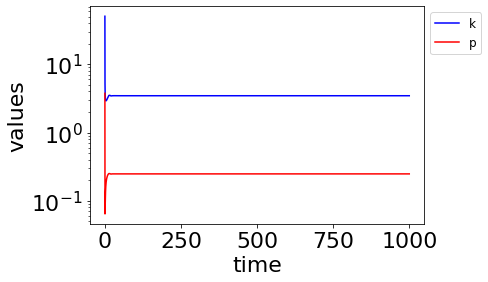

$k_{d\kappa}$ $(\mu$M$)$ = 19.842105263157894


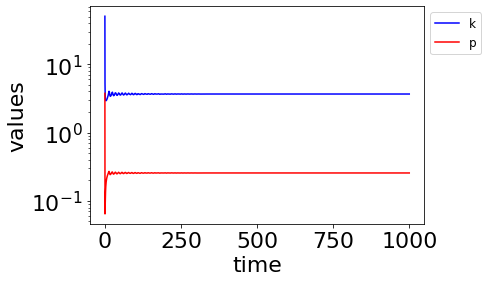

$k_{d\kappa}$ $(\mu$M$)$ = 20.210526315789473


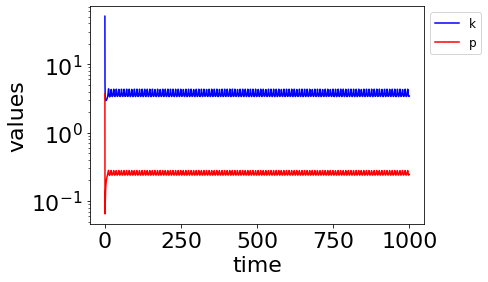

$k_{d\kappa}$ $(\mu$M$)$ = 20.57894736842105


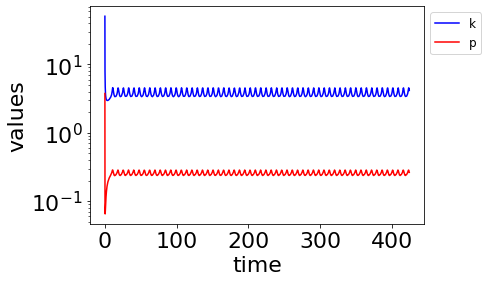

$k_{d\kappa}$ $(\mu$M$)$ = 20.94736842105263


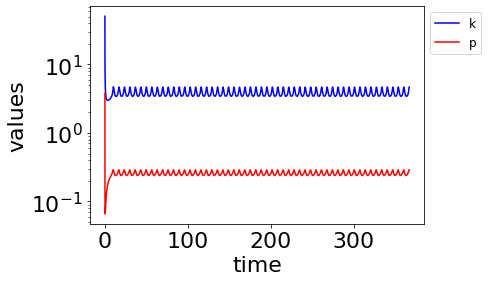

$k_{d\kappa}$ $(\mu$M$)$ = 21.31578947368421


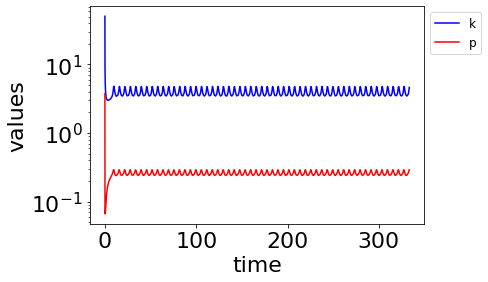

$k_{d\kappa}$ $(\mu$M$)$ = 21.684210526315788


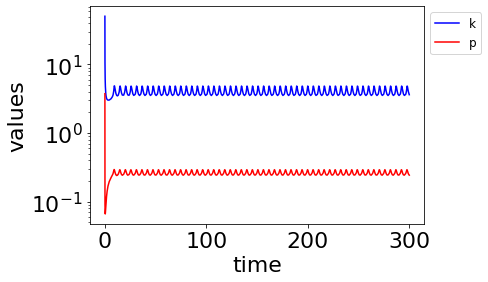

$k_{d\kappa}$ $(\mu$M$)$ = 22.05263157894737


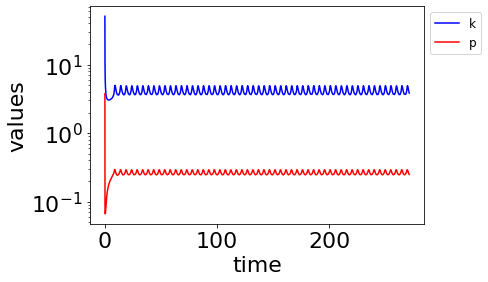

$k_{d\kappa}$ $(\mu$M$)$ = 22.421052631578945


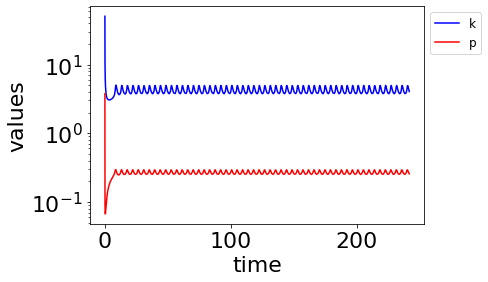

$k_{d\kappa}$ $(\mu$M$)$ = 22.789473684210527


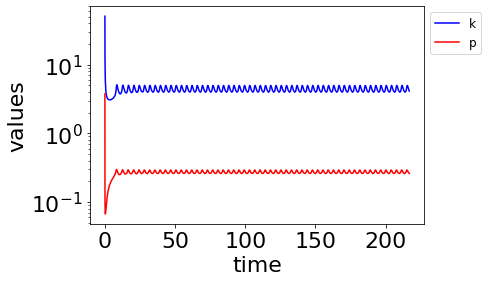

$k_{d\kappa}$ $(\mu$M$)$ = 23.157894736842106


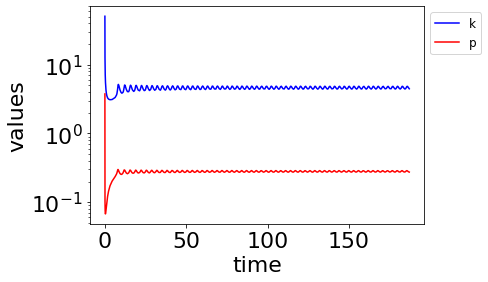

$k_{d\kappa}$ $(\mu$M$)$ = 23.526315789473685


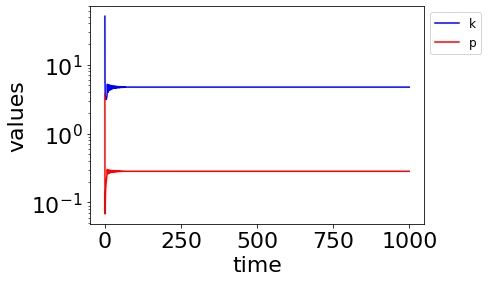

$k_{d\kappa}$ $(\mu$M$)$ = 23.894736842105264


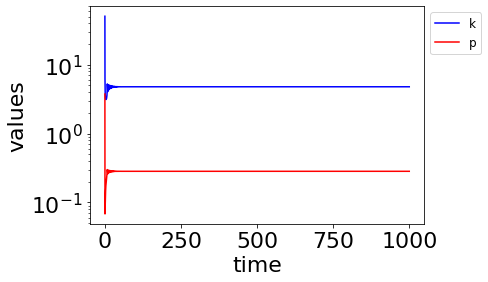

$k_{d\kappa}$ $(\mu$M$)$ = 24.263157894736842


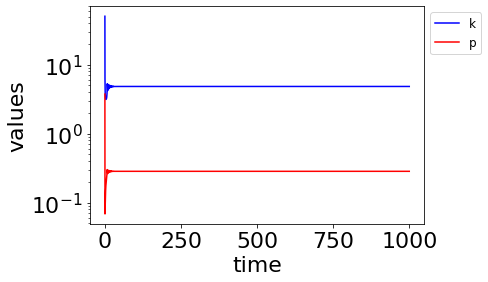

$k_{d\kappa}$ $(\mu$M$)$ = 24.63157894736842


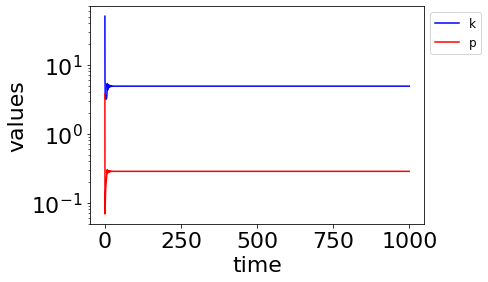

$k_{d\kappa}$ $(\mu$M$)$ = 25.0


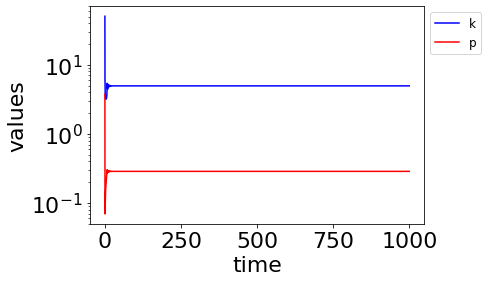

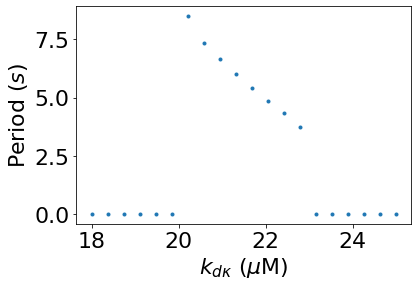

In [28]:
kdks2 = np.linspace(18, 25, num_points)
period_fxn_kdks2 = robustness2(3, kdks2, False)

$k_{d\rho}$ $(\mu$M$^9)$ = 2e-05


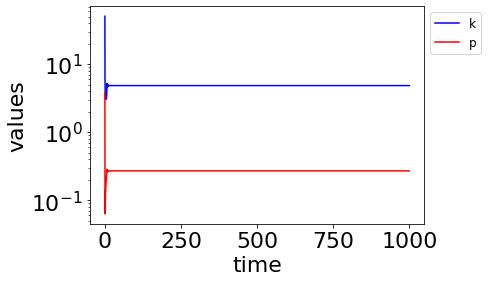

$k_{d\rho}$ $(\mu$M$^9)$ = 2.210526315789474e-05


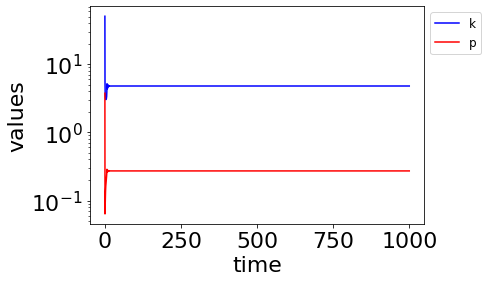

$k_{d\rho}$ $(\mu$M$^9)$ = 2.4210526315789474e-05


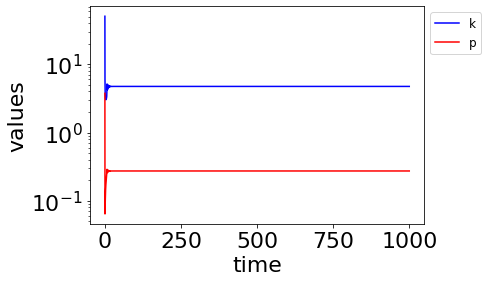

$k_{d\rho}$ $(\mu$M$^9)$ = 2.6315789473684212e-05


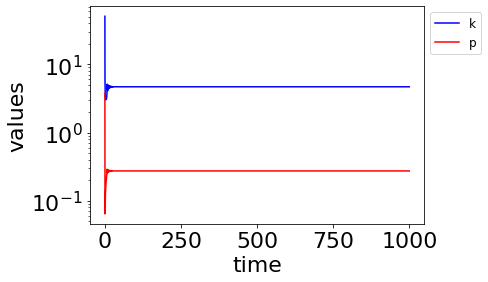

$k_{d\rho}$ $(\mu$M$^9)$ = 2.842105263157895e-05


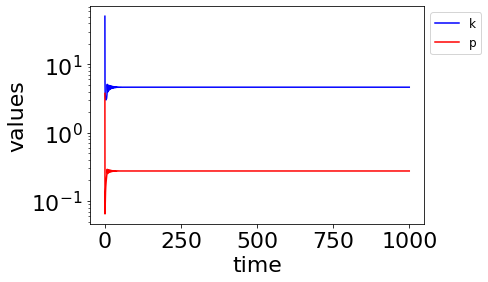

$k_{d\rho}$ $(\mu$M$^9)$ = 3.0526315789473684e-05


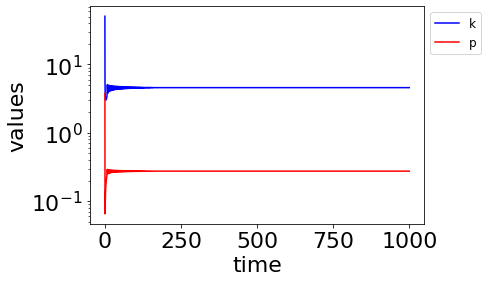

$k_{d\rho}$ $(\mu$M$^9)$ = 3.263157894736842e-05


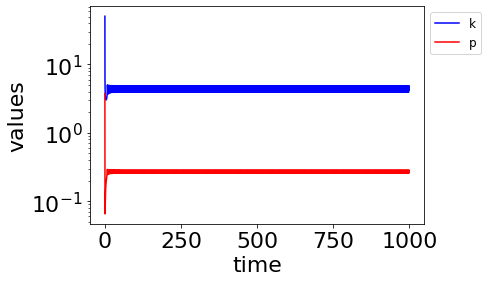

$k_{d\rho}$ $(\mu$M$^9)$ = 3.473684210526316e-05


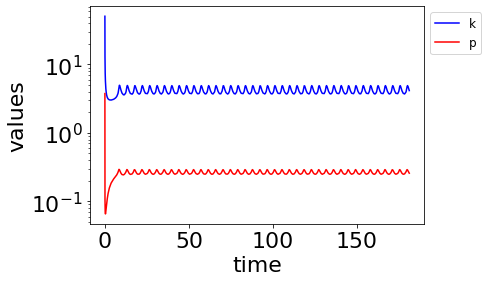

$k_{d\rho}$ $(\mu$M$^9)$ = 3.6842105263157895e-05


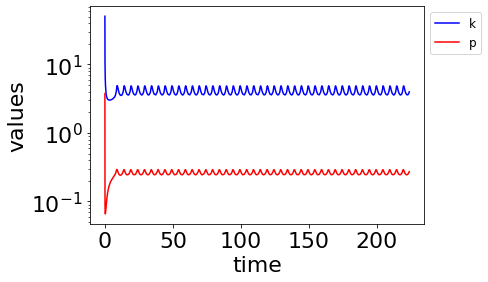

$k_{d\rho}$ $(\mu$M$^9)$ = 3.8947368421052636e-05


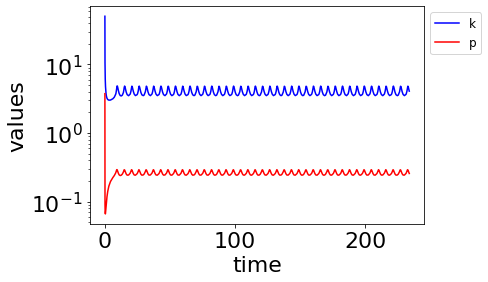

$k_{d\rho}$ $(\mu$M$^9)$ = 4.105263157894737e-05


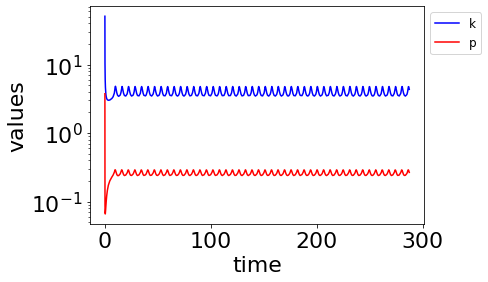

$k_{d\rho}$ $(\mu$M$^9)$ = 4.3157894736842105e-05


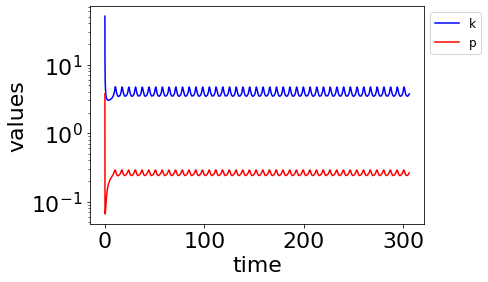

$k_{d\rho}$ $(\mu$M$^9)$ = 4.526315789473684e-05


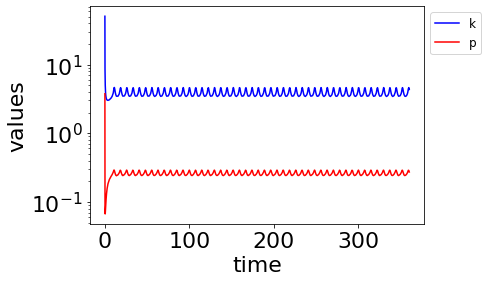

$k_{d\rho}$ $(\mu$M$^9)$ = 4.7368421052631574e-05


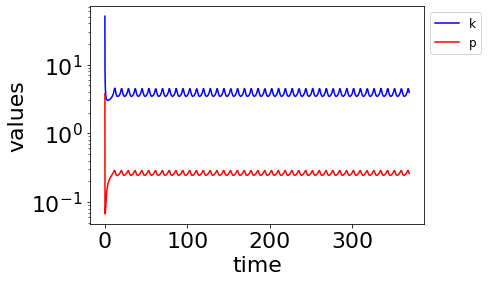

$k_{d\rho}$ $(\mu$M$^9)$ = 4.9473684210526315e-05


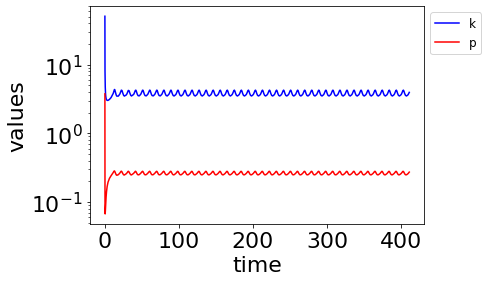

$k_{d\rho}$ $(\mu$M$^9)$ = 5.157894736842106e-05


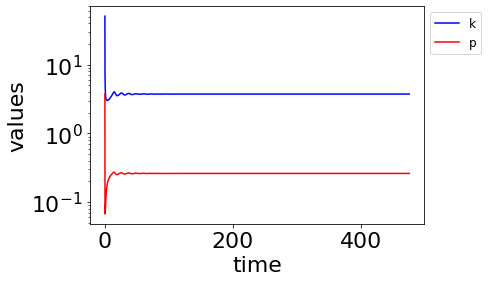

$k_{d\rho}$ $(\mu$M$^9)$ = 5.368421052631579e-05


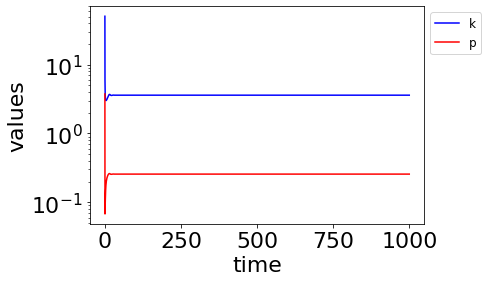

$k_{d\rho}$ $(\mu$M$^9)$ = 5.5789473684210526e-05


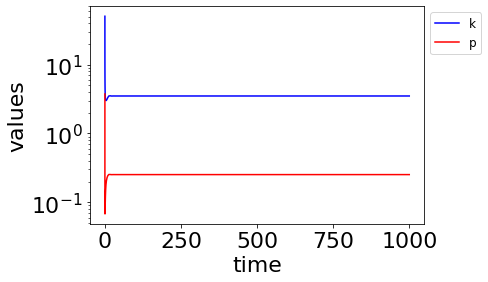

$k_{d\rho}$ $(\mu$M$^9)$ = 5.789473684210526e-05


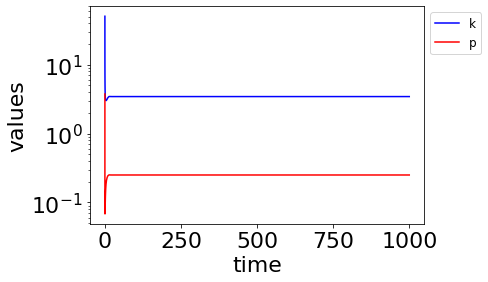

$k_{d\rho}$ $(\mu$M$^9)$ = 6e-05


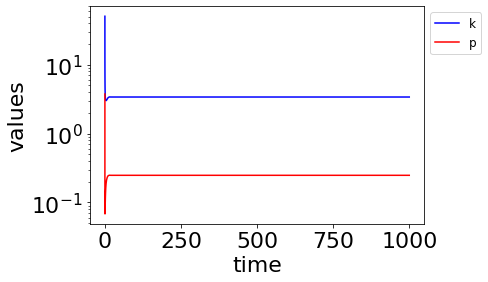

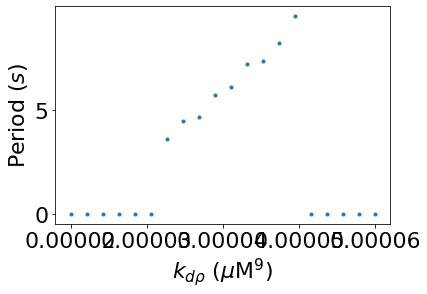

In [29]:
kdps2 = np.linspace(2e-5, 6e-5, num_points)
period_fxn_kdps2 = robustness2(4, kdps2, False)

$\kappa_{tot}$ $(\mu$M$)$ = 45.0


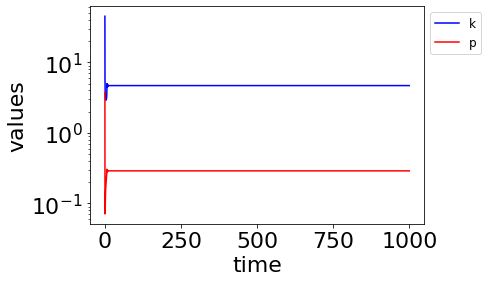

$\kappa_{tot}$ $(\mu$M$)$ = 45.526315789473685


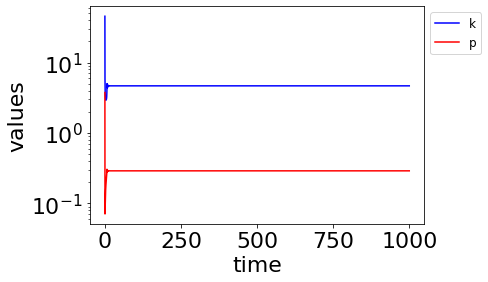

$\kappa_{tot}$ $(\mu$M$)$ = 46.05263157894737


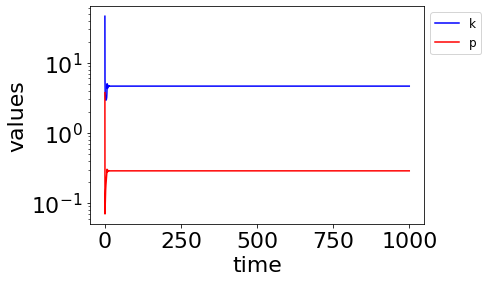

$\kappa_{tot}$ $(\mu$M$)$ = 46.578947368421055


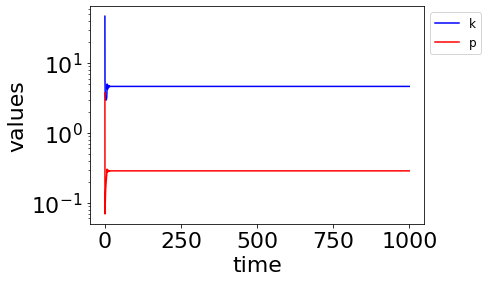

$\kappa_{tot}$ $(\mu$M$)$ = 47.10526315789474


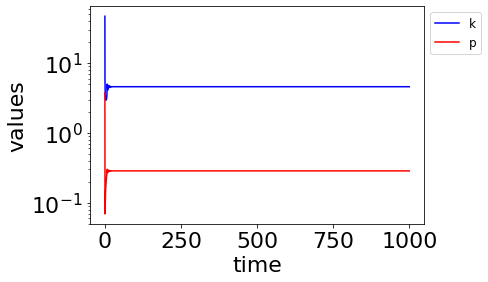

$\kappa_{tot}$ $(\mu$M$)$ = 47.63157894736842


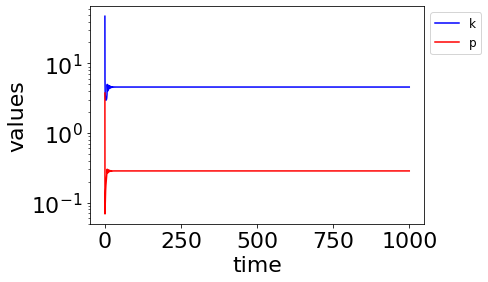

$\kappa_{tot}$ $(\mu$M$)$ = 48.1578947368421


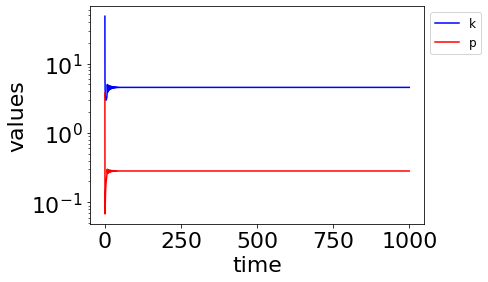

$\kappa_{tot}$ $(\mu$M$)$ = 48.68421052631579


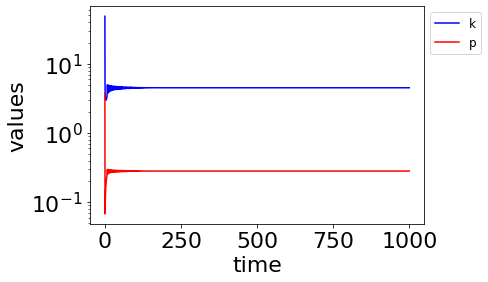

$\kappa_{tot}$ $(\mu$M$)$ = 49.21052631578947


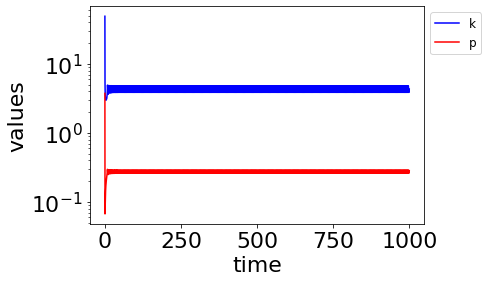

$\kappa_{tot}$ $(\mu$M$)$ = 49.73684210526316


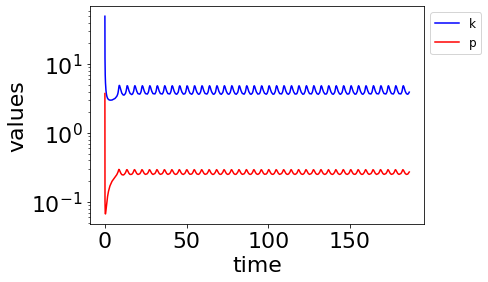

$\kappa_{tot}$ $(\mu$M$)$ = 50.26315789473684


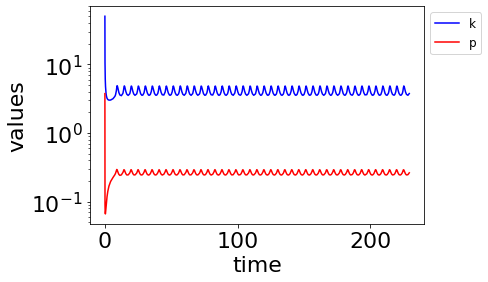

$\kappa_{tot}$ $(\mu$M$)$ = 50.78947368421053


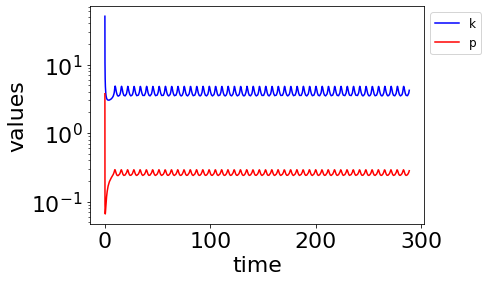

$\kappa_{tot}$ $(\mu$M$)$ = 51.31578947368421


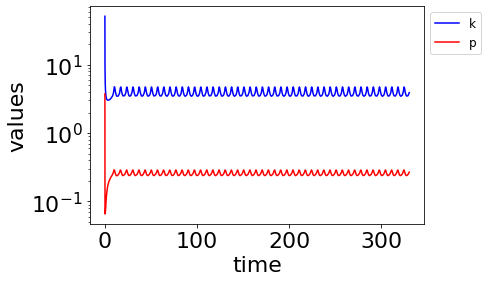

$\kappa_{tot}$ $(\mu$M$)$ = 51.8421052631579


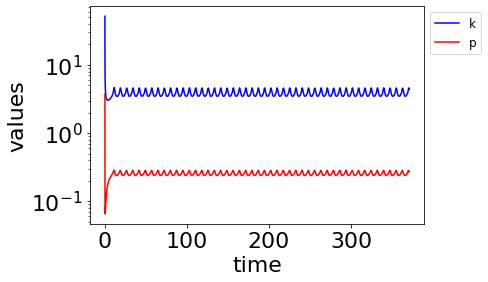

$\kappa_{tot}$ $(\mu$M$)$ = 52.368421052631575


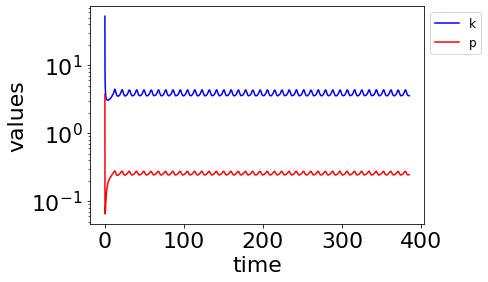

$\kappa_{tot}$ $(\mu$M$)$ = 52.89473684210526


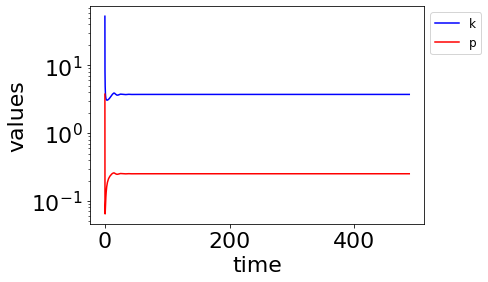

$\kappa_{tot}$ $(\mu$M$)$ = 53.421052631578945


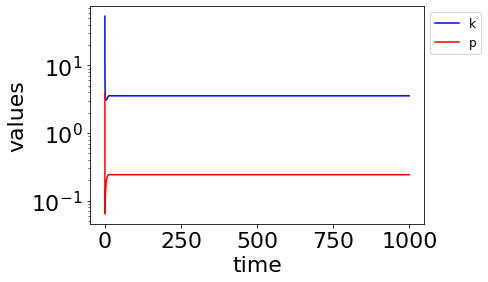

$\kappa_{tot}$ $(\mu$M$)$ = 53.94736842105263


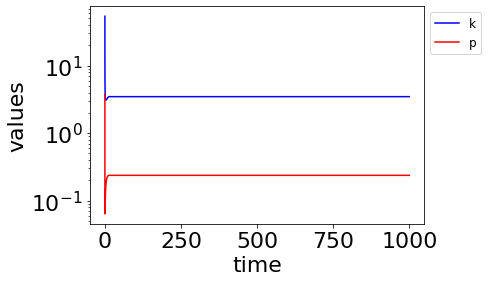

$\kappa_{tot}$ $(\mu$M$)$ = 54.473684210526315


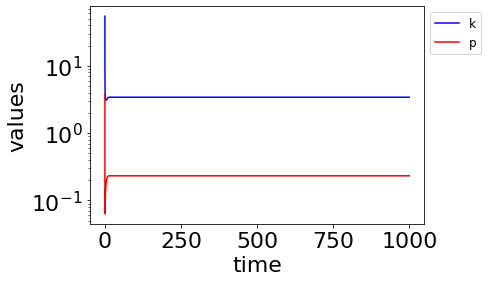

$\kappa_{tot}$ $(\mu$M$)$ = 55.0


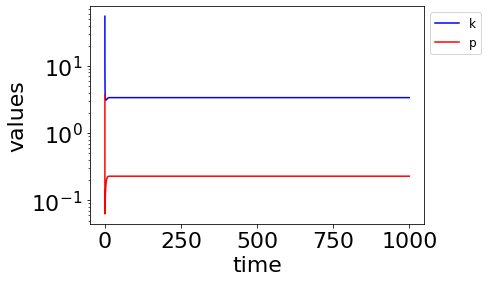

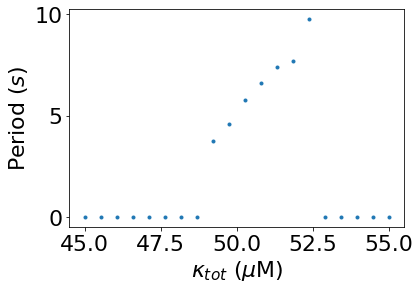

In [30]:
ktots2 = np.linspace(45, 55, num_points)
period_fxn_ktots2 = robustness2(5, ktots2, False)

$\rho_{tot}$ $(\mu$M$)$ = 3.6


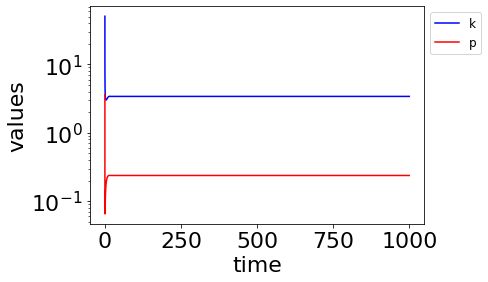

$\rho_{tot}$ $(\mu$M$)$ = 3.6210526315789475


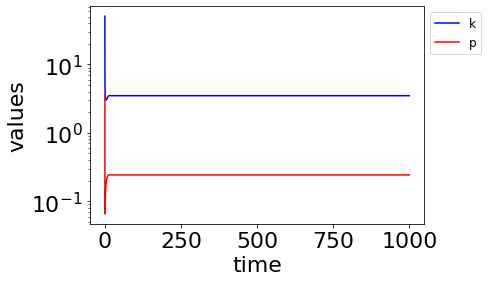

$\rho_{tot}$ $(\mu$M$)$ = 3.642105263157895


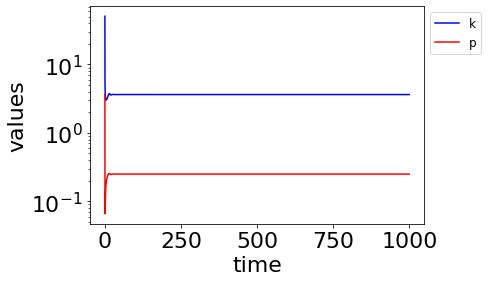

$\rho_{tot}$ $(\mu$M$)$ = 3.6631578947368424


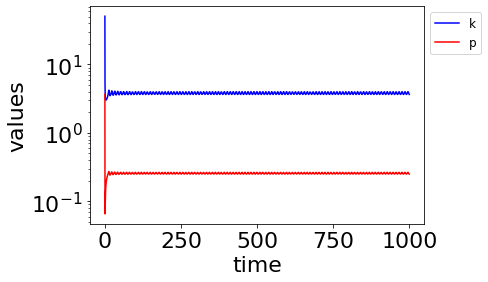

$\rho_{tot}$ $(\mu$M$)$ = 3.6842105263157894


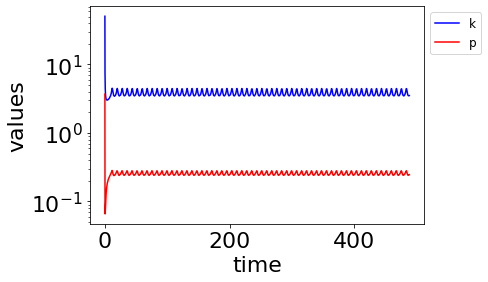

$\rho_{tot}$ $(\mu$M$)$ = 3.705263157894737


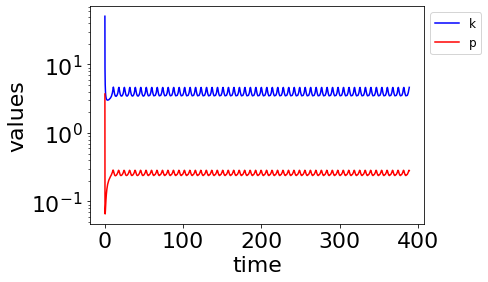

$\rho_{tot}$ $(\mu$M$)$ = 3.7263157894736842


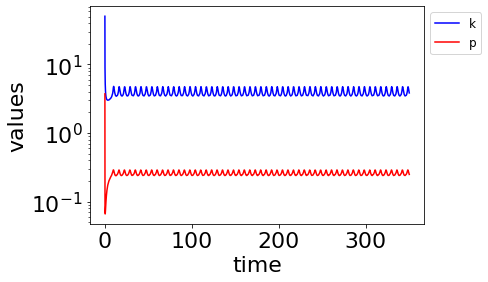

$\rho_{tot}$ $(\mu$M$)$ = 3.7473684210526317


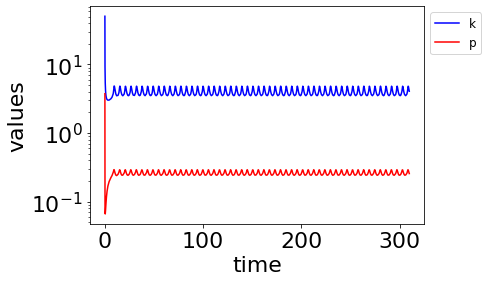

$\rho_{tot}$ $(\mu$M$)$ = 3.768421052631579


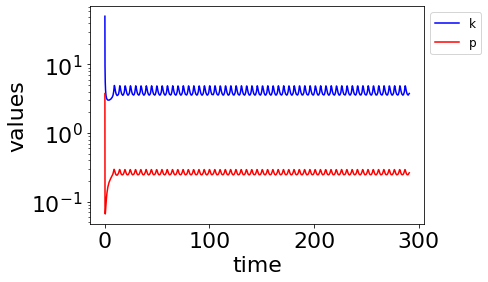

$\rho_{tot}$ $(\mu$M$)$ = 3.7894736842105265


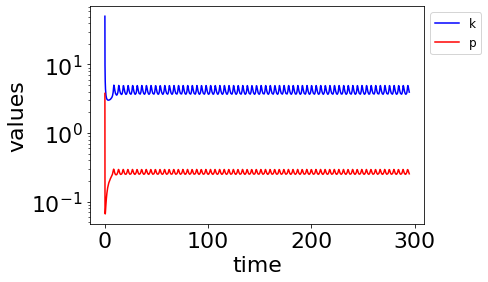

$\rho_{tot}$ $(\mu$M$)$ = 3.8105263157894735


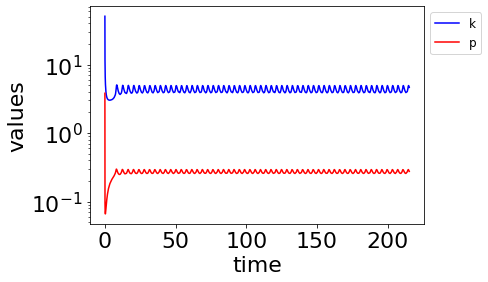

$\rho_{tot}$ $(\mu$M$)$ = 3.831578947368421


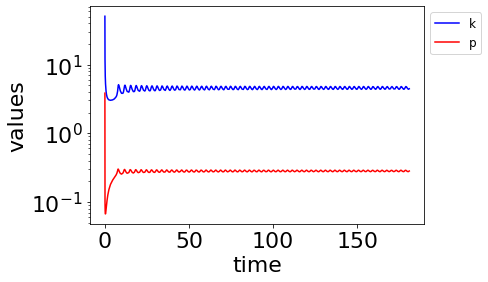

$\rho_{tot}$ $(\mu$M$)$ = 3.8526315789473684


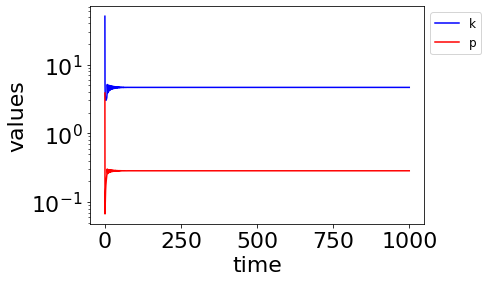

$\rho_{tot}$ $(\mu$M$)$ = 3.873684210526316


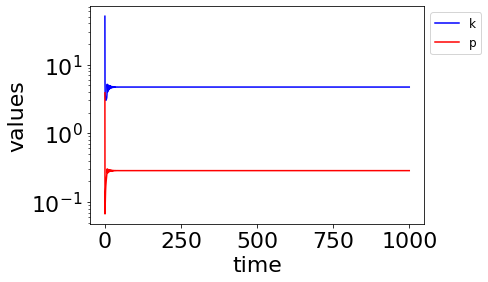

$\rho_{tot}$ $(\mu$M$)$ = 3.8947368421052633


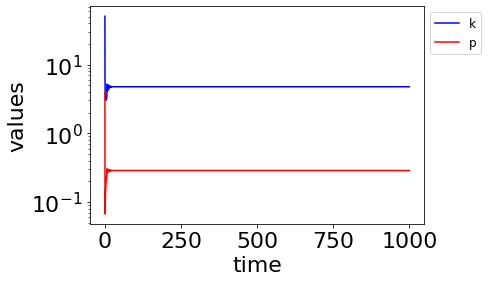

$\rho_{tot}$ $(\mu$M$)$ = 3.9157894736842107


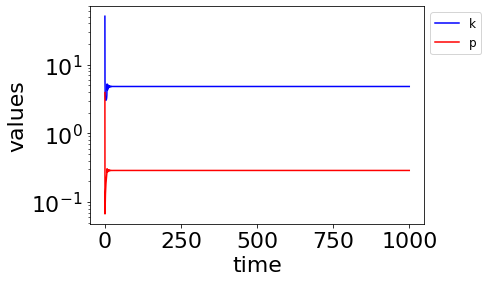

$\rho_{tot}$ $(\mu$M$)$ = 3.9368421052631577


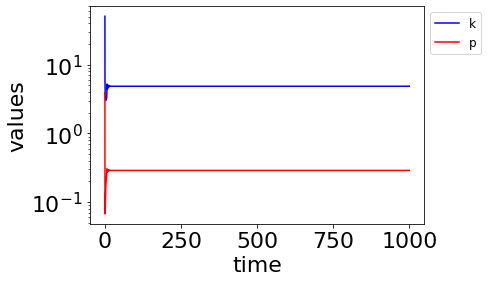

$\rho_{tot}$ $(\mu$M$)$ = 3.957894736842105


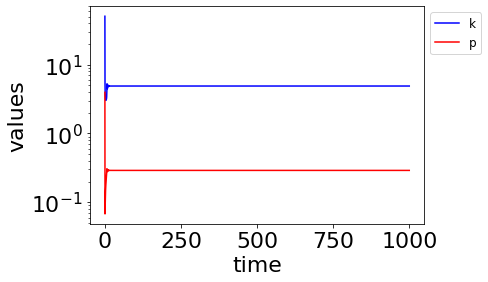

$\rho_{tot}$ $(\mu$M$)$ = 3.9789473684210526


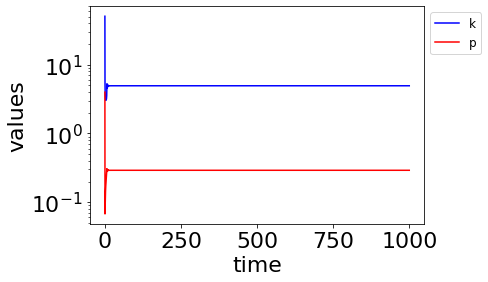

$\rho_{tot}$ $(\mu$M$)$ = 4.0


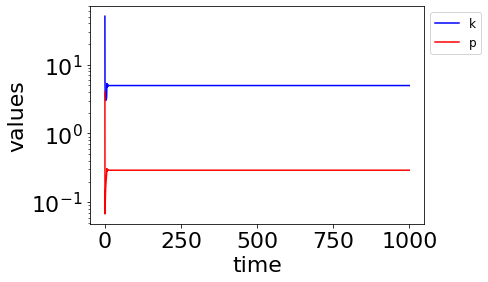

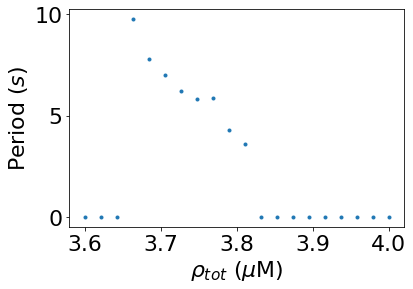

In [31]:
ptots2 = np.linspace(3.6, 4, num_points)
period_fxn_ptots2 = robustness2(6, ptots2, False)

$\tilde{P}$ $(\mu$M$)$ = 0.02


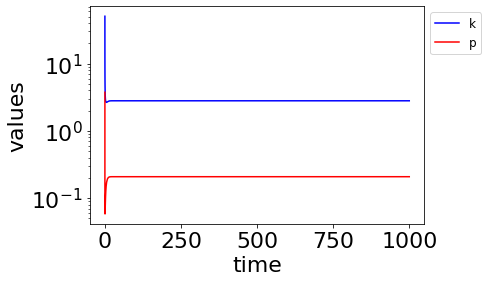

$\tilde{P}$ $(\mu$M$)$ = 0.021052631578947368


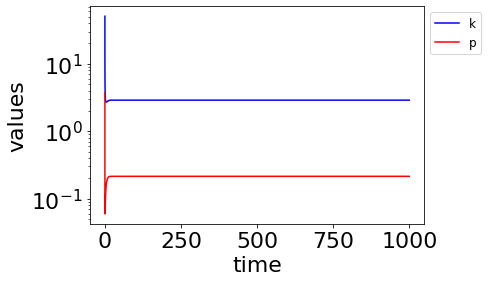

$\tilde{P}$ $(\mu$M$)$ = 0.02210526315789474


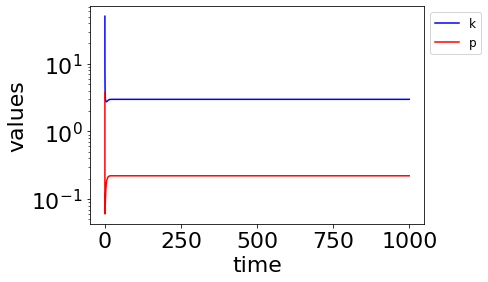

$\tilde{P}$ $(\mu$M$)$ = 0.023157894736842106


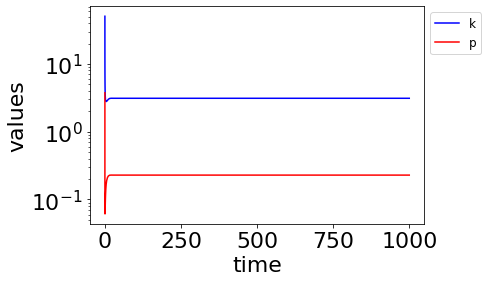

$\tilde{P}$ $(\mu$M$)$ = 0.024210526315789474


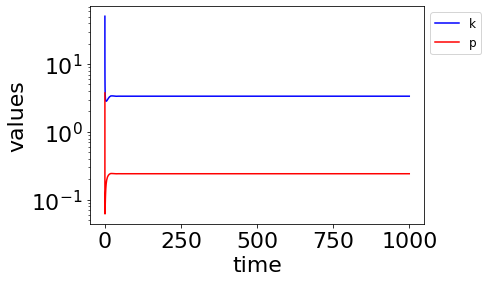

$\tilde{P}$ $(\mu$M$)$ = 0.02526315789473684


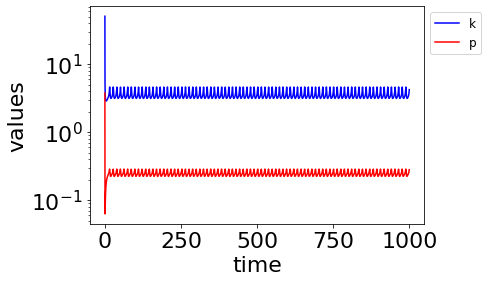

$\tilde{P}$ $(\mu$M$)$ = 0.02631578947368421


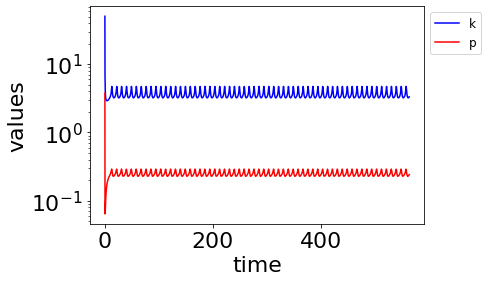

$\tilde{P}$ $(\mu$M$)$ = 0.02736842105263158


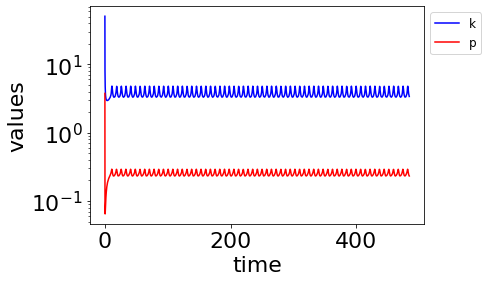

$\tilde{P}$ $(\mu$M$)$ = 0.028421052631578948


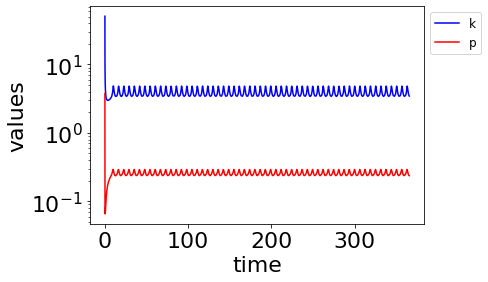

$\tilde{P}$ $(\mu$M$)$ = 0.029473684210526315


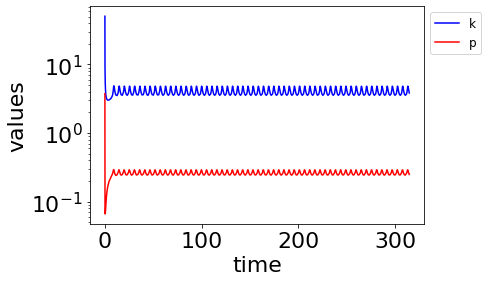

$\tilde{P}$ $(\mu$M$)$ = 0.030526315789473686


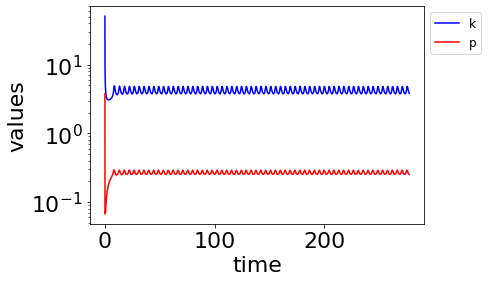

$\tilde{P}$ $(\mu$M$)$ = 0.031578947368421054


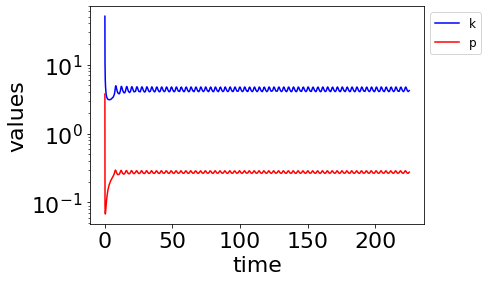

$\tilde{P}$ $(\mu$M$)$ = 0.03263157894736842


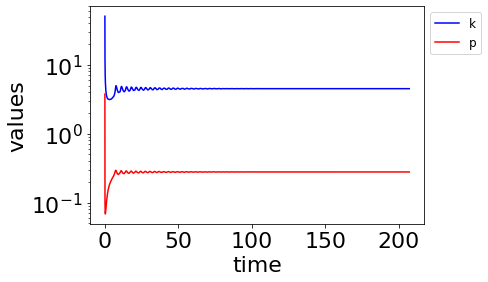

$\tilde{P}$ $(\mu$M$)$ = 0.03368421052631579


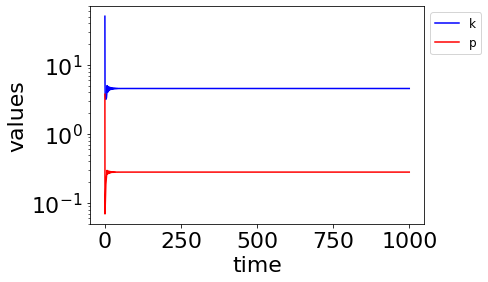

$\tilde{P}$ $(\mu$M$)$ = 0.034736842105263156


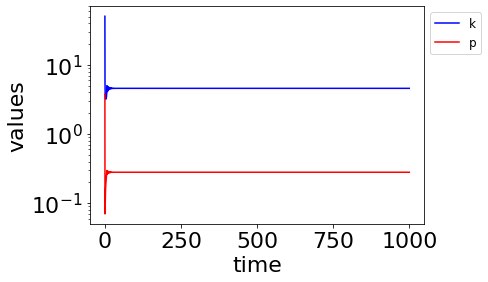

$\tilde{P}$ $(\mu$M$)$ = 0.035789473684210524


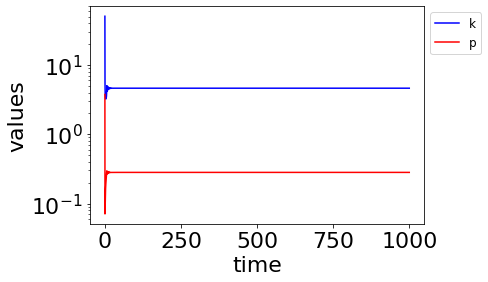

$\tilde{P}$ $(\mu$M$)$ = 0.0368421052631579


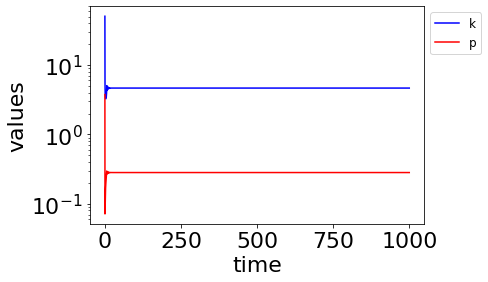

$\tilde{P}$ $(\mu$M$)$ = 0.03789473684210526


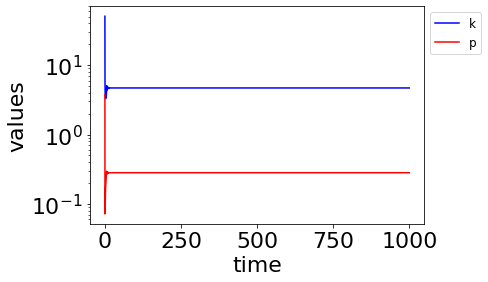

$\tilde{P}$ $(\mu$M$)$ = 0.03894736842105263


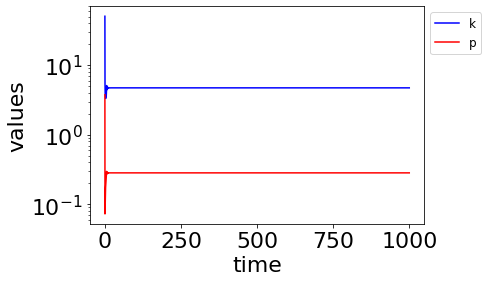

$\tilde{P}$ $(\mu$M$)$ = 0.04


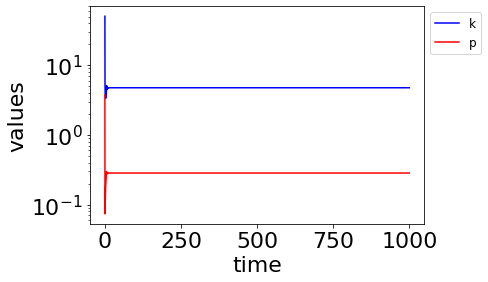

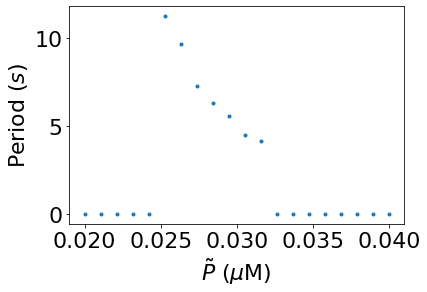

In [32]:
ptildes2 = np.linspace(0.02, 0.04, num_points)
period_fxn_ptildes2 = robustness2(7, ptildes2, False)

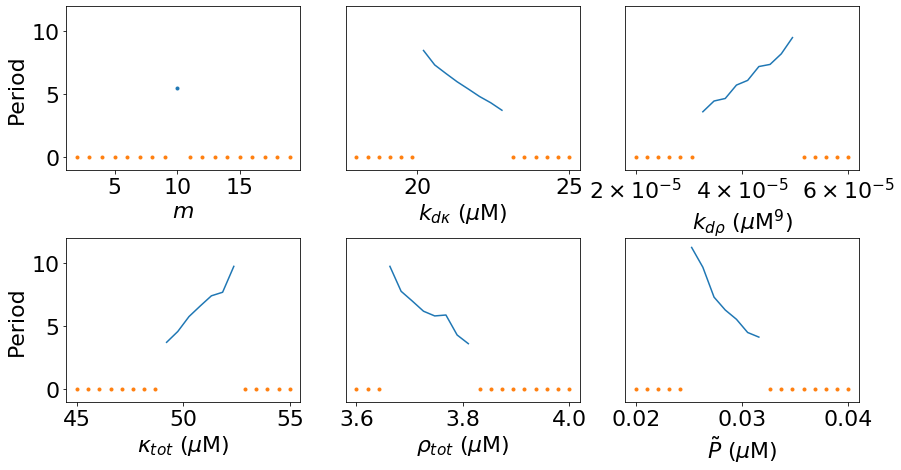

In [33]:
fig, axs = plt.subplots(2,3, figsize=(13,7))

ms = np.array(ms)
axs[0, 0].plot(ms2[period_fxn_m2 > 0], period_fxn_m2[period_fxn_m2>0], '.')
axs[0, 0].plot(ms2[period_fxn_m2 == 0], period_fxn_m2[period_fxn_m2 == 0], '.')
axs[0, 0].set_xlabel(r'$m$')
axs[0, 0].set_ylabel(r'Period')
# axs[0, 0].set_xticks([0, 10, 20, 30, 40, 50])
axs[0, 0].set_ylim([-1,12])

axs[0, 1].plot(kdks2[period_fxn_kdks2>0], period_fxn_kdks2[period_fxn_kdks2>0])
axs[0, 1].plot(kdks2[period_fxn_kdks2 ==0], period_fxn_kdks2[period_fxn_kdks2==0], '.')
axs[0, 1].set_xlabel(var_list[3])
# axs[0, 2].set_xticks([1e-4, 1e-3, 1e-2])
axs[0, 1].set_ylim([-1,12])
axs[0, 1].set_yticks([])

axs[0, 2].plot(kdps2[period_fxn_kdps2 > 0], period_fxn_kdps2[period_fxn_kdps2 > 0])
axs[0, 2].plot(kdps2[period_fxn_kdps2 == 0], period_fxn_kdps2[period_fxn_kdps2 == 0], '.')
axs[0, 2].set_xlabel(var_list[4])
axs[0, 2].set_xticks([2e-5, 4e-5, 6e-5])
axs[0, 2].set_xticklabels([r'$2 \times 10^{-5}$', r'$4 \times 10^{-5}$', r'$6 \times 10^{-5}$'])
axs[0, 2].set_ylim([-1,12])
axs[0, 2].set_yticks([])

axs[1, 0].plot(ktots2[period_fxn_ktots2>0], period_fxn_ktots2[period_fxn_ktots2>0])
axs[1, 0].plot(ktots2[period_fxn_ktots2==0], period_fxn_ktots2[period_fxn_ktots2==0], '.')
axs[1, 0].set_xlabel(var_list[5])
axs[1, 0].set_ylabel('Period')
# axs[1, 0].set_xticks([0, 0.001, 0.002])
# axs[1, 0].set_xticklabels(['0', r'$10^{-3}$', '2e-3'])
# plt.ticklabel_format(style='sci', axis='x', scilimits=(-5,-5))
axs[1, 0].set_ylim([-1,12])

axs[1, 1].plot(ptots2[period_fxn_ptots2>0], period_fxn_ptots2[period_fxn_ptots2>0])
axs[1, 1].plot(ptots2[period_fxn_ptots2==0], period_fxn_ptots2[period_fxn_ptots2==0], '.')
axs[1, 1].set_xlabel(var_list[6])
# axs[1, 1].set_xticks([0, 0.005, 0.01, 0.015])
# axs[1, 1].set_xticklabels(['0', '5e-3', '1e-2', '1.5e-2'])
axs[1, 1].set_ylim([-1,12])
axs[1, 1].set_yticks([])

axs[1, 2].plot(ptildes2[period_fxn_ptildes2>0], period_fxn_ptildes2[period_fxn_ptildes2>0])
axs[1, 2].plot(ptildes2[period_fxn_ptildes2==0], period_fxn_ptildes2[period_fxn_ptildes2==0], '.')
axs[1, 2].set_xlabel(var_list[7])
# axs[1, 2].set_xticks([1e-12, 1e-9, 1e-6])
axs[1, 2].set_ylim([-1,12])
axs[1, 2].set_yticks([])

# axs[1, 3].plot(etas[period_fxn_eta>0], period_fxn_eta[period_fxn_eta>0])
# axs[1, 3].plot(etas[period_fxn_eta==0], period_fxn_eta[period_fxn_eta==0],'.')
# axs[1, 3].set_xlabel(var_list[6])
# axs[1, 3].set_xscale('log')
# axs[1, 3].set_xticks([1e-1, 1e0, 1e1])
# axs[1, 3].set_ylim([-100, 5000])
# axs[1, 3].set_yticks([])

plt.tight_layout(h_pad=0, w_pad=0.2)
# plt.savefig('robustness_bounded_opposite_limit_2.png', 
#             dpi=800, bbox_inches='tight')
# plt.savefig('robustness_bounded_opposite_limit_2_small.png', 
#             bbox_inches='tight')
plt.show()